# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

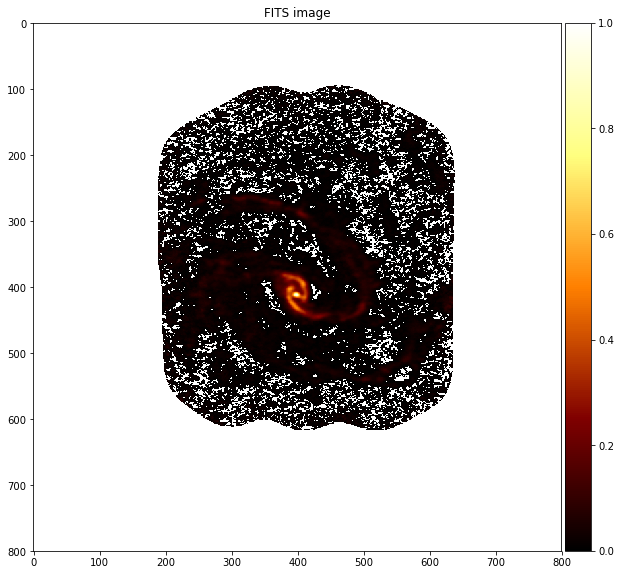

In [2]:
"""
Loading data
"""

#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3902: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


<function graph.thresholded_image_plot>

In [4]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 1
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

../lib/points_generation.py:29: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level
../lib/points_generation.py:106: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20112

Residual stats:
Residual RMS: 2.081093605800081
Residual Variance: 4.3221716681073685
Flux Lost: 0.20696689031381868
Flux Addition: 1.1259344993262599
psi1(u-f): 112.76974518942382
Exceeded Pixels: 2708
Sharpness: 2415.6894497069406
psi2(grad u): 741.5504096383686
Total elapsed time: 4.6422624588012695 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2870539050219905
Mean min distance between collocation and center points: 0.0

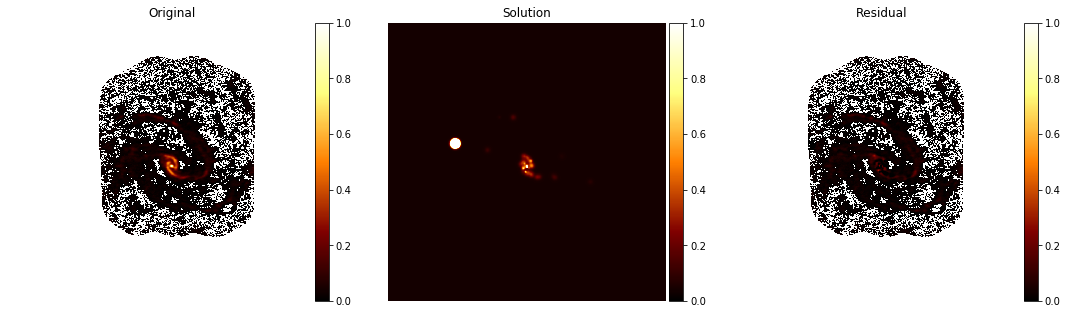

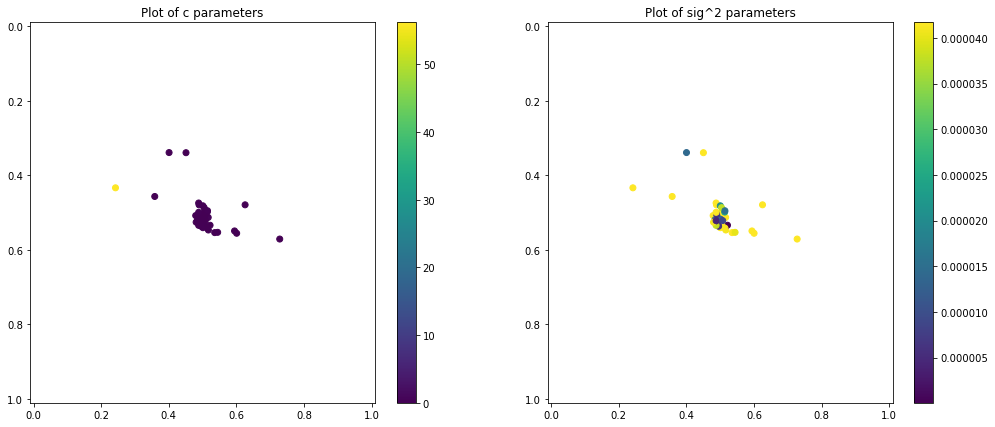

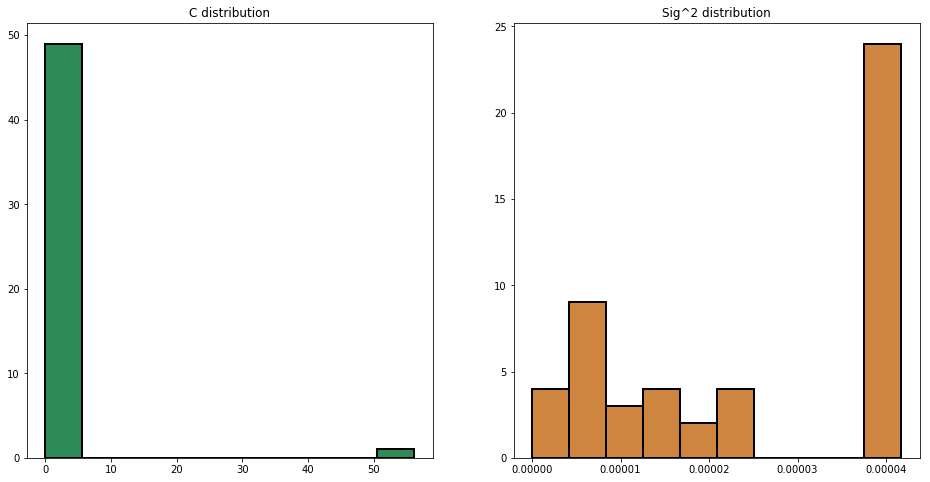

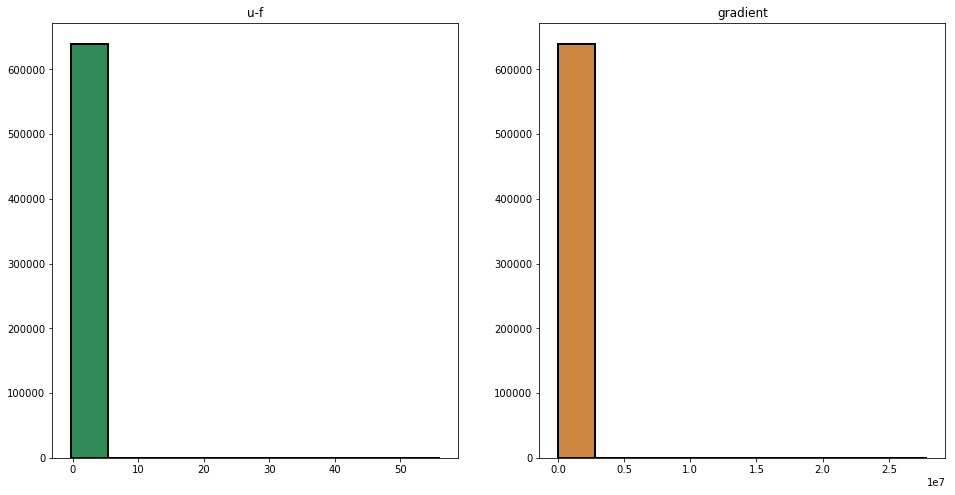

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30112

Residual stats:
Residual RMS: 2.8542276667890514
Residual Variance: 8.128046692944245
Flux Lost: 0.17348066091515743
Flux Addition: 1.509991010371518
psi1(u-f): 121.74524518894461
Exceeded Pixels: 2991
Sharpness: 3266.271790012501
psi2(grad u): 815.5843864674655
Total elapsed time: 10.11069393157959 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.28705390502199213
Mean min distance between collocation and center points: 0.033

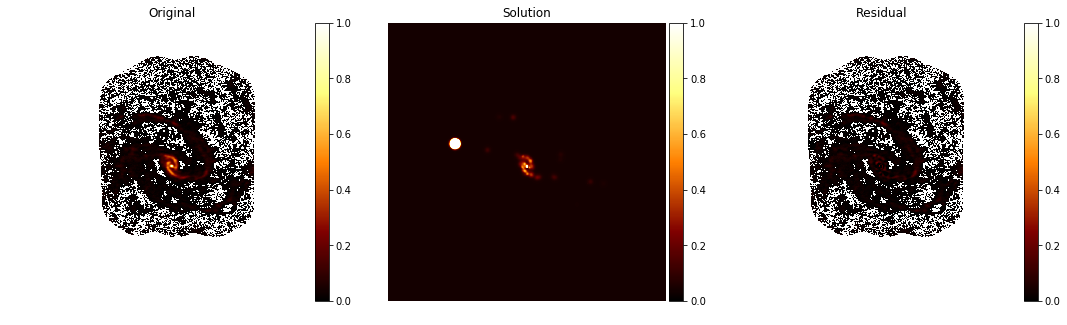

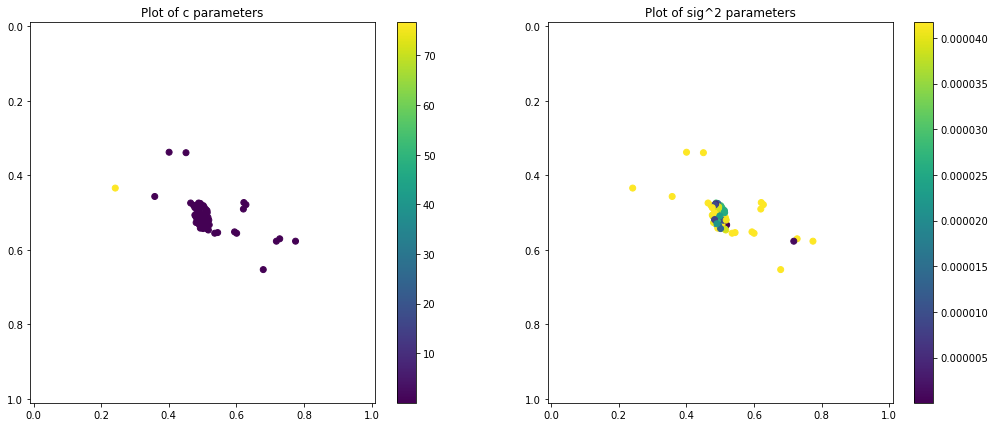

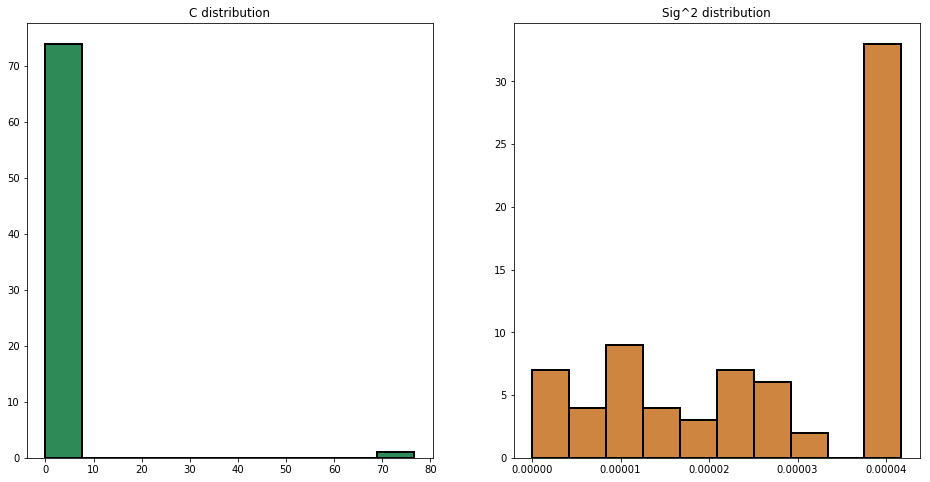

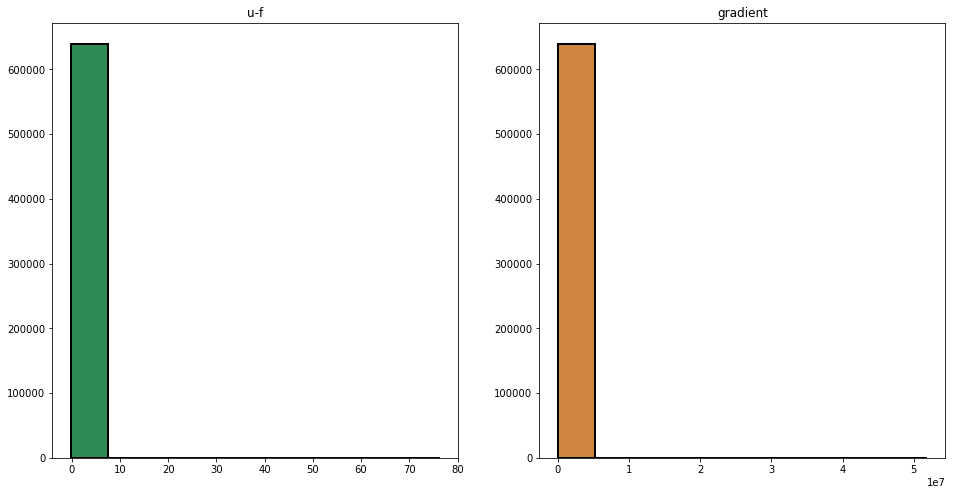

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40108

Residual stats:
Residual RMS: 0.04262460997406488
Residual Variance: 0.0017378274483264185
Flux Lost: 0.14933744404404906
Flux Addition: 0.062145722771919744
psi1(u-f): 15.799806541497066
Exceeded Pixels: 3388
Sharpness: 154.0462066237422
psi2(grad u): 17.019844475566313
Total elapsed time: 18.558897495269775 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2675204475643083
Mean min distance between collocation and center poi

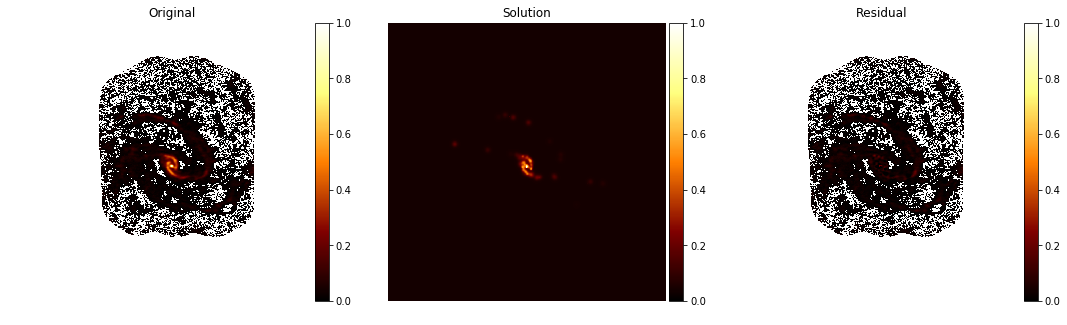

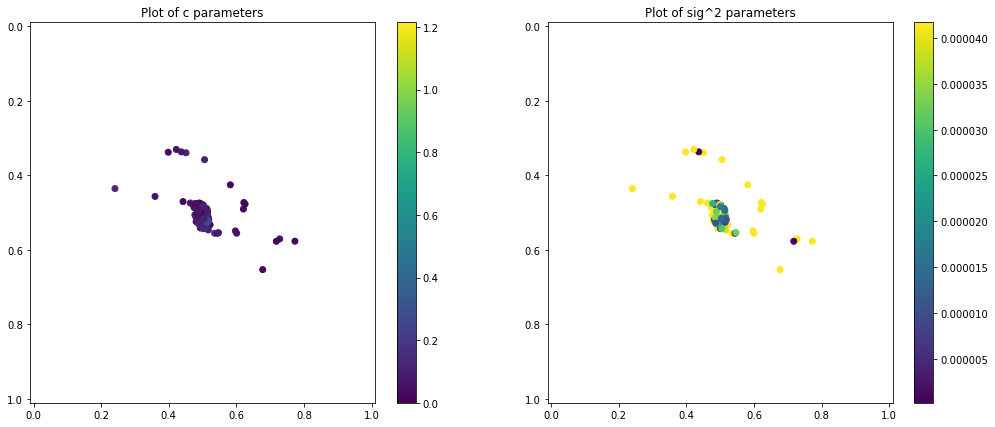

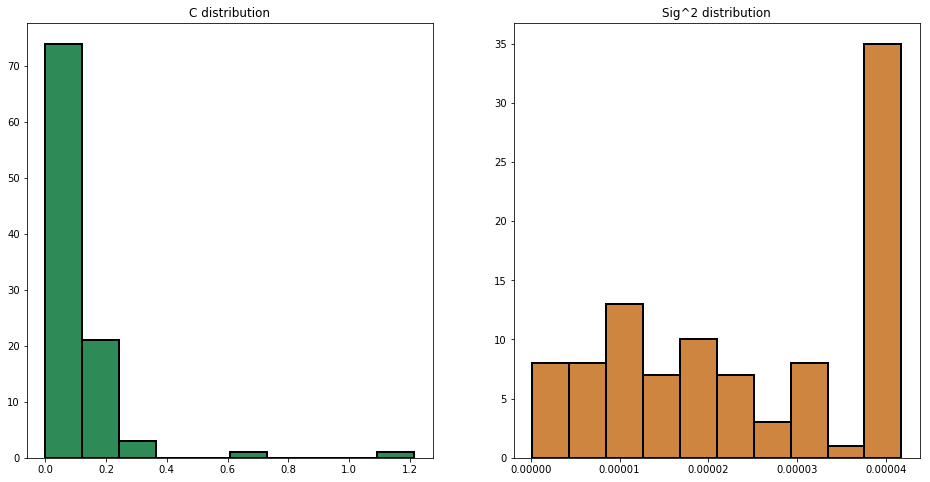

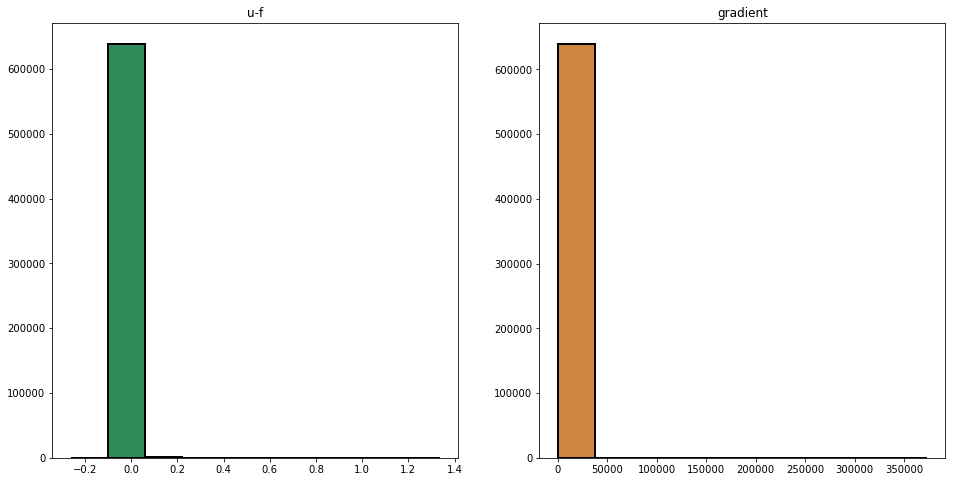

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50111

Residual stats:
Residual RMS: 0.053352943220084756
Residual Variance: 0.0028090650460728408
Flux Lost: 0.13289758967082482
Flux Addition: 0.07285906331577315
psi1(u-f): 29.157122804527578
Exceeded Pixels: 3695
Sharpness: 174.99642694962432
psi2(grad u): 32.595179668999016
Total elapsed time: 30.909741640090942 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2640439528199069
Mean min distance between collocation and center po

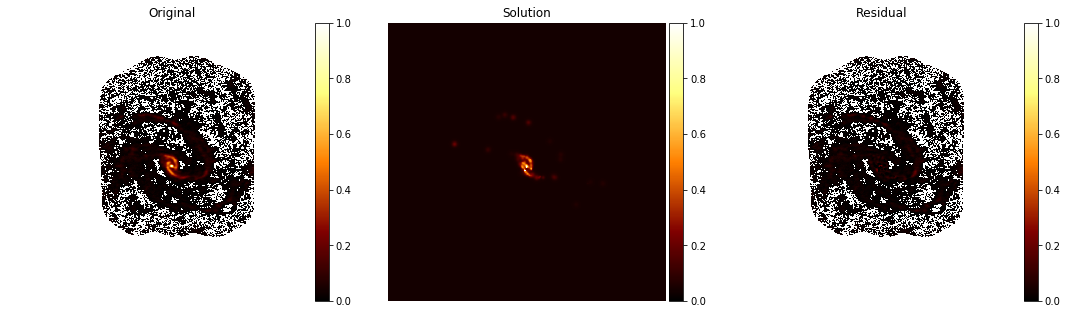

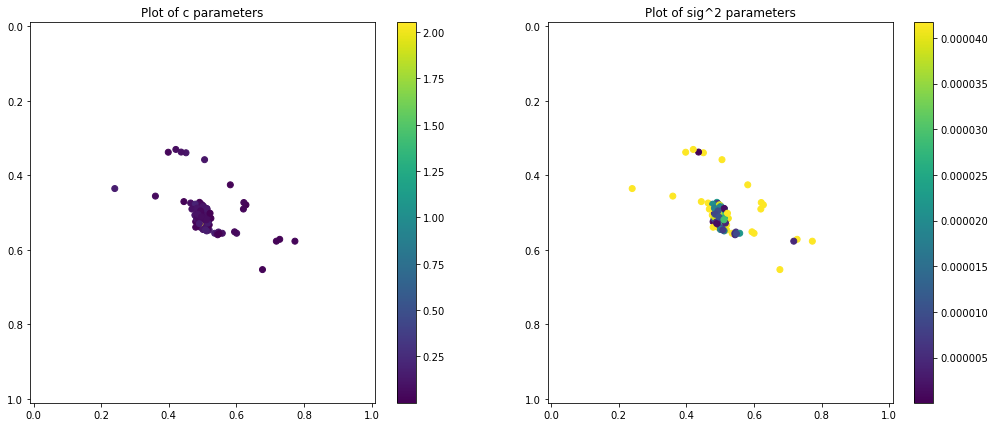

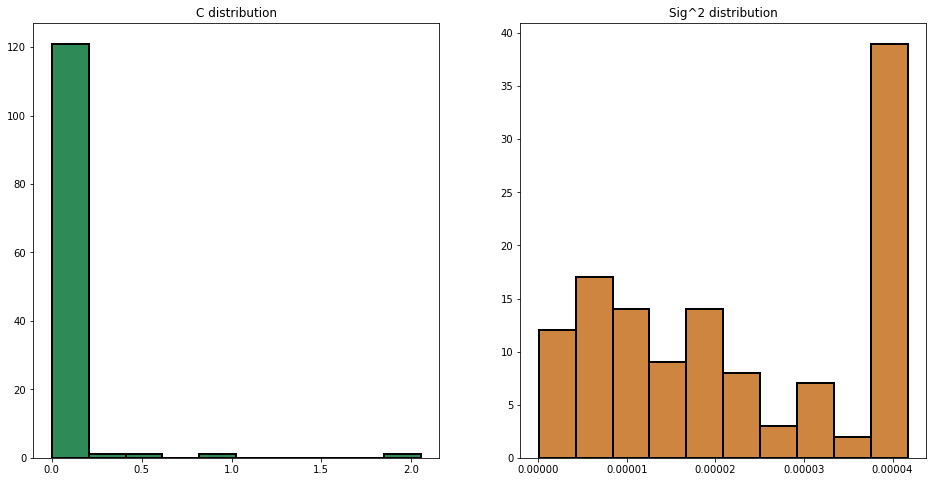

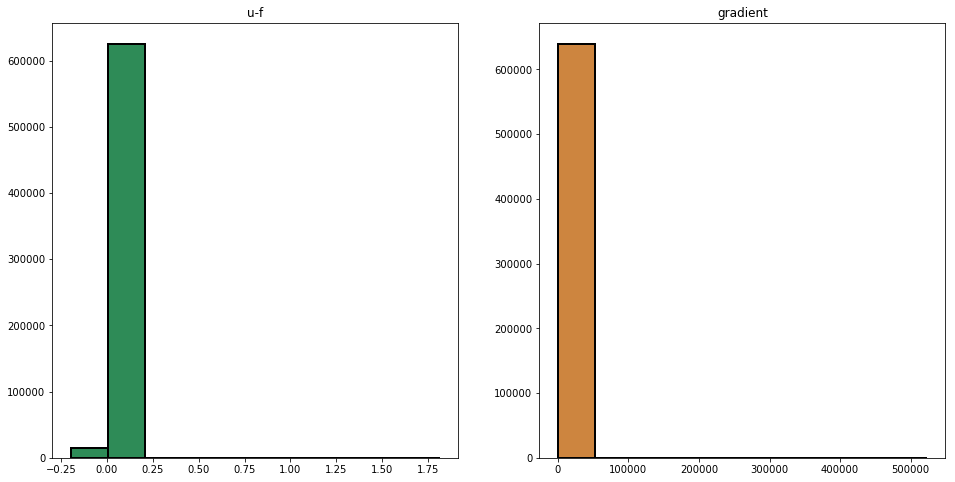

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60110

Residual stats:
Residual RMS: 0.0405532048360433
Residual Variance: 0.0016259230770832736
Flux Lost: 0.1103803028183371
Flux Addition: 0.06803601932899629
psi1(u-f): 22.96417833281623
Exceeded Pixels: 4194
Sharpness: 183.49473651709394
psi2(grad u): 23.250718521787604
Total elapsed time: 48.91579008102417 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26404517670014777
Mean min distance between collocation and center points

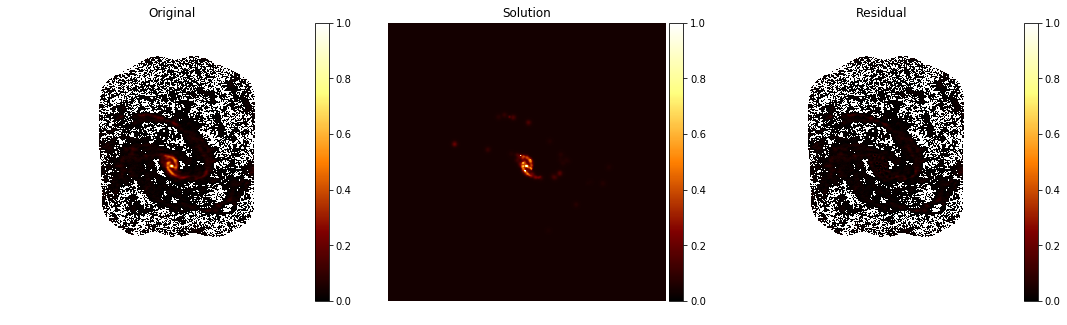

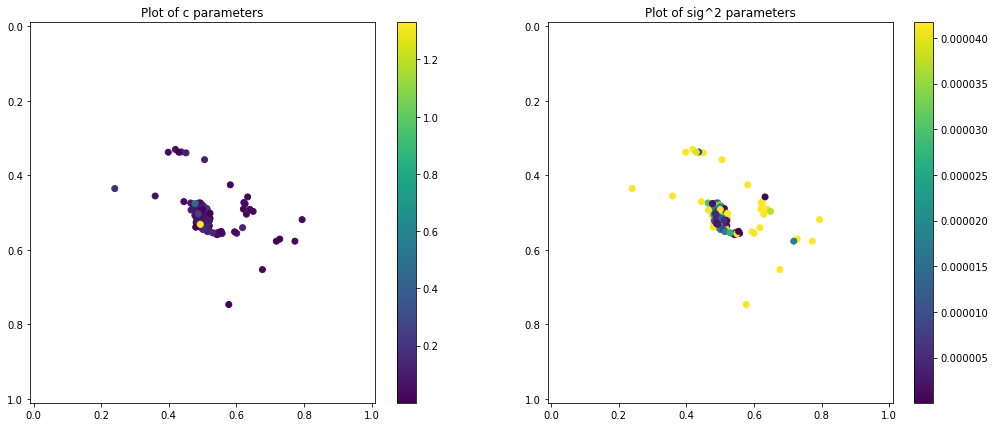

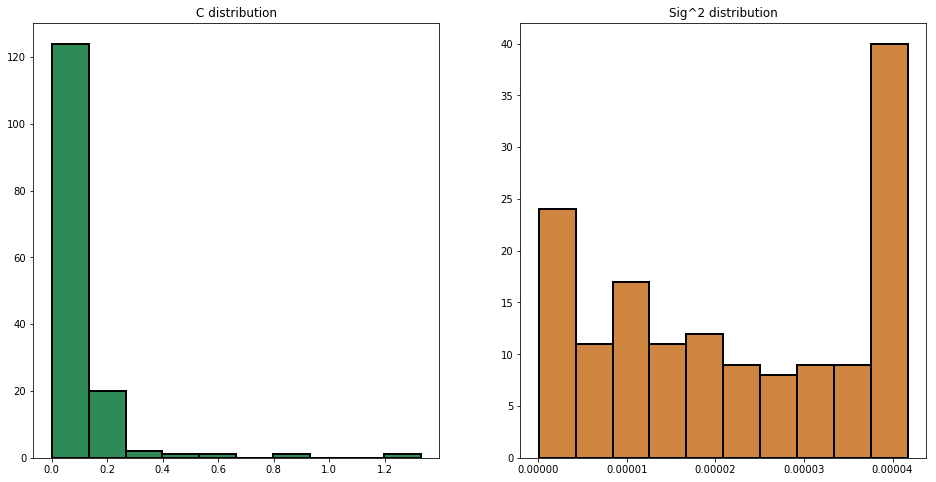

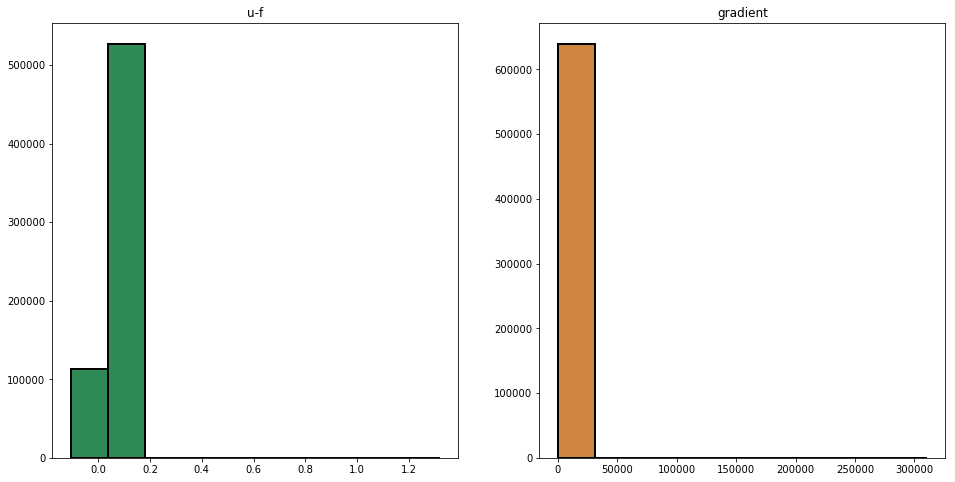

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70113

Residual stats:
Residual RMS: 0.03979305188145517
Residual Variance: 0.0015677218835175308
Flux Lost: 0.10142142120783305
Flux Addition: 0.062478569574209795
psi1(u-f): 22.755953507342358
Exceeded Pixels: 4287
Sharpness: 185.81626345158318
psi2(grad u): 19.082302705284633
Total elapsed time: 73.85992884635925 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.262290817383484
Mean min distance between collocation and center poin

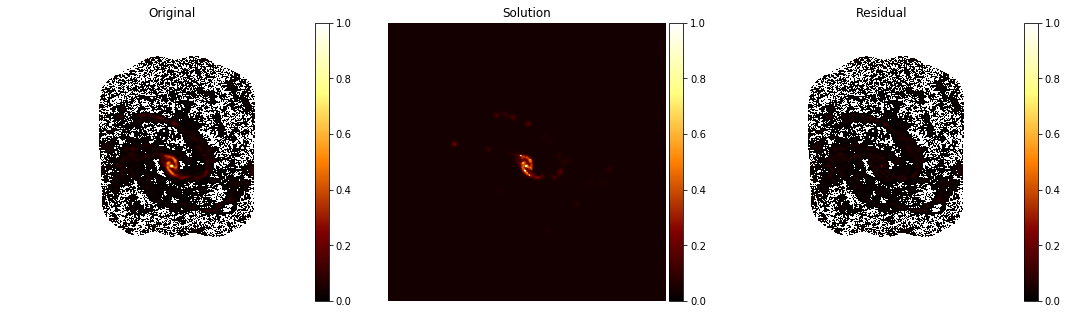

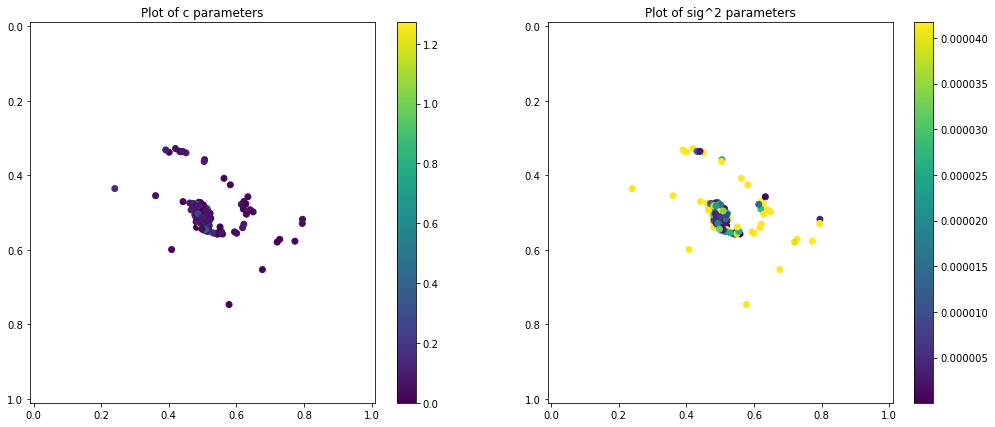

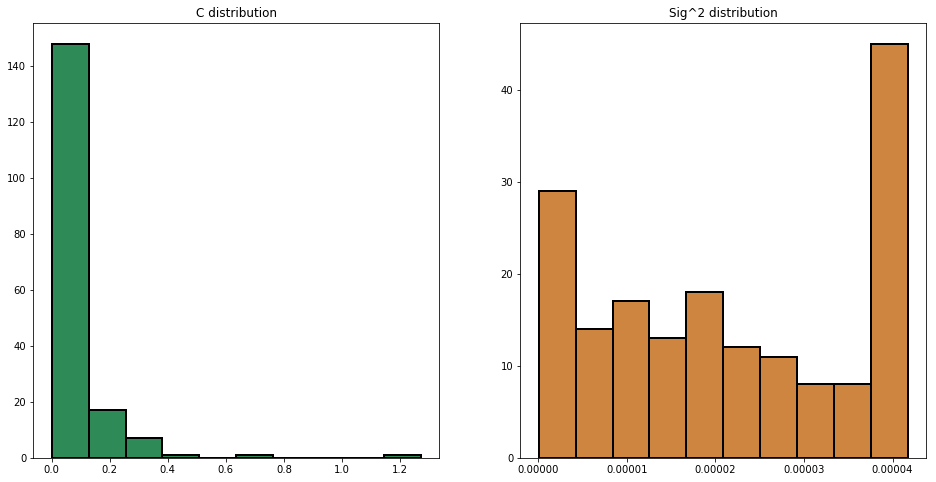

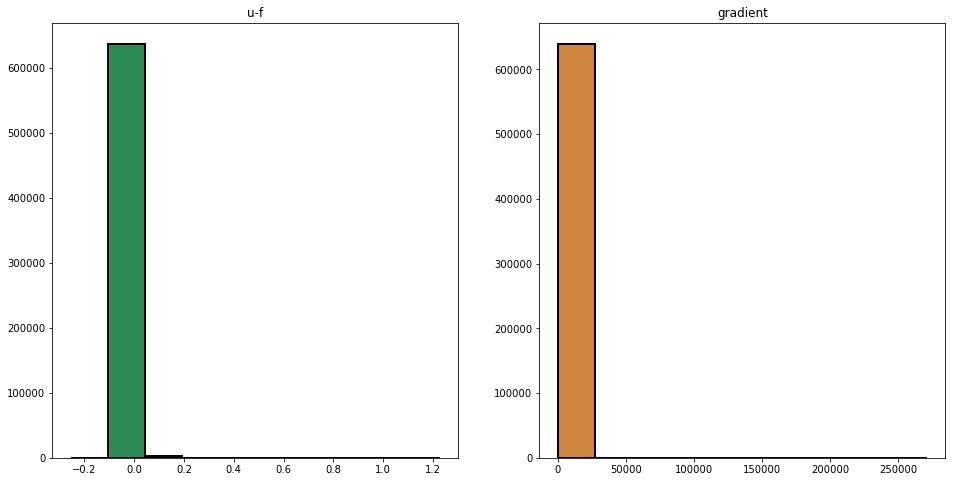

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80110

Residual stats:
Residual RMS: 0.029911888018922504
Residual Variance: 0.0008863065349215
Flux Lost: 0.08642148339315284
Flux Addition: 0.05797072324877845
psi1(u-f): 13.908171418442317
Exceeded Pixels: 4788
Sharpness: 186.49680917929302
psi2(grad u): 12.945810700283662
Total elapsed time: 109.08551216125488 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2628885022381268
Mean min distance between collocation and center point

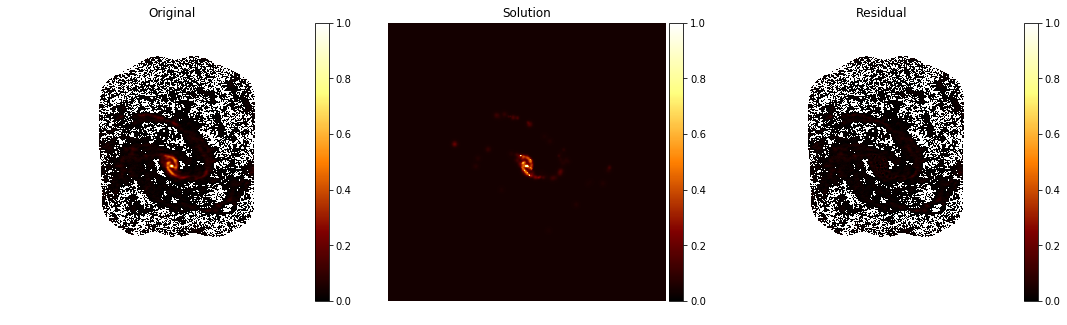

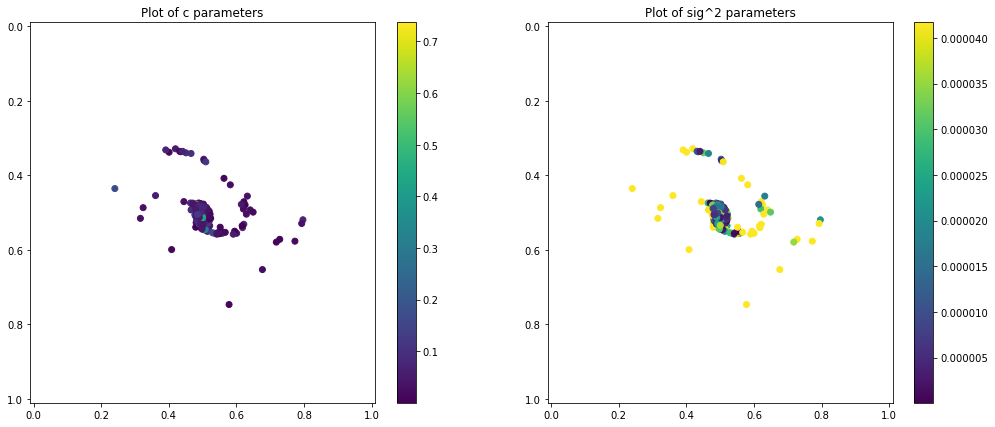

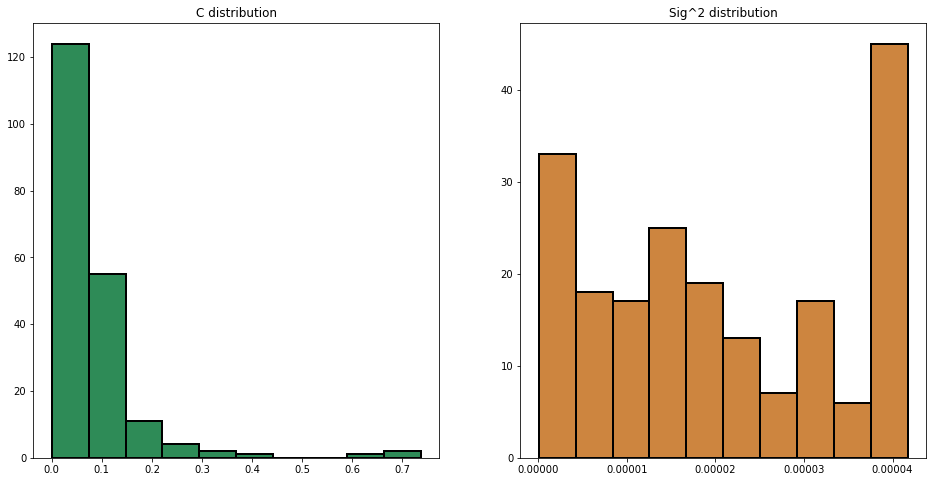

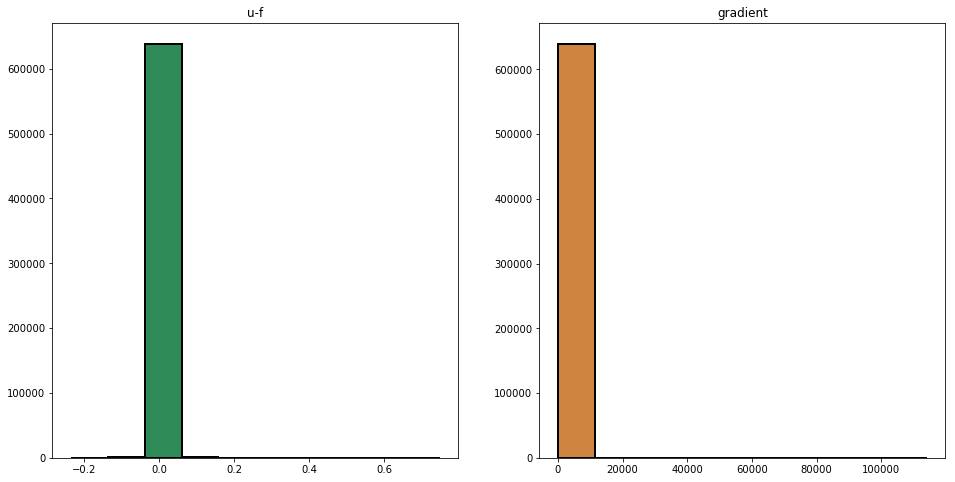

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90113

Residual stats:
Residual RMS: 0.028284495154994625
Residual Variance: 0.000791780718261248
Flux Lost: 0.0807079000855831
Flux Addition: 0.05256746762161703
psi1(u-f): 12.104452224795438
Exceeded Pixels: 4926
Sharpness: 185.94180909505204
psi2(grad u): 11.520893667542119
Total elapsed time: 151.98930430412292 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26311716617101144
Mean min distance between collocation and center poi

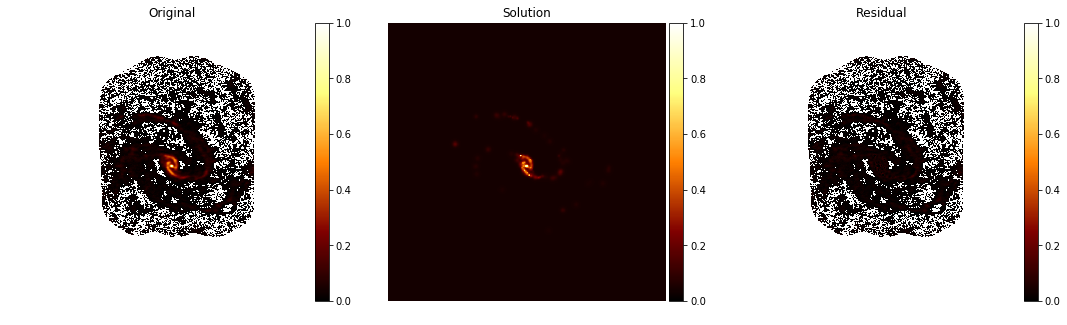

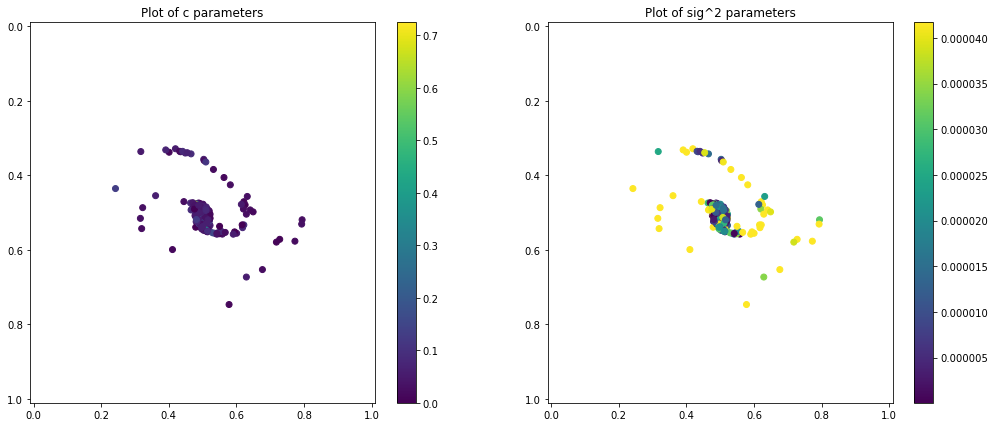

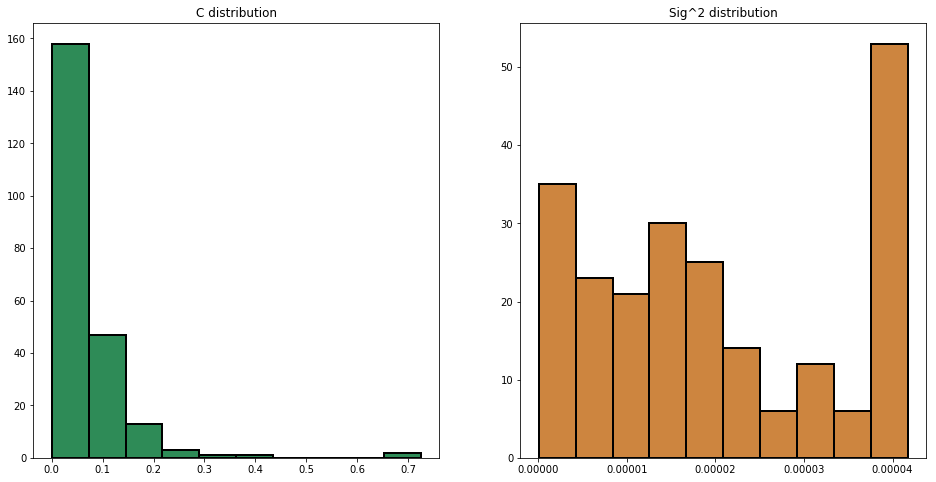

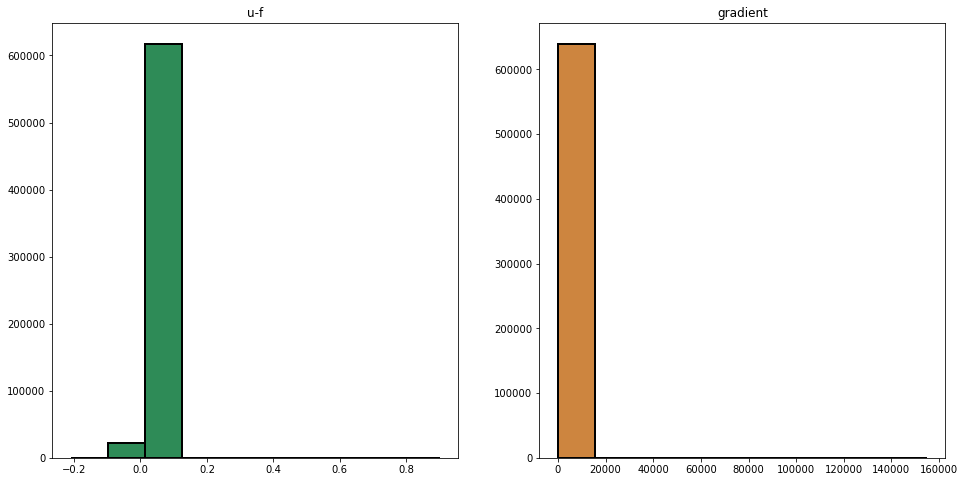

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.036611691526947765
Residual Variance: 0.0013350708972399252
Flux Lost: 0.0773597857982811
Flux Addition: 0.054684345881692756
psi1(u-f): 18.161330890803445
Exceeded Pixels: 5043
Sharpness: 189.48058063417298
psi2(grad u): 17.01186636861302
Total elapsed time: 209.656742811203 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2632414315855314
Mean min distance between collocation and center poi

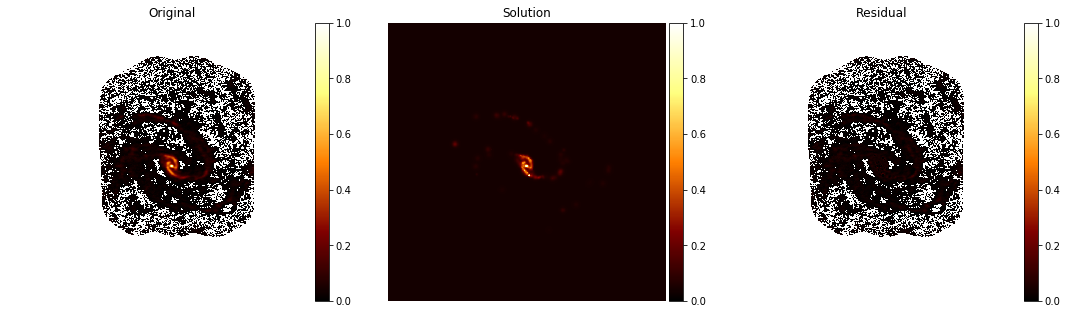

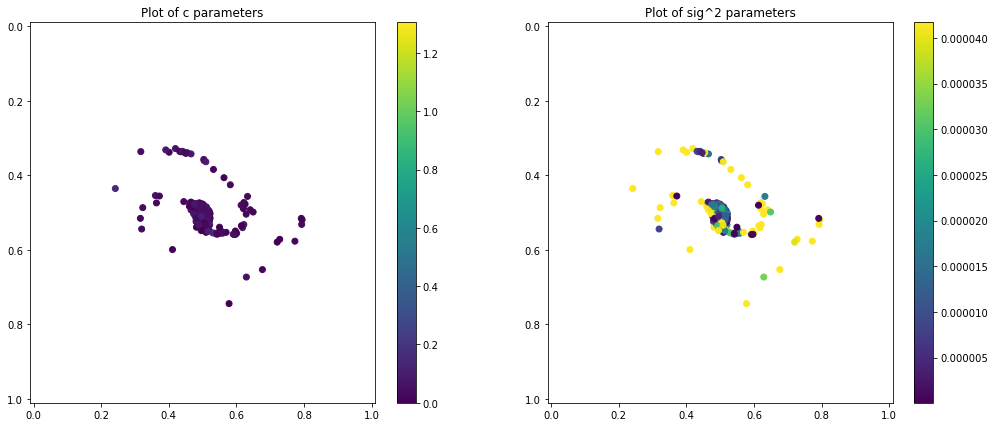

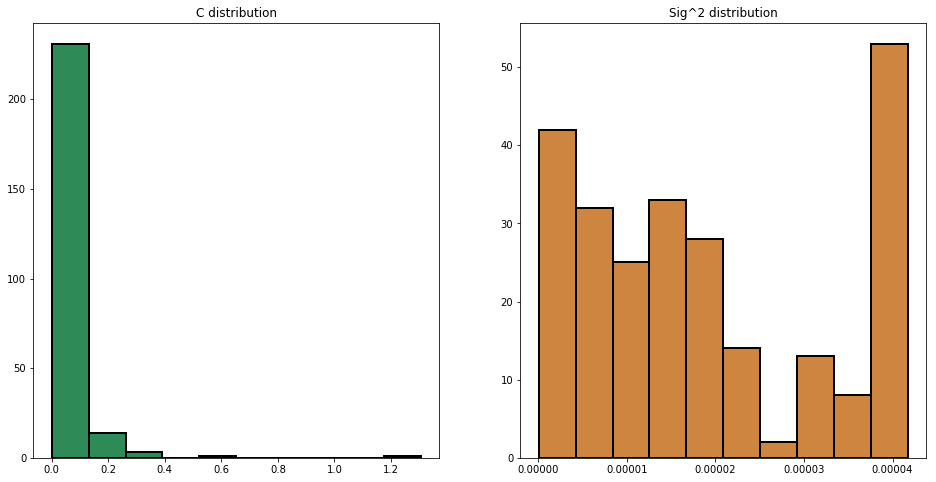

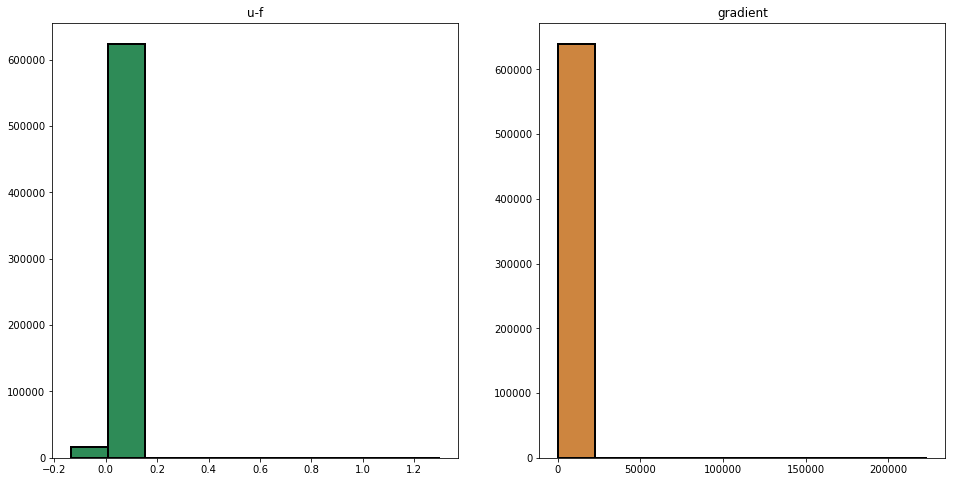

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110116

Residual stats:
Residual RMS: 0.03289419451957494
Residual Variance: 0.001078345642700687
Flux Lost: 0.0735812688477507
Flux Addition: 0.05476019603466963
psi1(u-f): 15.655644977272758
Exceeded Pixels: 5380
Sharpness: 186.64042084464646
psi2(grad u): 12.823212023217106
Total elapsed time: 287.3463728427887 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26648209450852445
Mean min distance between collocation and center poi

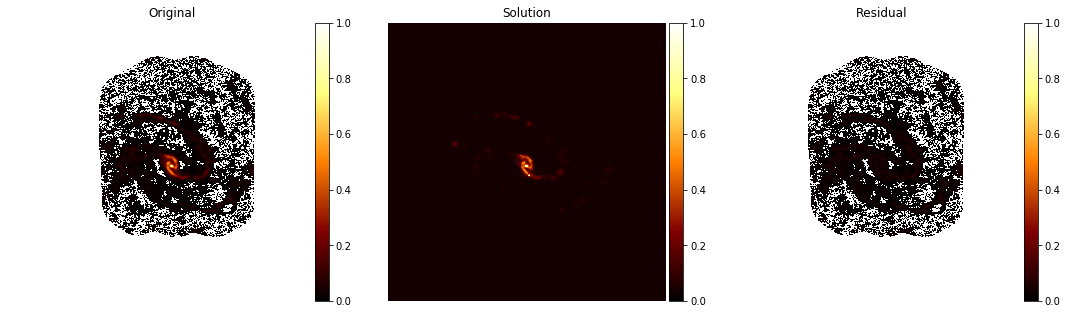

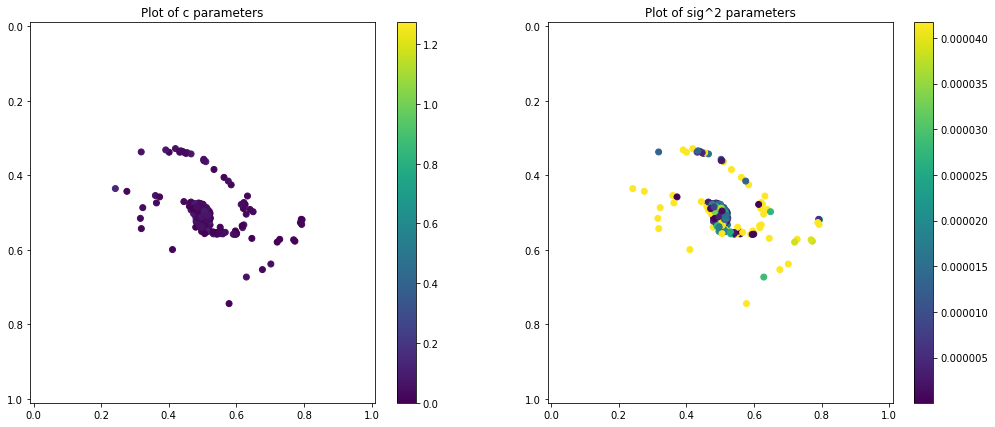

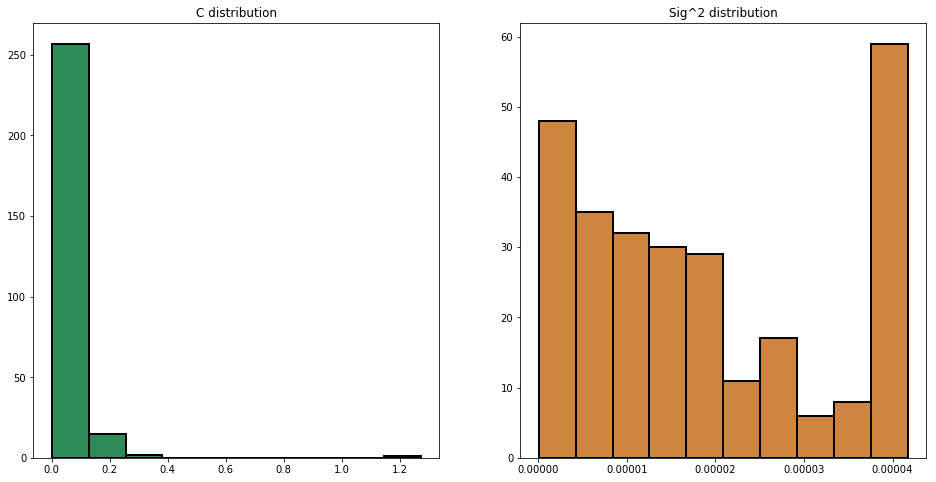

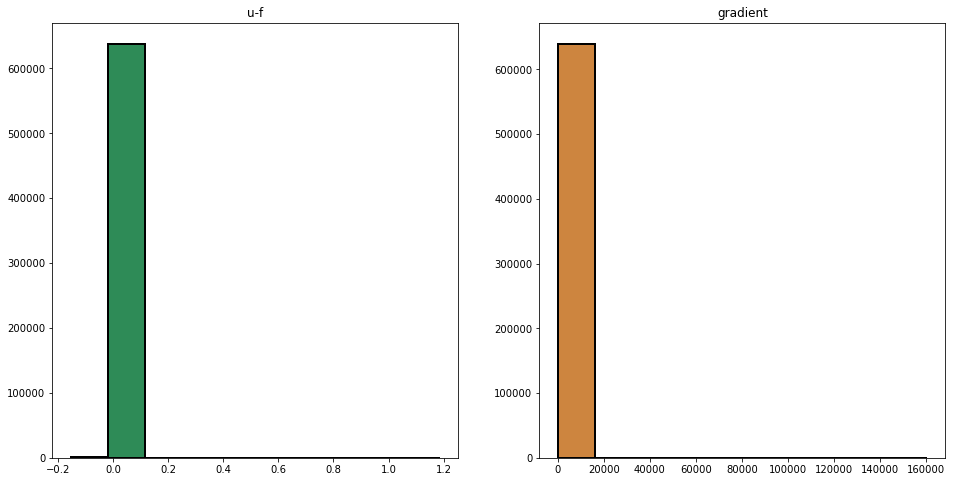

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.032949565340329785
Residual Variance: 0.0010824255088002868
Flux Lost: 0.06816191418021786
Flux Addition: 0.05048482757486366
psi1(u-f): 15.6719520455817
Exceeded Pixels: 5359
Sharpness: 189.2019563423244
psi2(grad u): 13.45963658551406
Total elapsed time: 375.41574478149414 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661743572598256
Mean min distance between collocation and center poin

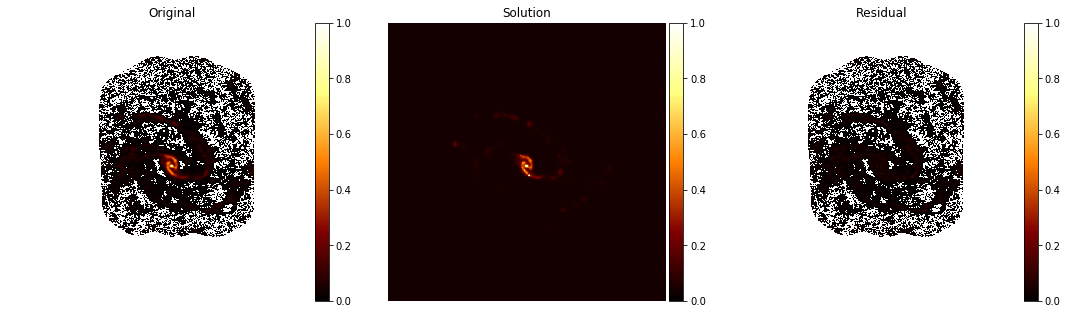

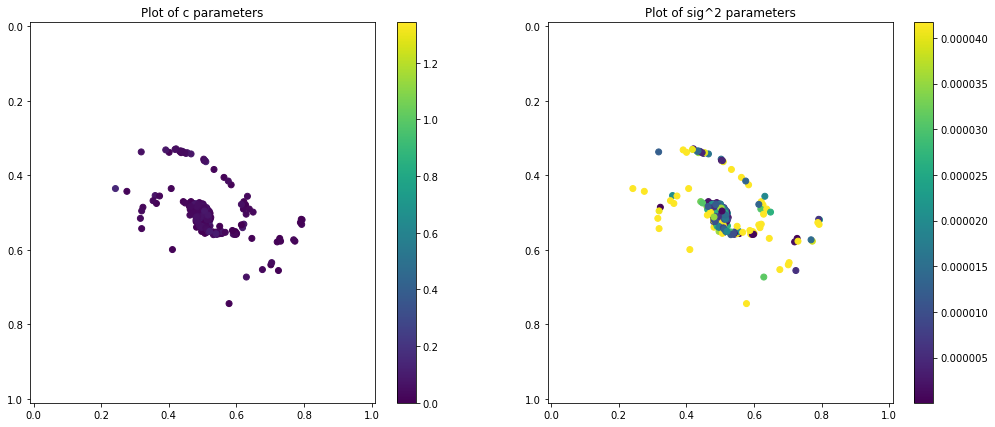

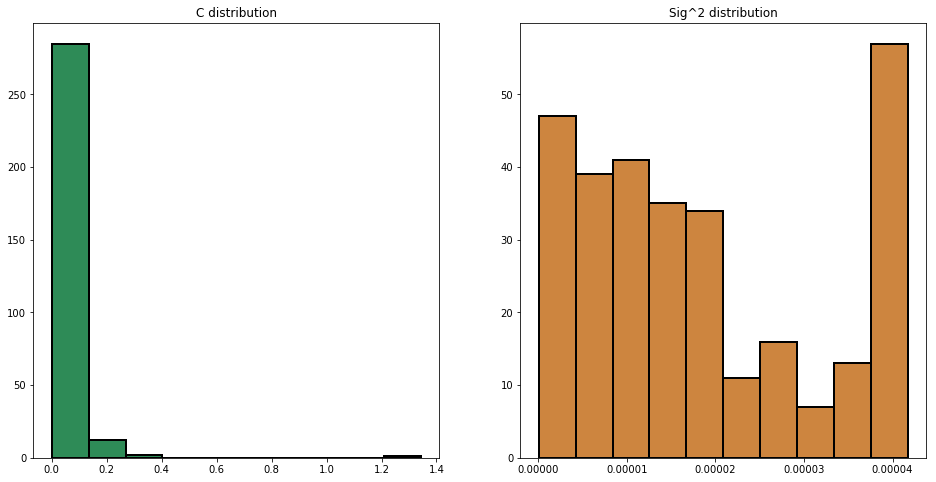

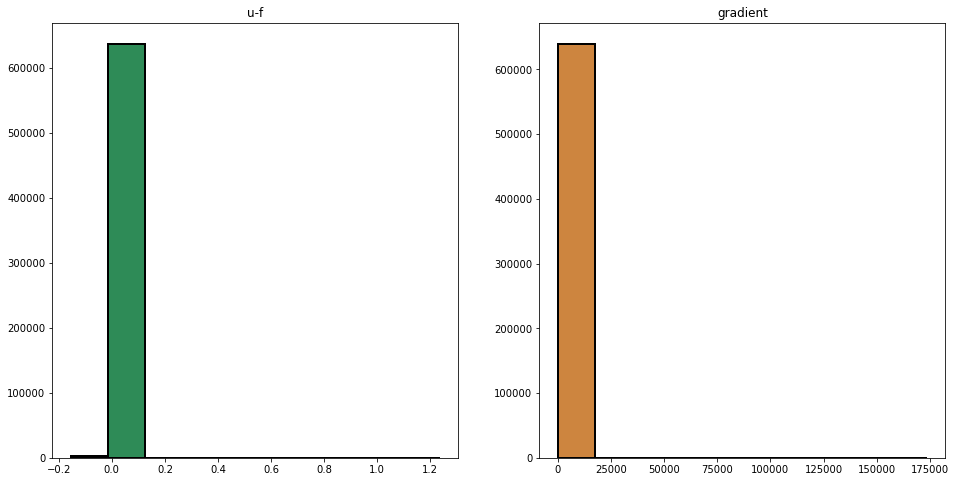

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130112

Residual stats:
Residual RMS: 0.017489255629099178
Residual Variance: 0.00029981010425706583
Flux Lost: 0.06429053896239761
Flux Addition: 0.040138290924729085
psi1(u-f): 1.9467169728483742
Exceeded Pixels: 5556
Sharpness: 178.65316914725304
psi2(grad u): 5.402465196361908
Total elapsed time: 481.9291353225708 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26610488065033194
Mean min distance between collocation and center

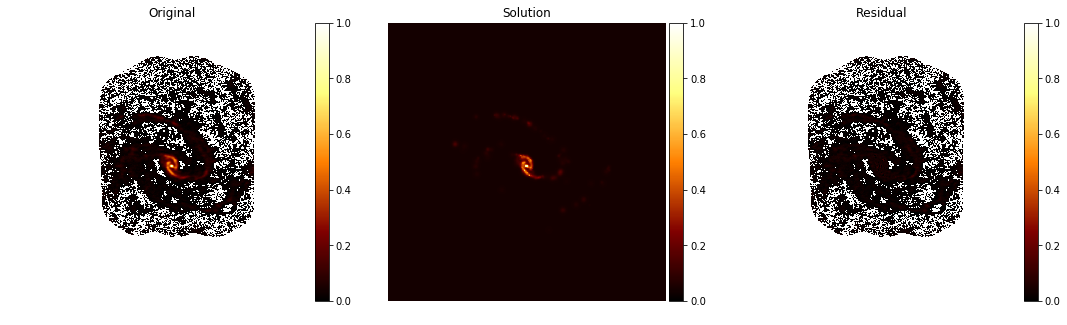

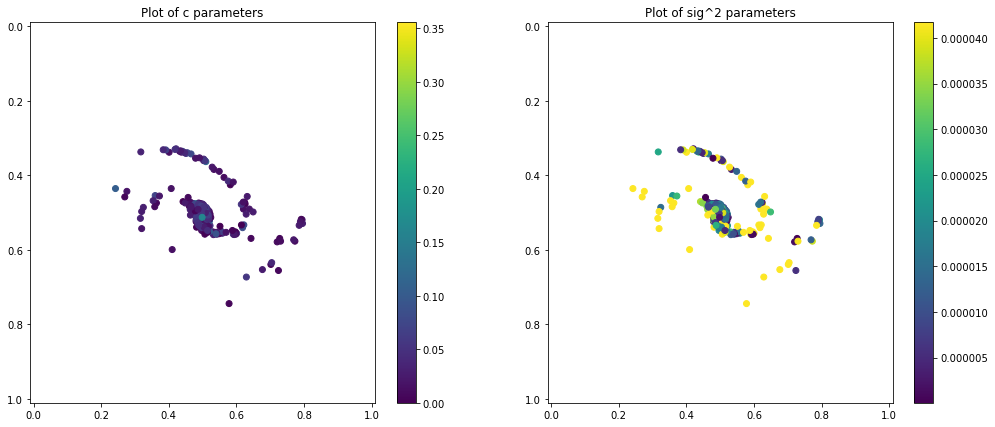

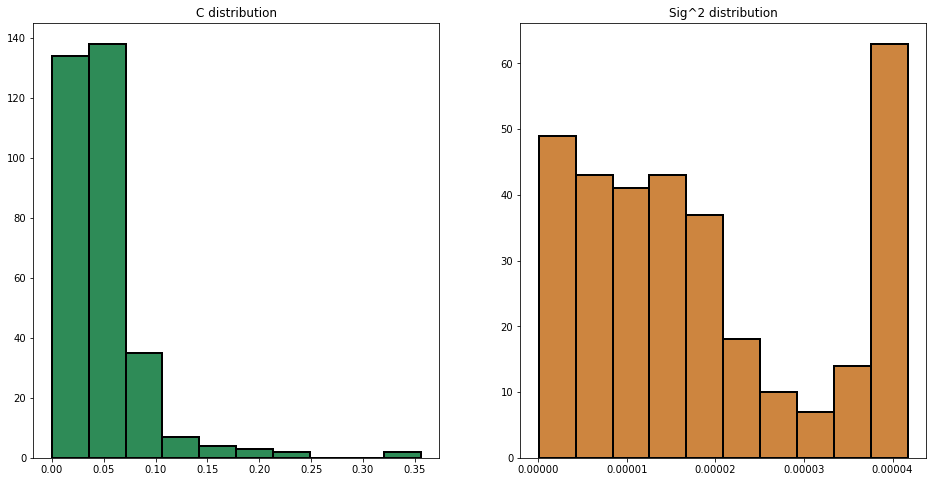

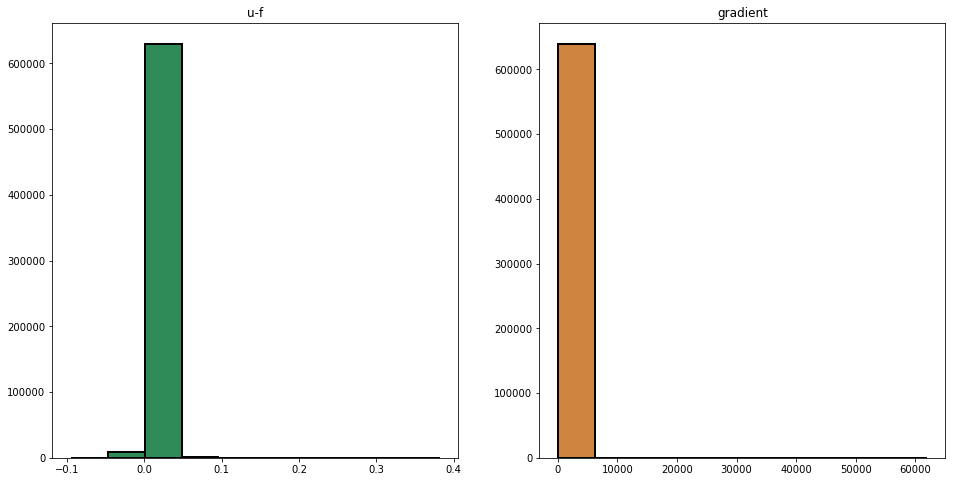

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140111

Residual stats:
Residual RMS: 0.016547533717214787
Residual Variance: 0.0002684455439595725
Flux Lost: 0.06082216522099143
Flux Addition: 0.038082610718071244
psi1(u-f): 1.5292723100088996
Exceeded Pixels: 5679
Sharpness: 179.27884562655134
psi2(grad u): 5.095628061398938
Total elapsed time: 588.9752666950226 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26279180091150967
Mean min distance between collocation and center 

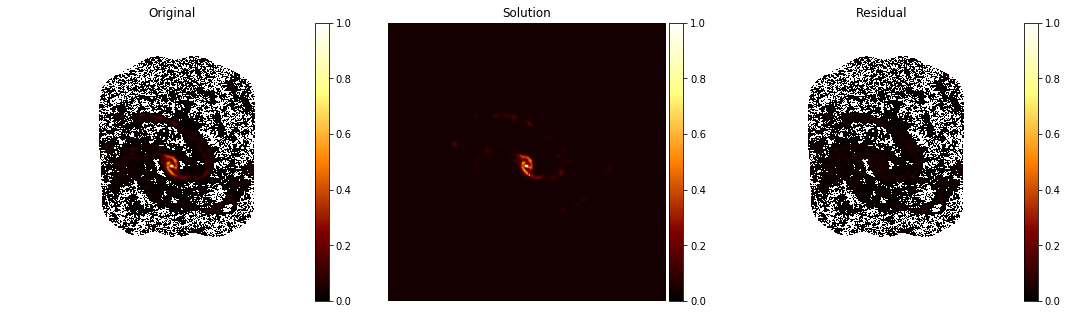

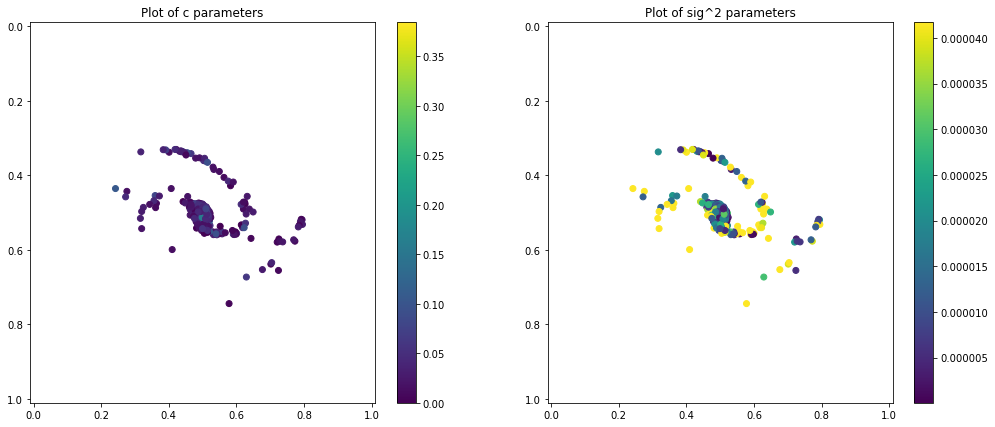

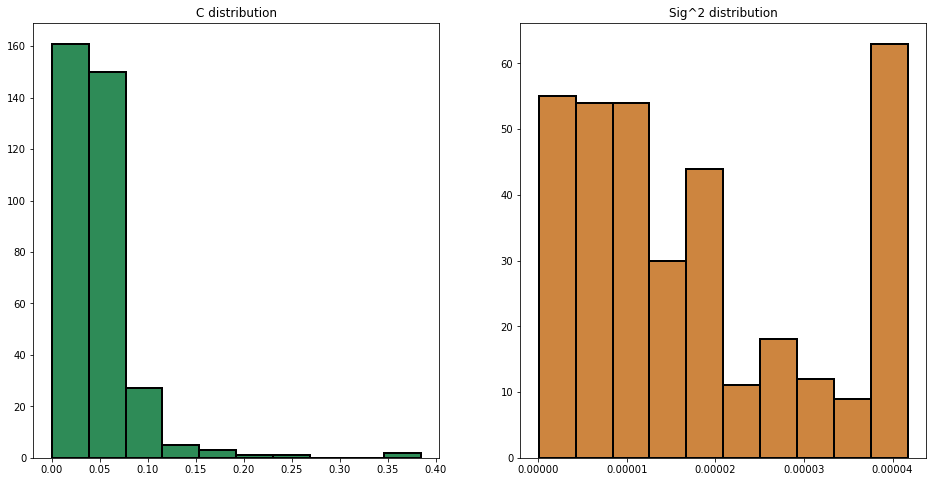

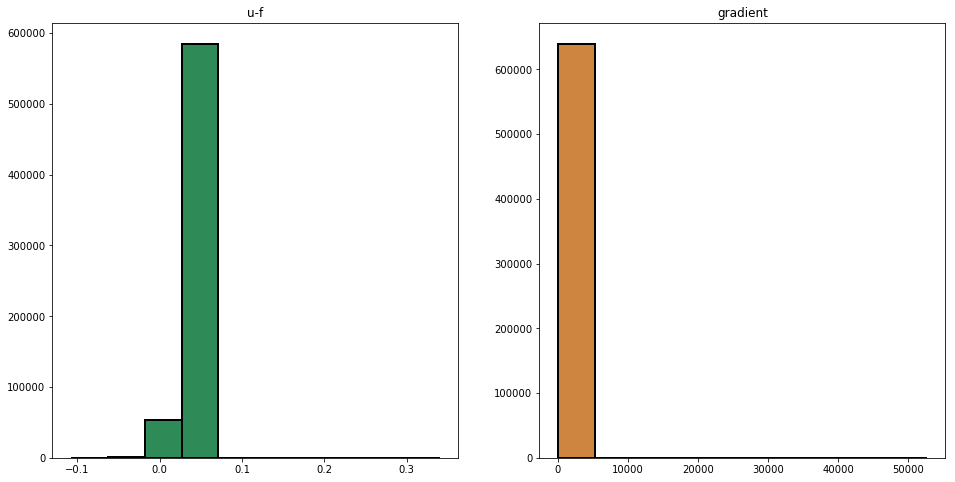

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150115

Residual stats:
Residual RMS: 0.015296053487426136
Residual Variance: 0.00023031584814132508
Flux Lost: 0.054397088675532564
Flux Addition: 0.03565023803211698
psi1(u-f): 1.5118071978131455
Exceeded Pixels: 5756
Sharpness: 182.28179840053198
psi2(grad u): 5.122667922204794
Total elapsed time: 773.8612172603607 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2627918009141846
Mean min distance between collocation and center 

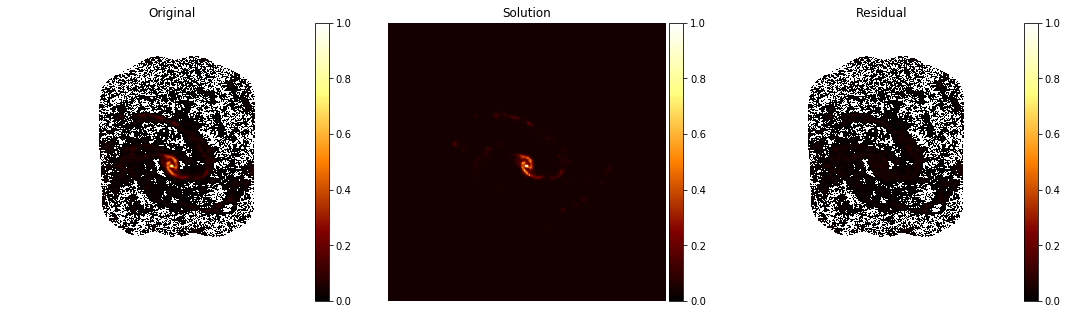

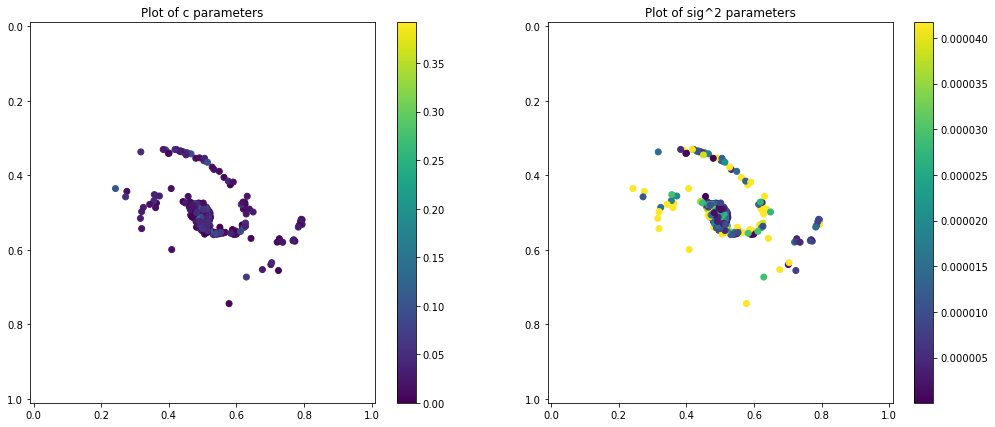

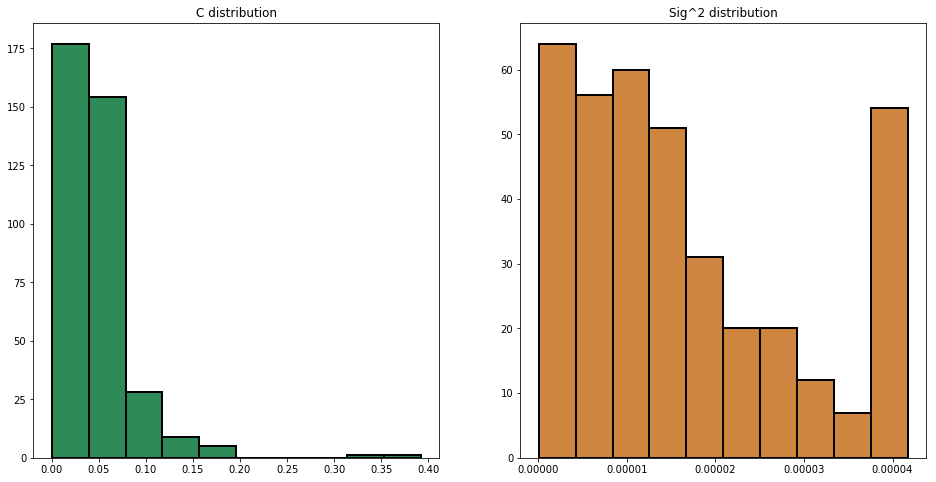

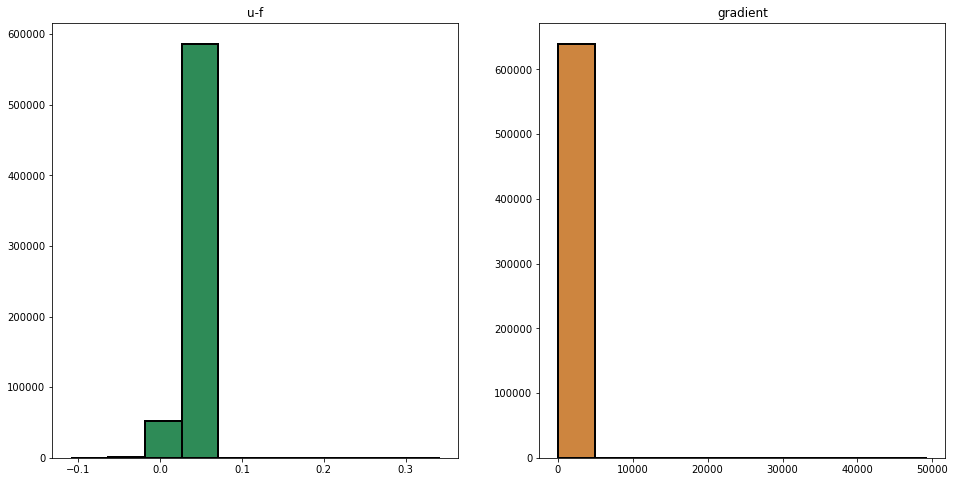

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160114

Residual stats:
Residual RMS: 0.014552354500049571
Residual Variance: 0.00020855678292224964
Flux Lost: 0.05266630143536486
Flux Addition: 0.03508226743427206
psi1(u-f): 1.0574365673825126
Exceeded Pixels: 5861
Sharpness: 182.8051560850288
psi2(grad u): 4.632352116638578
Total elapsed time: 929.7297310829163 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2598353521725014
Mean min distance between collocation and center po

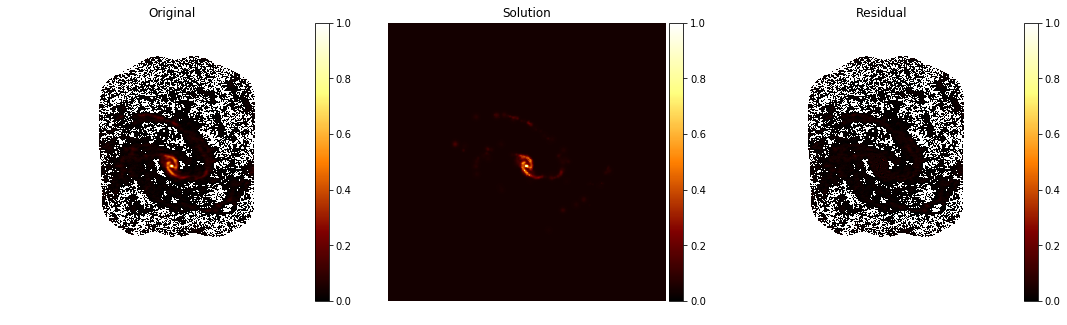

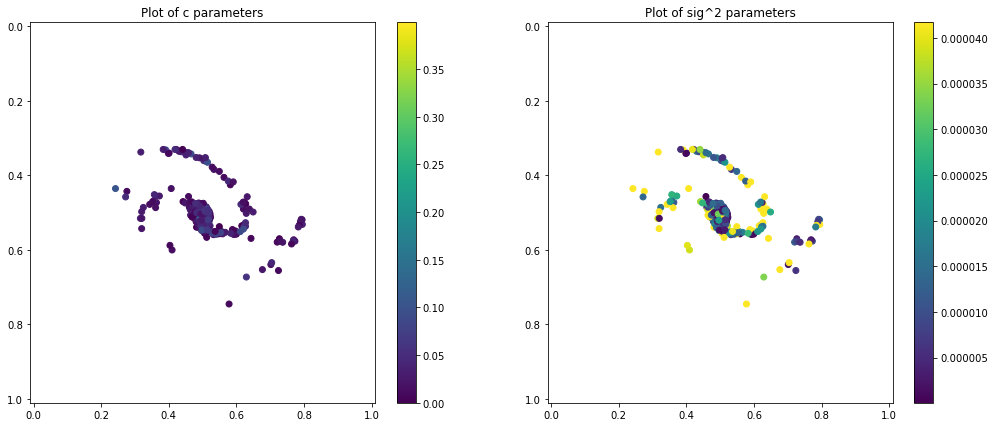

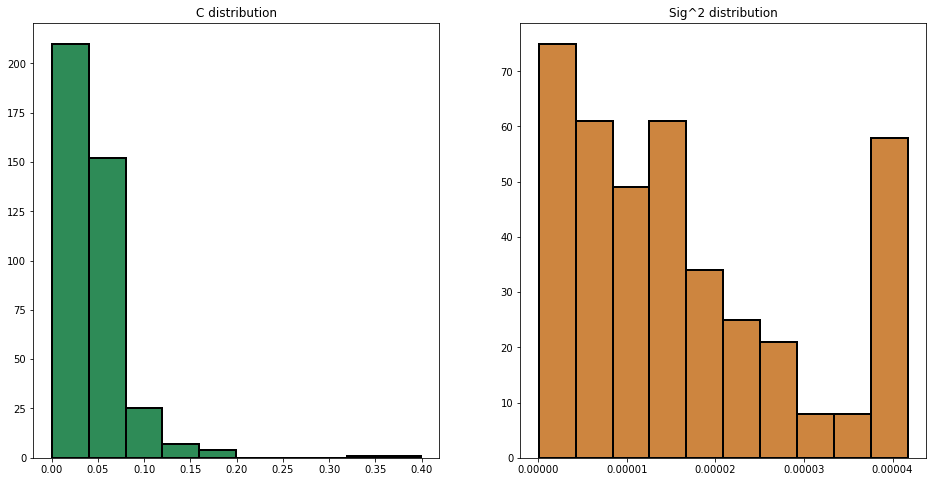

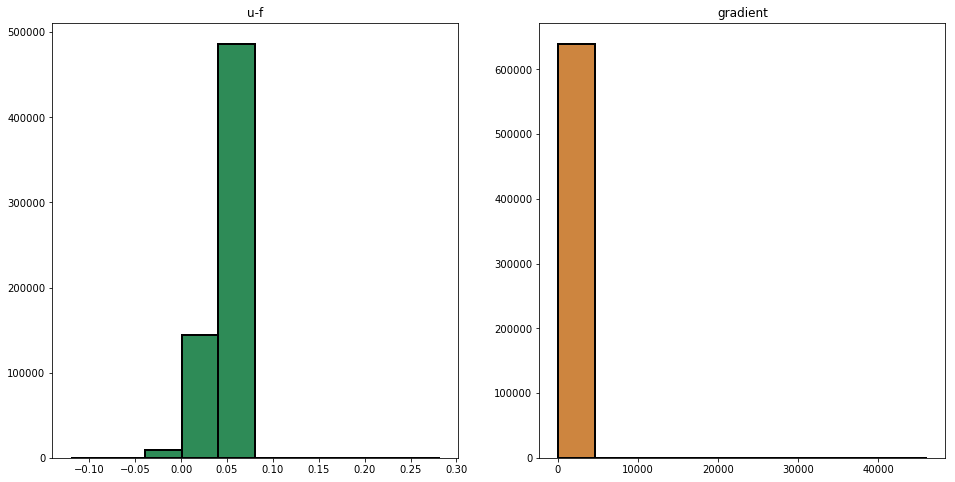

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170112

Residual stats:
Residual RMS: 0.0140532853695241
Residual Variance: 0.0001938415687961329
Flux Lost: 0.052032731490315114
Flux Addition: 0.03328624842805685
psi1(u-f): 0.9204212095873385
Exceeded Pixels: 5798
Sharpness: 182.80649389231058
psi2(grad u): 4.562970703329258
Total elapsed time: 1125.5347094535828 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26026607584315337
Mean min distance between collocation and center p

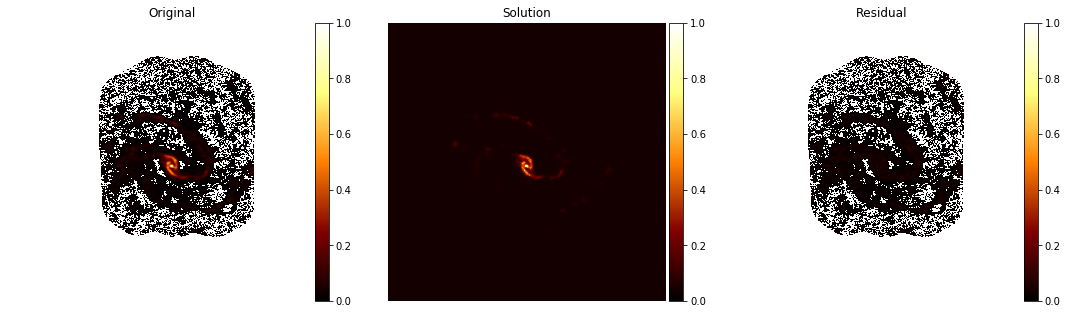

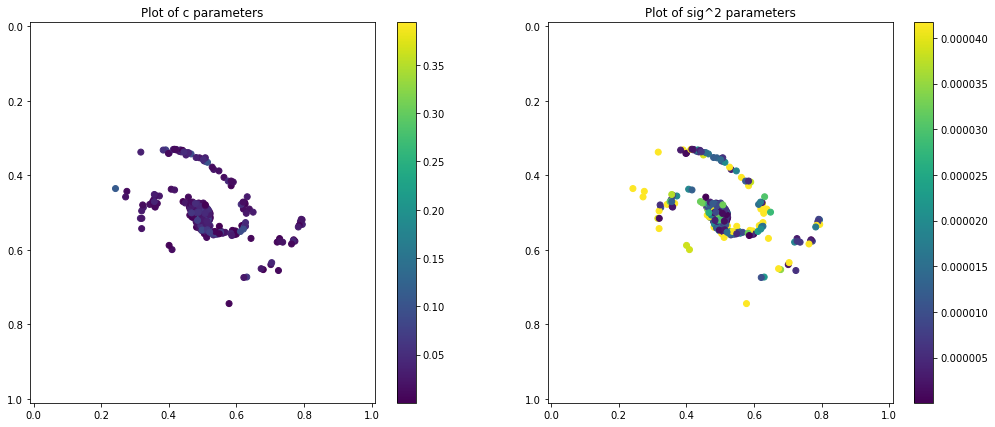

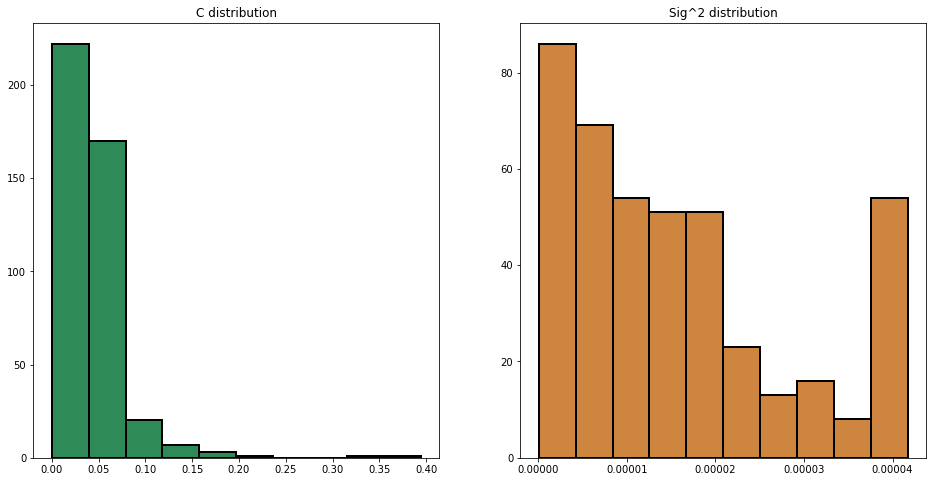

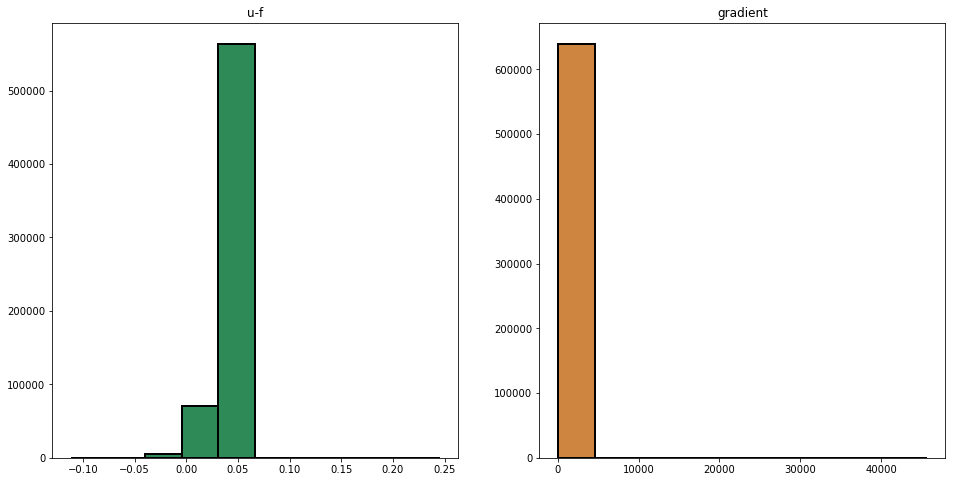

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180112

Residual stats:
Residual RMS: 0.013072936057235479
Residual Variance: 0.00016799624151503617
Flux Lost: 0.04866696668002799
Flux Addition: 0.031948994596867314
psi1(u-f): 0.6218269072688338
Exceeded Pixels: 5879
Sharpness: 184.06482223474418
psi2(grad u): 4.425340197606049
Total elapsed time: 1342.318664073944 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26023701750765066
Mean min distance between collocation and center

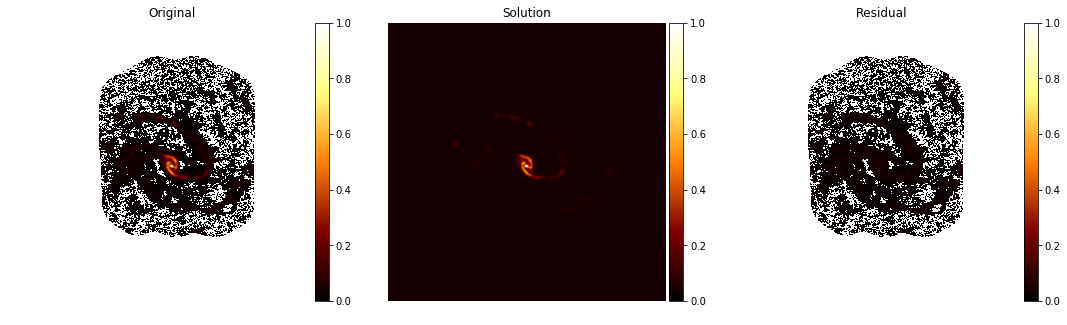

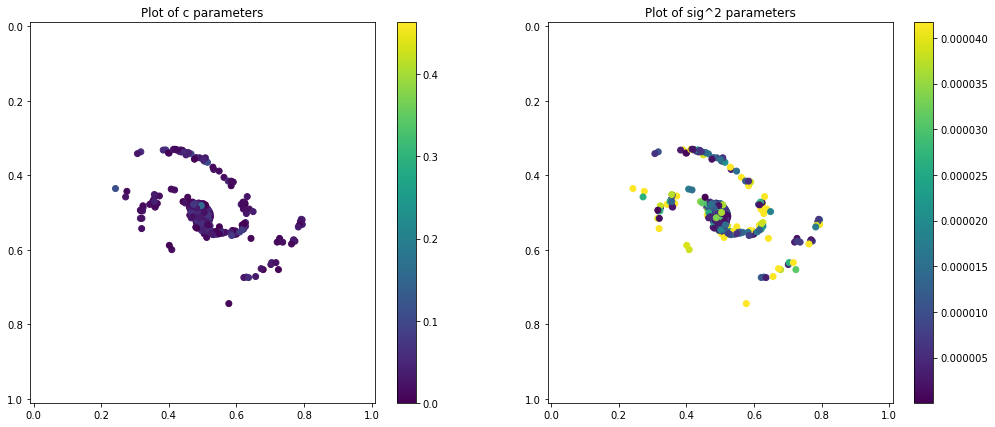

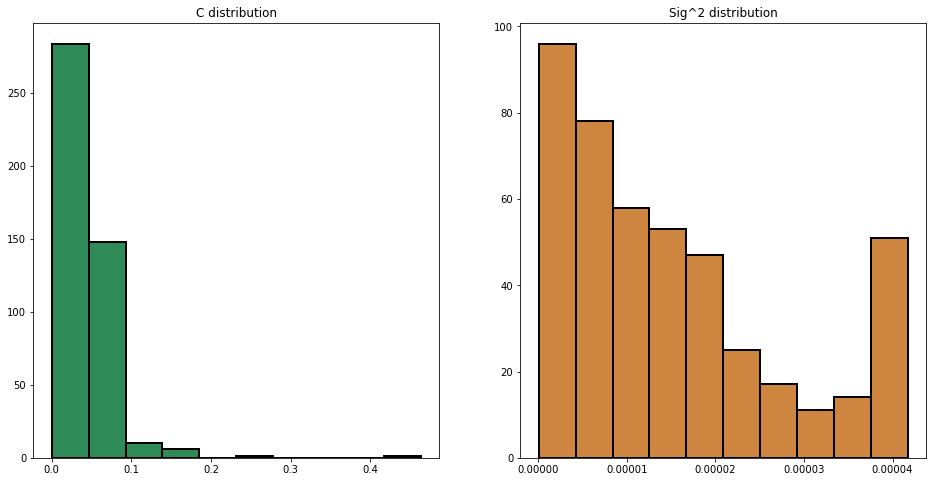

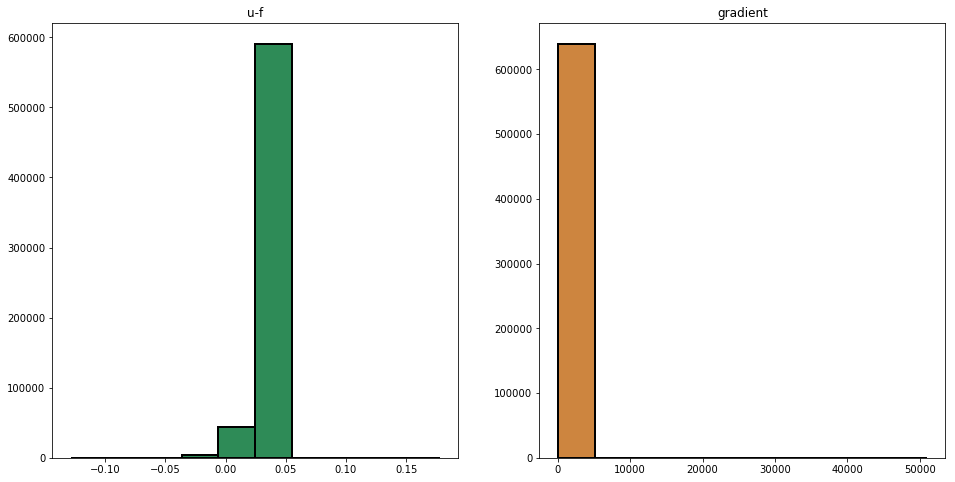

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190110

Residual stats:
Residual RMS: 0.015196913649757478
Residual Variance: 0.00022846688221899475
Flux Lost: 0.050604084020353136
Flux Addition: 0.03516063856231707
psi1(u-f): 1.9623892650075558
Exceeded Pixels: 5894
Sharpness: 183.08584873705905
psi2(grad u): 5.4357026807276485
Total elapsed time: 1523.8458988666534 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2614061128197861
Mean min distance between collocation and cente

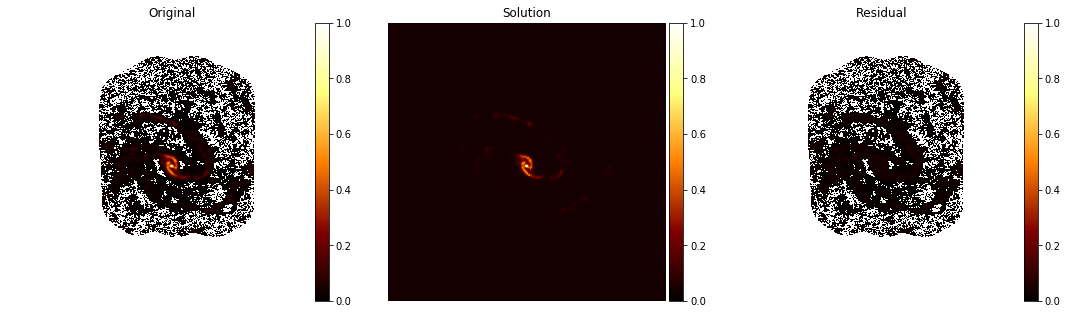

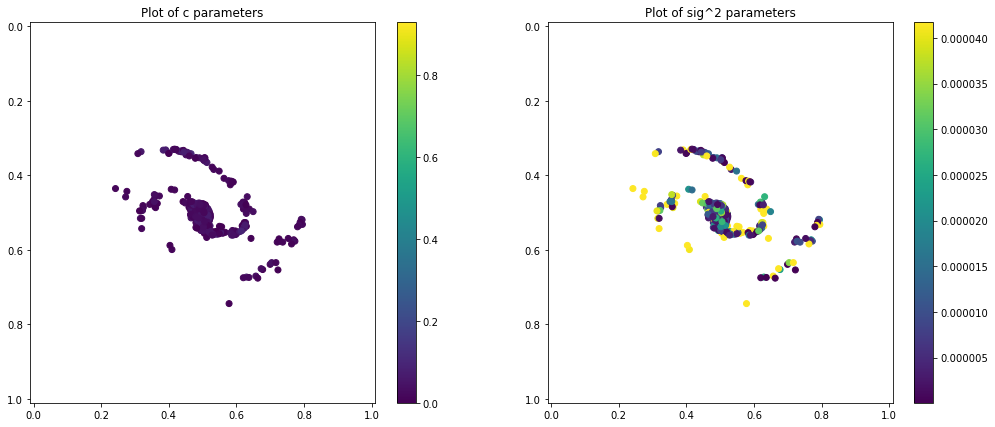

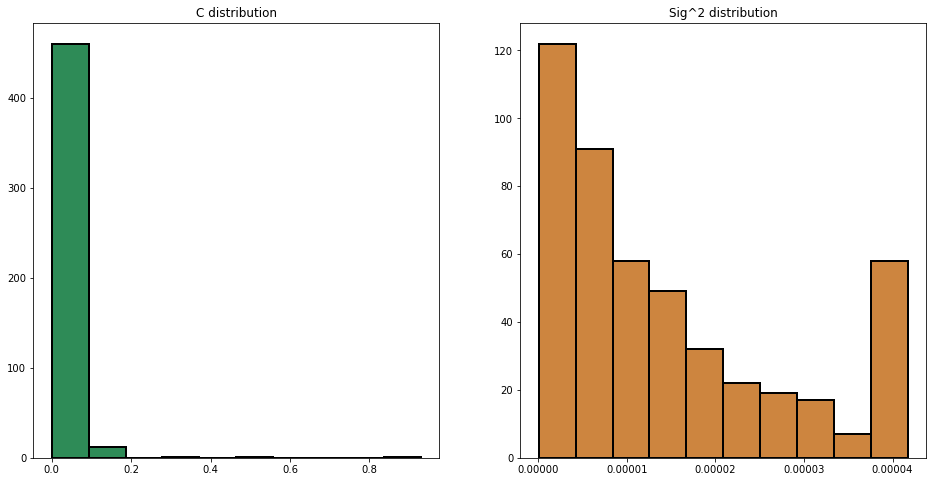

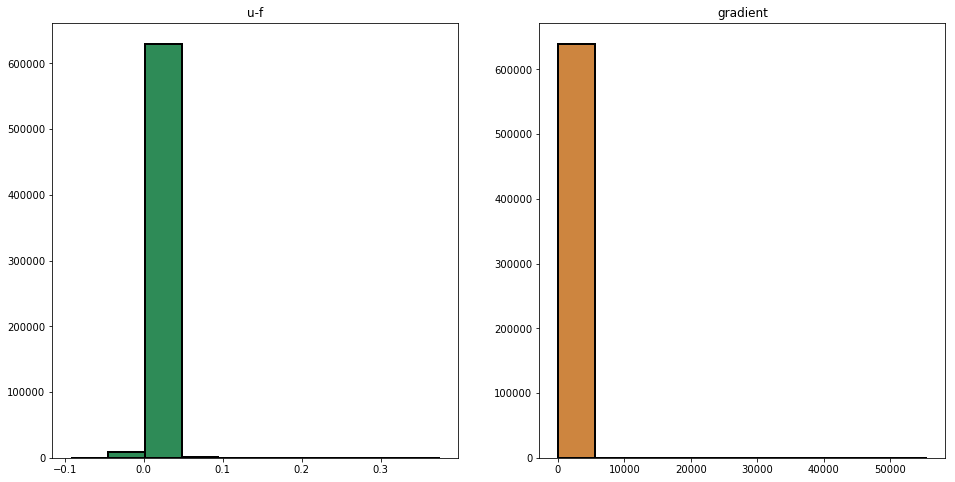

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 4
message: The cosine of the angle between func(x) and any column of the
  Jacobian is at most 0.000000 in absolute value
nfev: 2001

Residual stats:
Residual RMS: 0.08573717775537285
Residual Variance: 0.005821888595821017
Flux Lost: 0.4047846477214999
Flux Addition: 0.021272027013584178
psi1(u-f): 0.1404849508147235
Exceeded Pixels: 2905
Sharpness: 103.18034211819099
psi2(grad u): 0.5946564939281307
Total elapsed time: 19.901192665100098 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26022765759033095

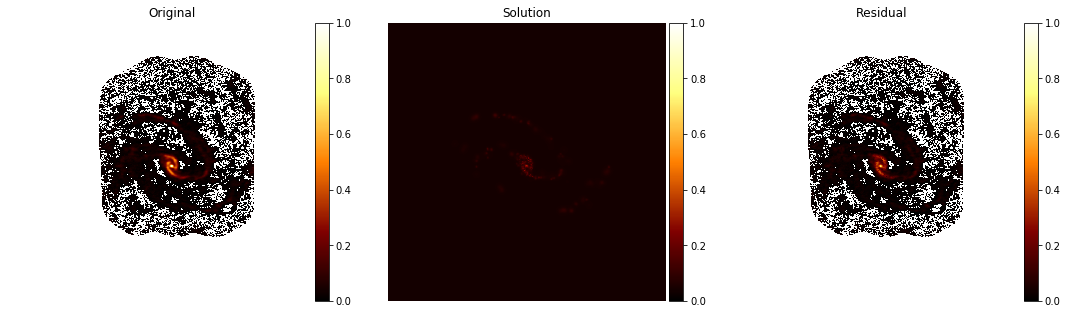

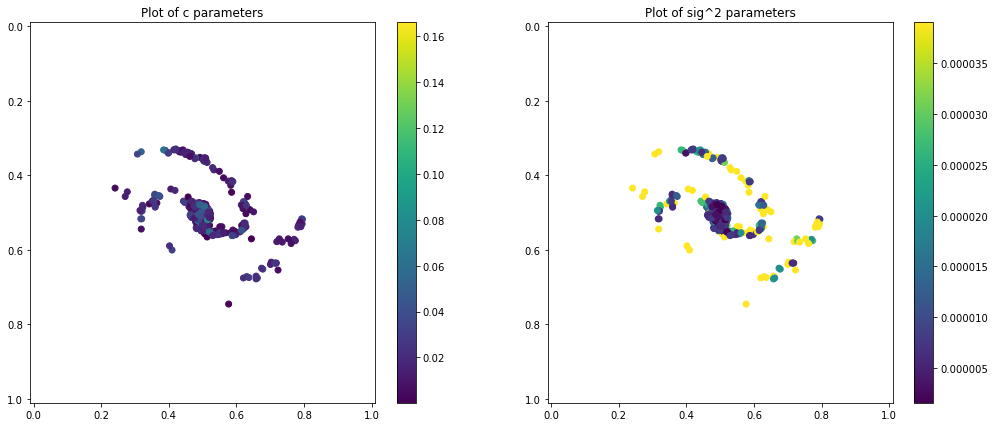

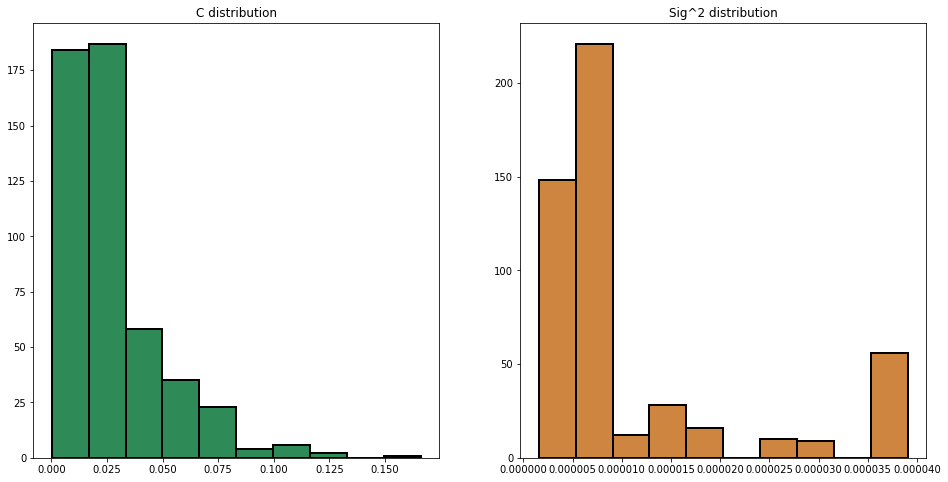

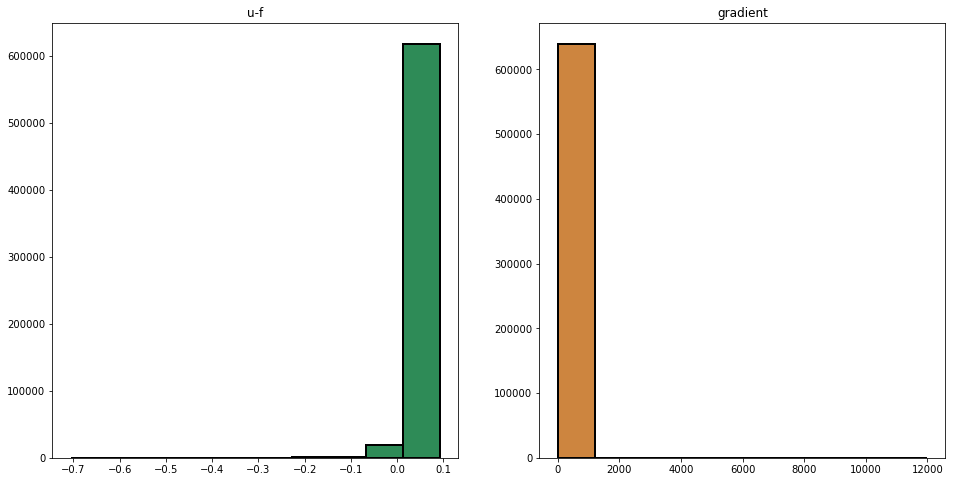

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    #del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("../results/exp01_m{0}_m100.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

In [6]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 2
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

../lib/points_generation.py:106: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20107

Residual stats:
Residual RMS: 0.06720074028868055
Residual Variance: 0.004181953109813008
Flux Lost: 0.2560454624004561
Flux Addition: 0.076801786221816
psi1(u-f): 14.293126947831922
Exceeded Pixels: 3541
Sharpness: 110.17507842474888
psi2(grad u): 0.6930017342189613
Total elapsed time: 5.363775968551636 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2639222745691347
Mean min distance between collocation and center points: 0

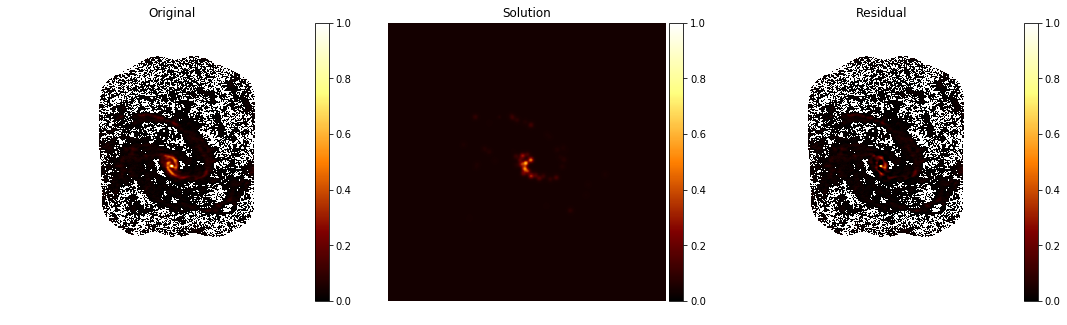

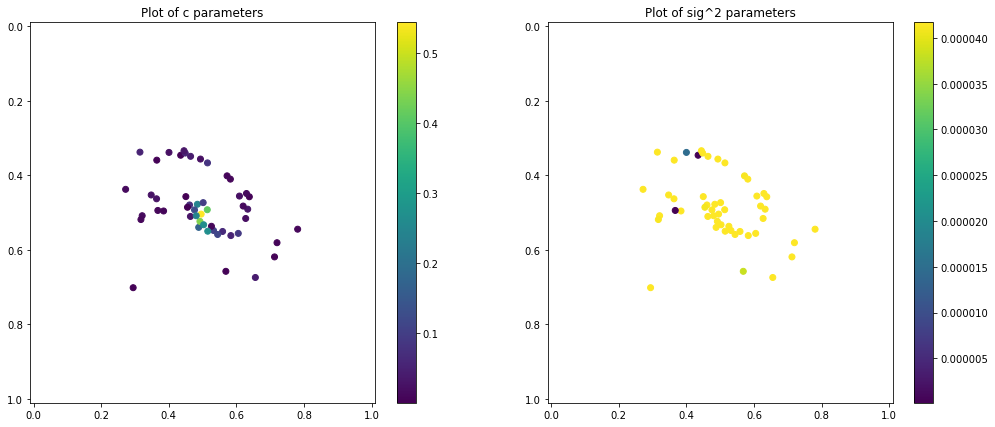

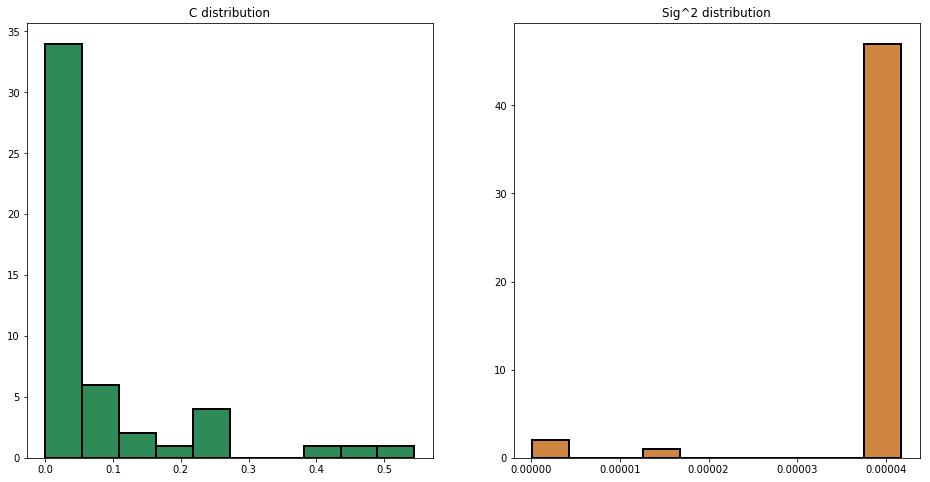

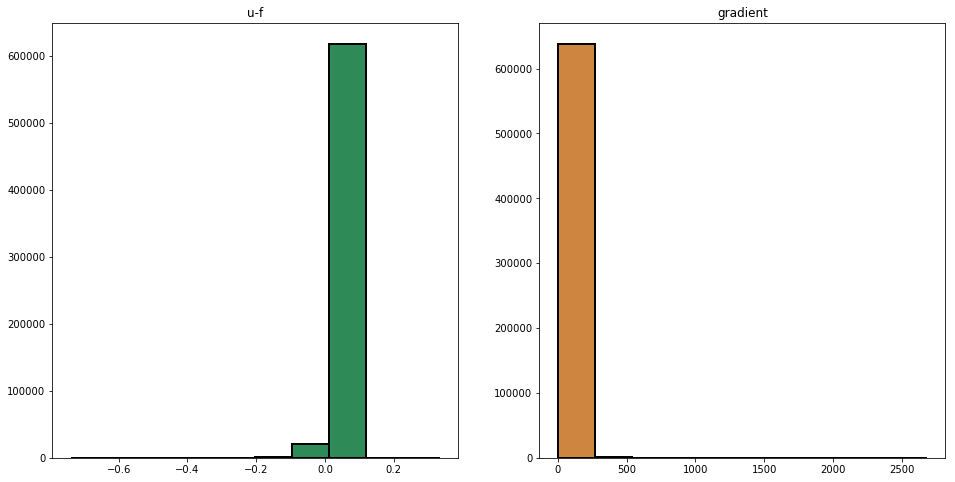

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30108

Residual stats:
Residual RMS: 0.05122888336850826
Residual Variance: 0.0025255668623830134
Flux Lost: 0.18196886298628012
Flux Addition: 0.08446373942895825
psi1(u-f): 8.606935606599372
Exceeded Pixels: 4682
Sharpness: 122.9757538790847
psi2(grad u): 0.4902694662976189
Total elapsed time: 11.211260318756104 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2547453899103715
Mean min distance between collocation and center points

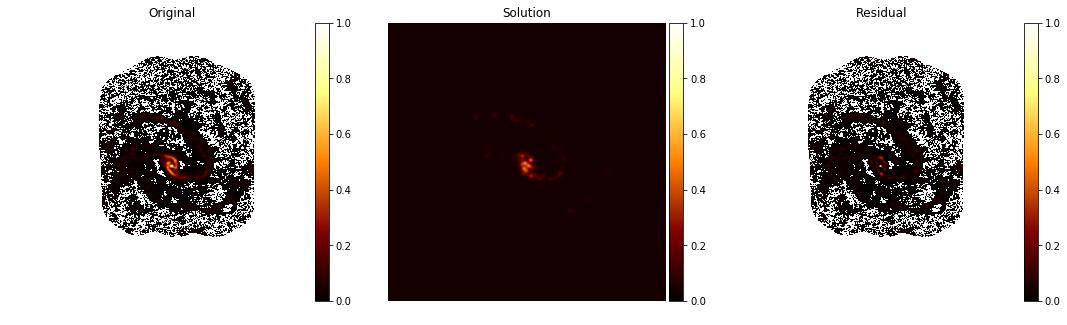

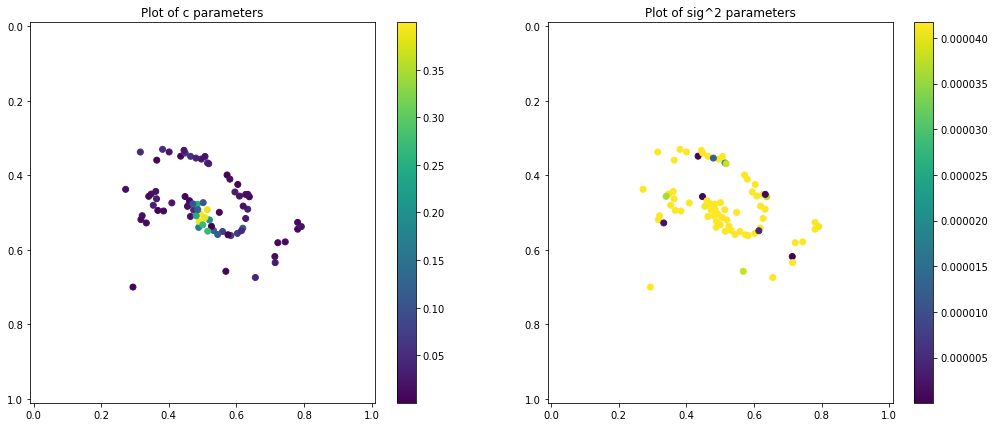

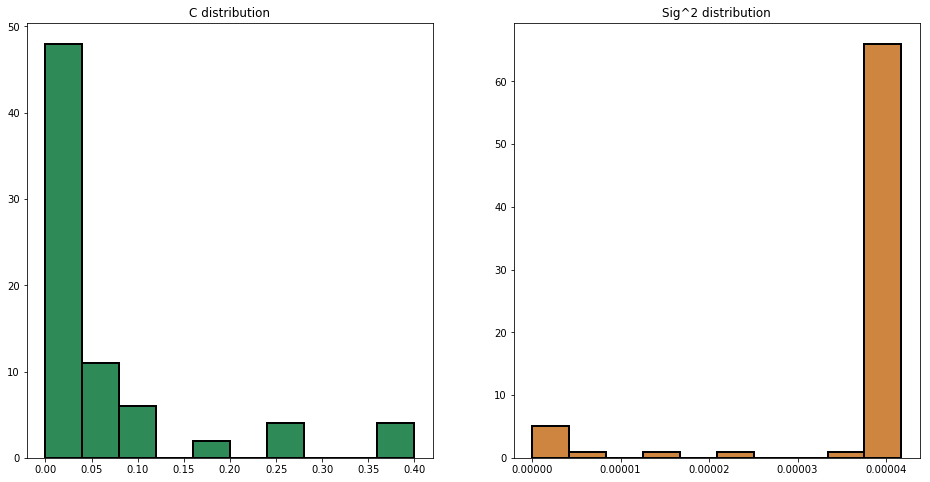

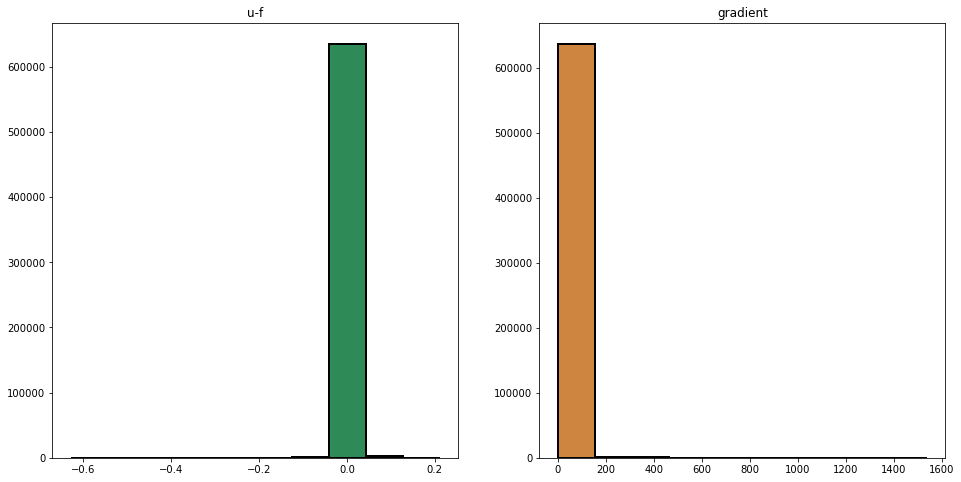

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40105

Residual stats:
Residual RMS: 0.04705527476356347
Residual Variance: 0.002182172754966192
Flux Lost: 0.1477809638044098
Flux Addition: 0.0922760185260984
psi1(u-f): 10.204282044642072
Exceeded Pixels: 5509
Sharpness: 129.79552178706086
psi2(grad u): 0.5491324661479505
Total elapsed time: 18.923858642578125 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.25474538991037177
Mean min distance between collocation and center point

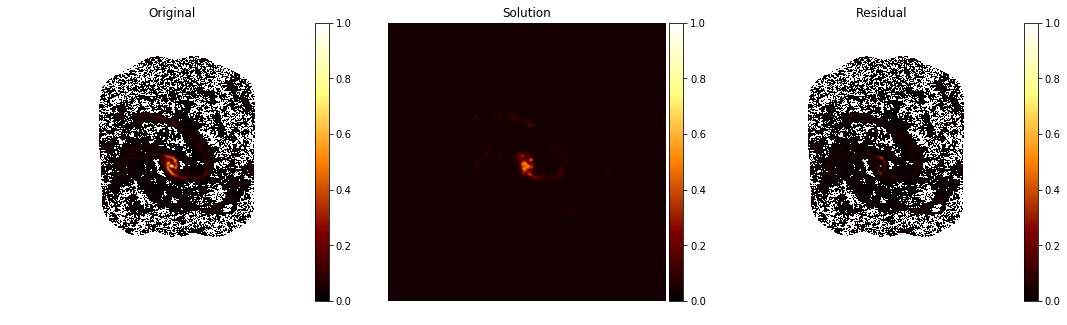

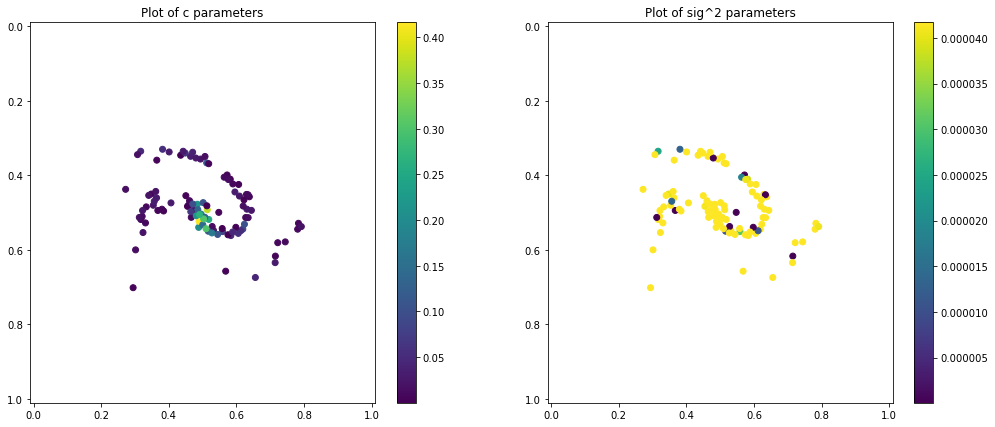

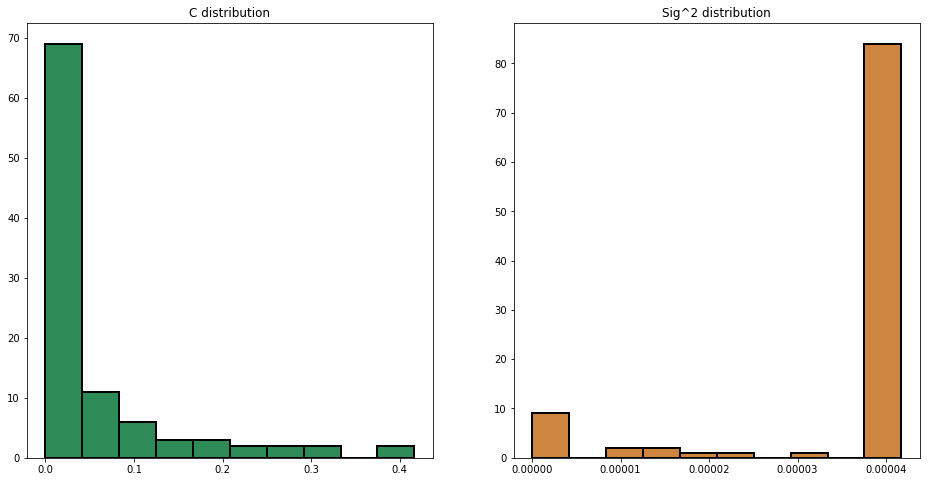

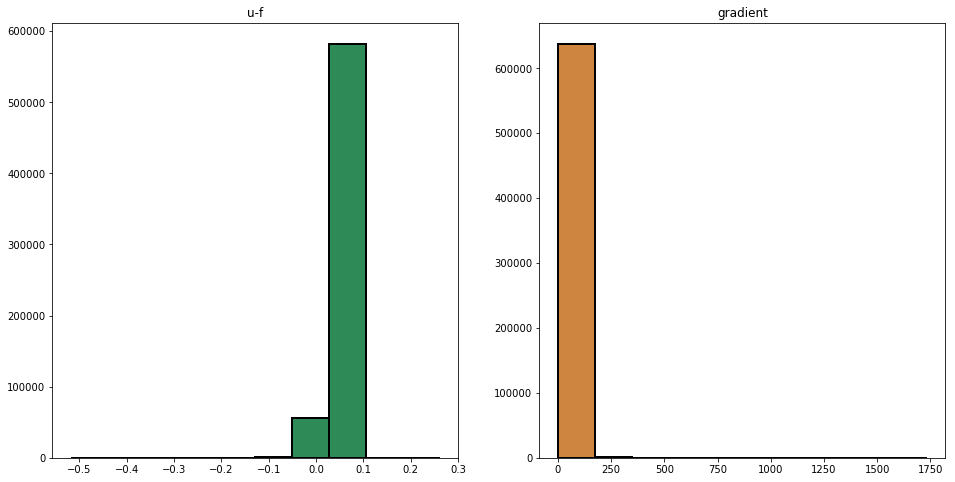

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50111

Residual stats:
Residual RMS: 0.04244561214979388
Residual Variance: 0.0017940108609121313
Flux Lost: 0.12484794520301881
Flux Addition: 0.09777520919584325
psi1(u-f): 9.003924805912838
Exceeded Pixels: 5900
Sharpness: 132.63521438659112
psi2(grad u): 0.5071711121166665
Total elapsed time: 31.06534457206726 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.20155347007210156
Mean min distance between collocation and center poin

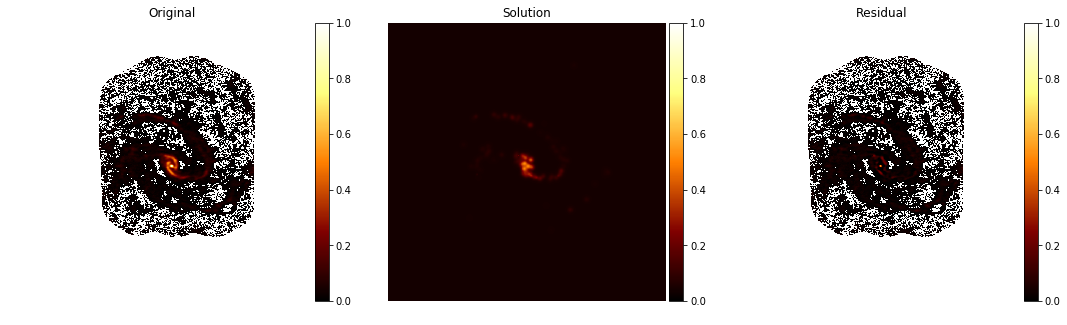

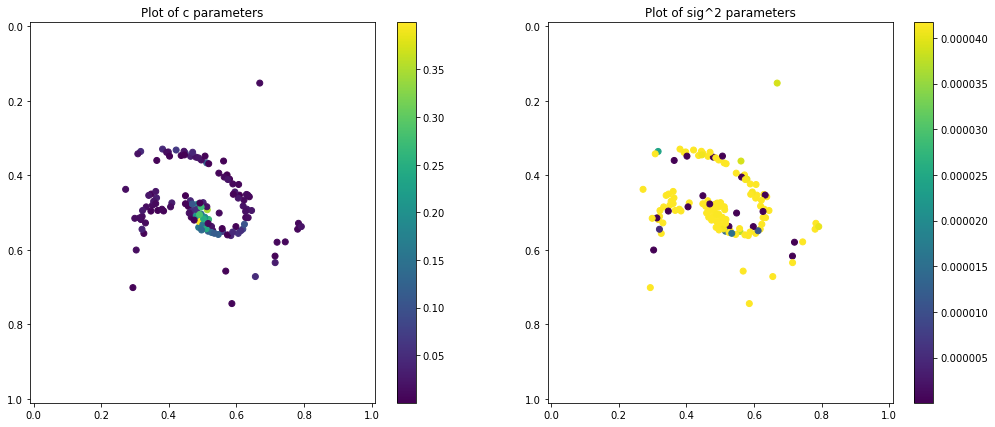

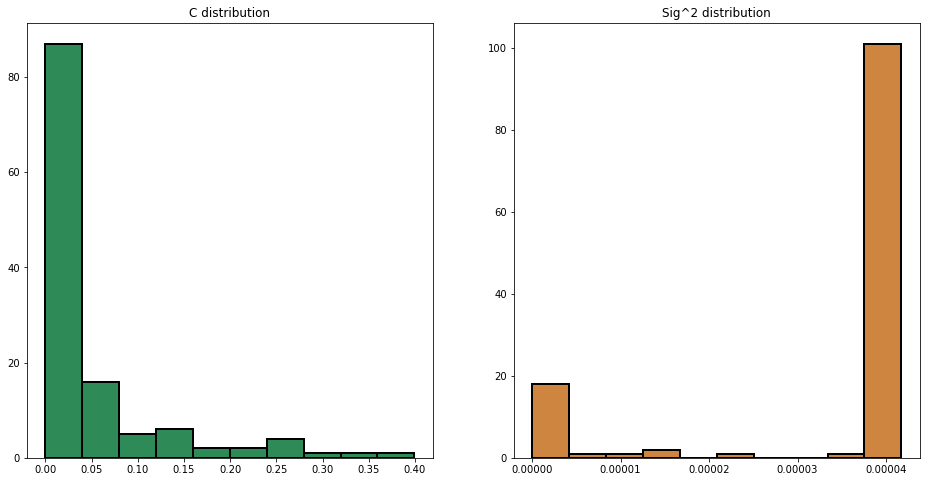

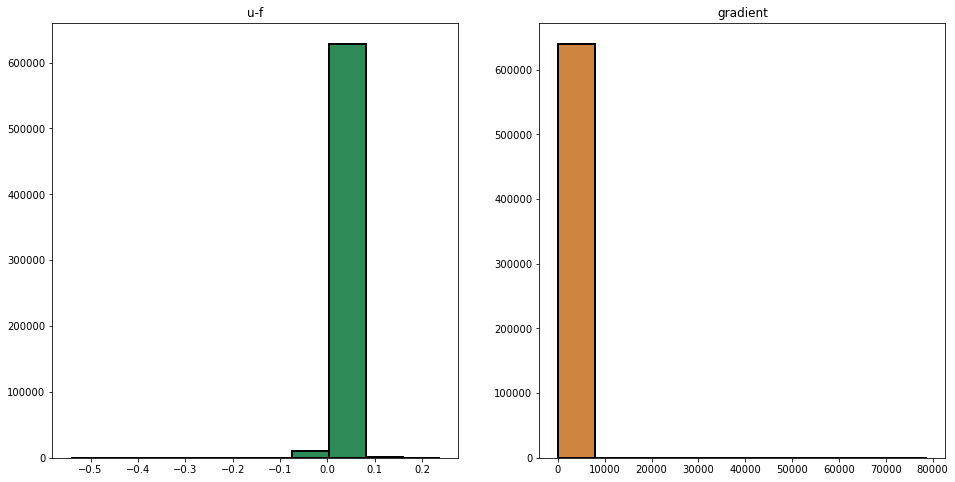

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60113

Residual stats:
Residual RMS: 0.035892605992685005
Residual Variance: 0.0012856422090092127
Flux Lost: 0.10674438609840645
Flux Addition: 0.09081749916450031
psi1(u-f): 7.139516278975476
Exceeded Pixels: 6134
Sharpness: 137.14983357225813
psi2(grad u): 0.5774946901210919
Total elapsed time: 54.28481698036194 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19913851561448595
Mean min distance between collocation and center poi

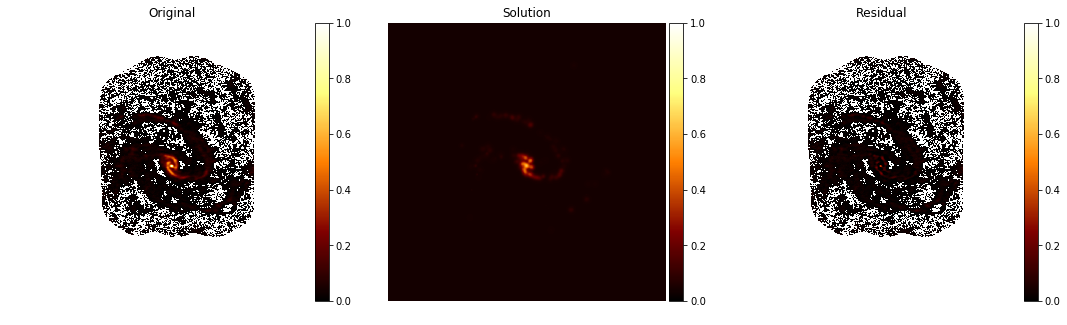

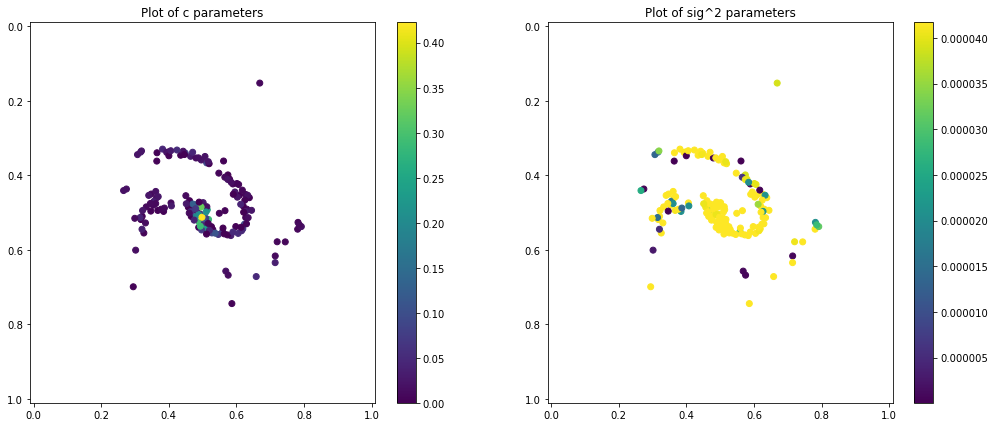

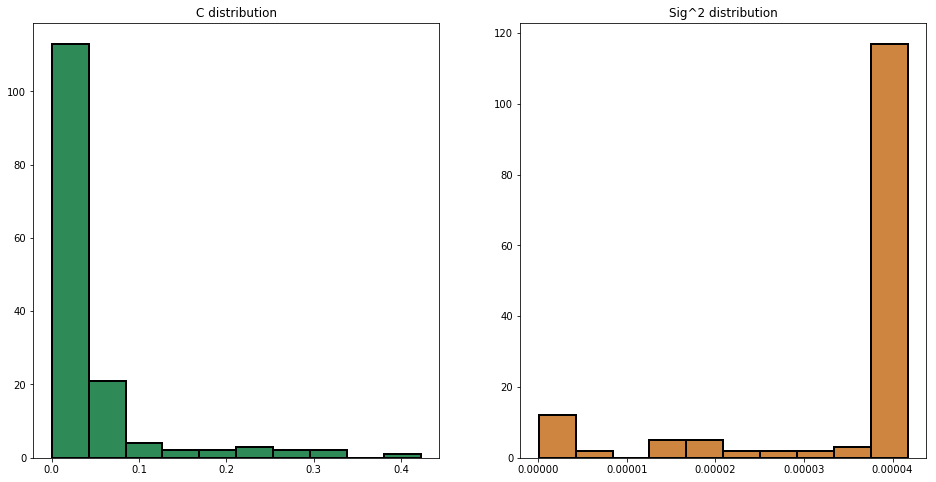

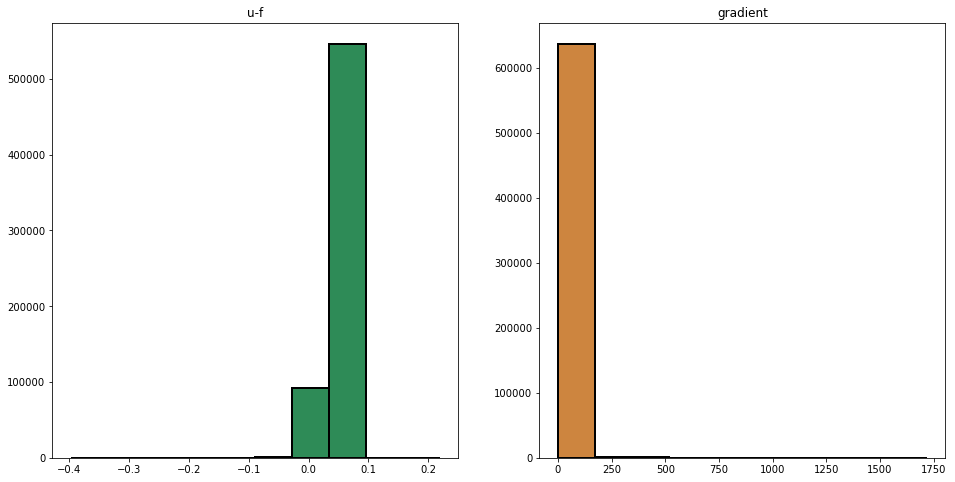

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70107

Residual stats:
Residual RMS: 0.0310684505428706
Residual Variance: 0.0009643312204869472
Flux Lost: 0.09186483210944076
Flux Addition: 0.08247066009036824
psi1(u-f): 4.940584925697775
Exceeded Pixels: 6341
Sharpness: 145.42131956389193
psi2(grad u): 0.7718596625527331
Total elapsed time: 79.1210675239563 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19227239941949523
Mean min distance between collocation and center points

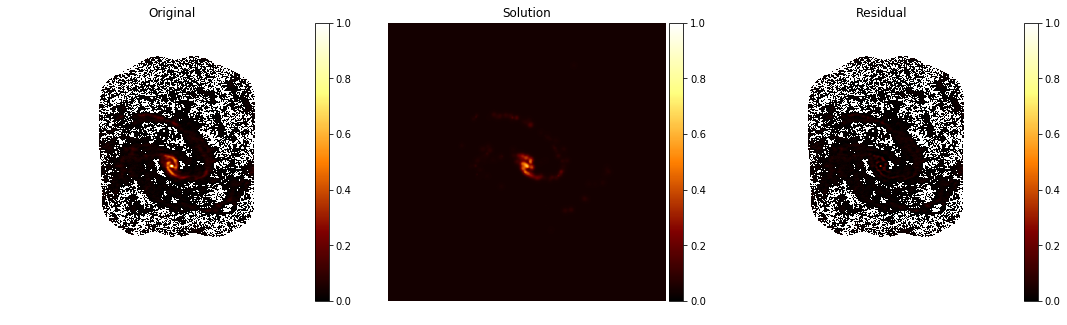

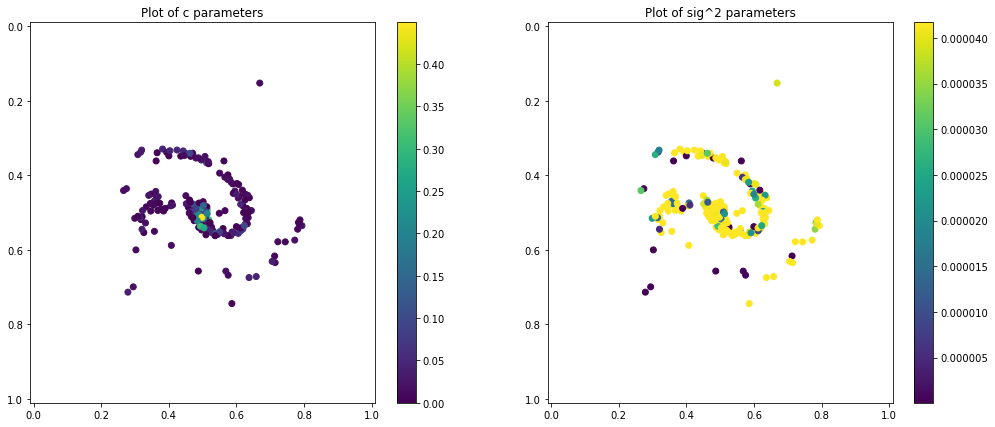

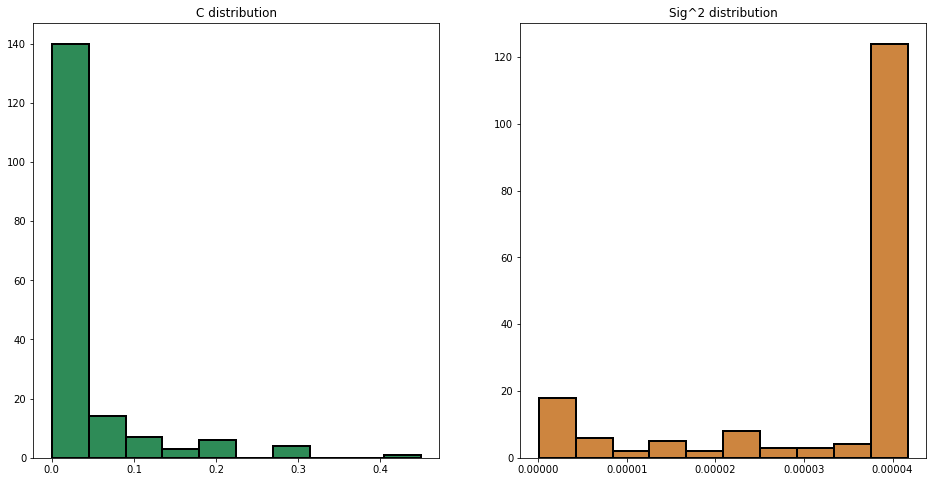

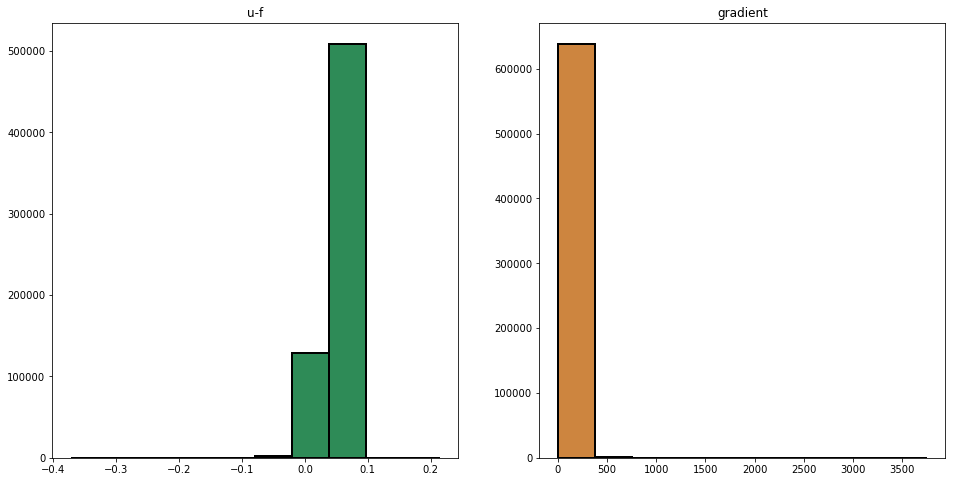

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80111

Residual stats:
Residual RMS: 0.026230017277623724
Residual Variance: 0.0006861584423304912
Flux Lost: 0.08277267854770005
Flux Addition: 0.06941306087301649
psi1(u-f): 2.8570736413388005
Exceeded Pixels: 6429
Sharpness: 154.19054482972635
psi2(grad u): 1.5578829981406102
Total elapsed time: 116.4920027256012 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19227924658805176
Mean min distance between collocation and center po

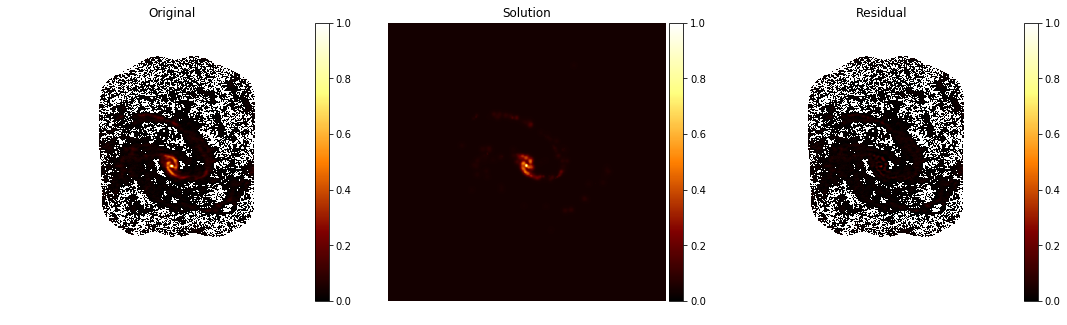

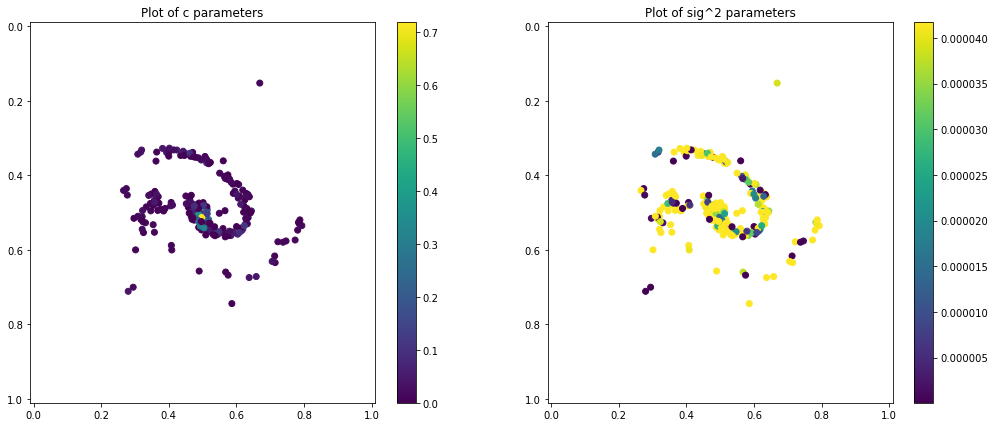

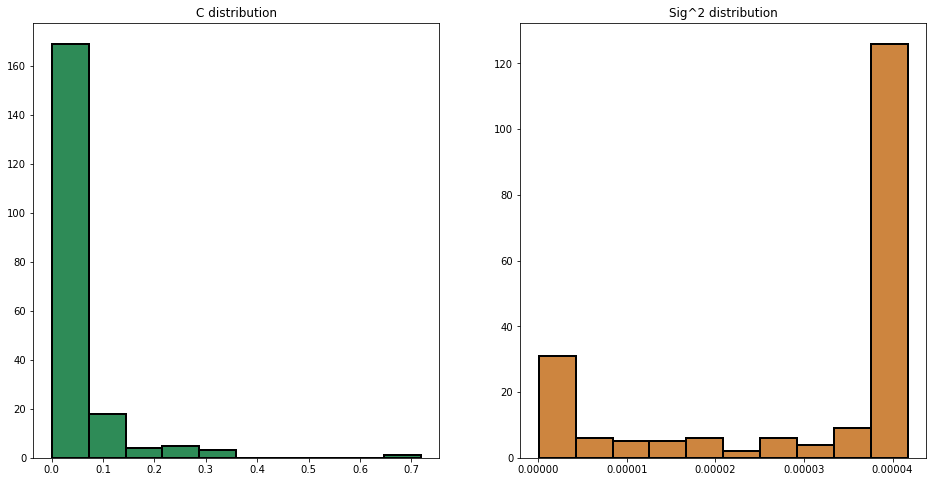

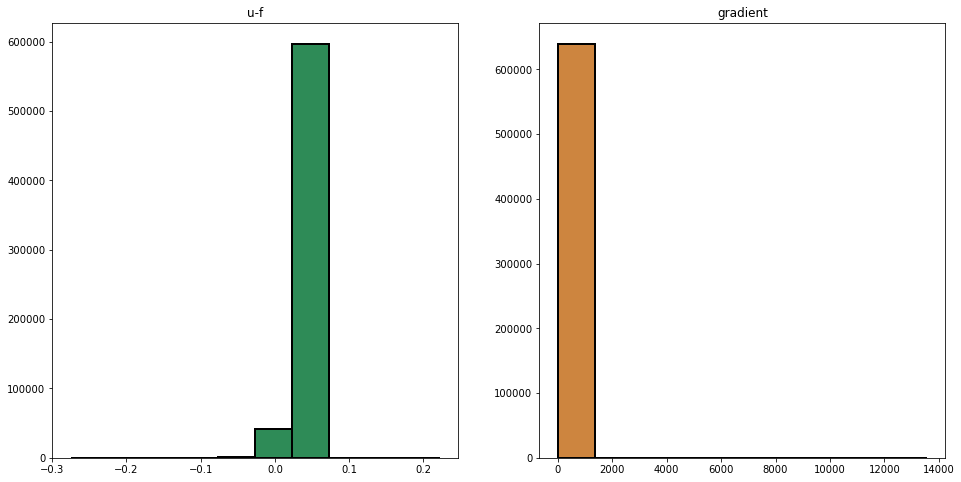

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90110

Residual stats:
Residual RMS: 0.029724903166023015
Residual Variance: 0.0008835088935785093
Flux Lost: 0.0817591876549379
Flux Addition: 0.07933729928368081
psi1(u-f): 3.858623355950996
Exceeded Pixels: 6757
Sharpness: 150.71006099805732
psi2(grad u): 0.7433090185186878
Total elapsed time: 167.12556743621826 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1922723940487
Mean min distance between collocation and center points:

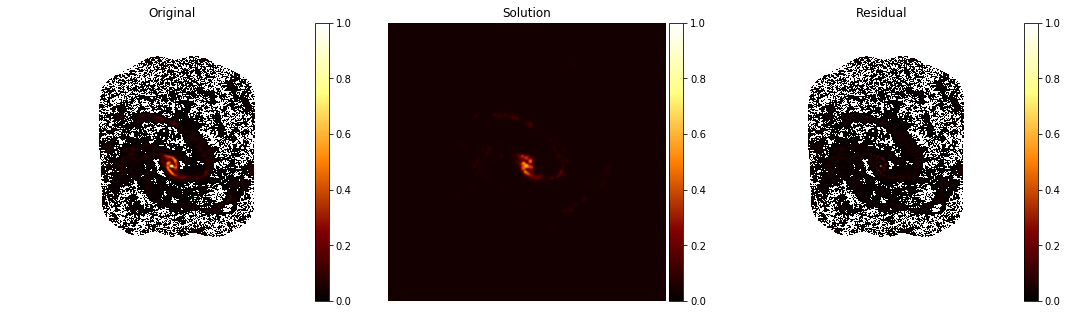

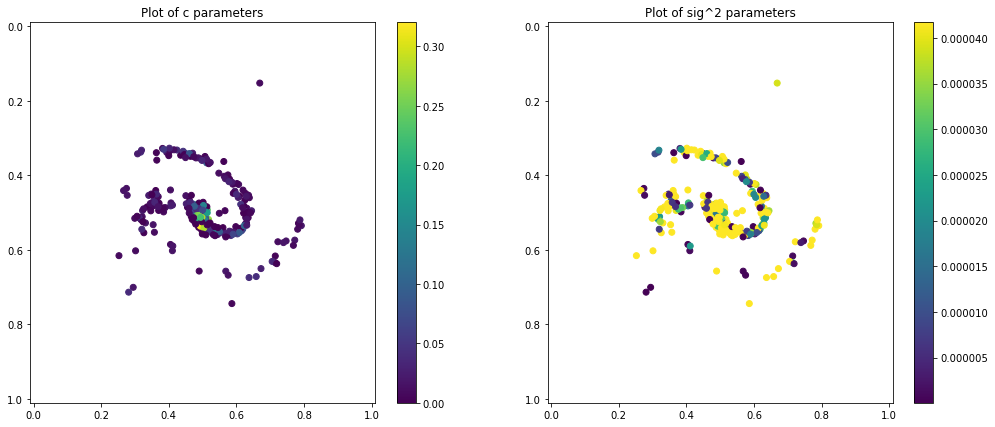

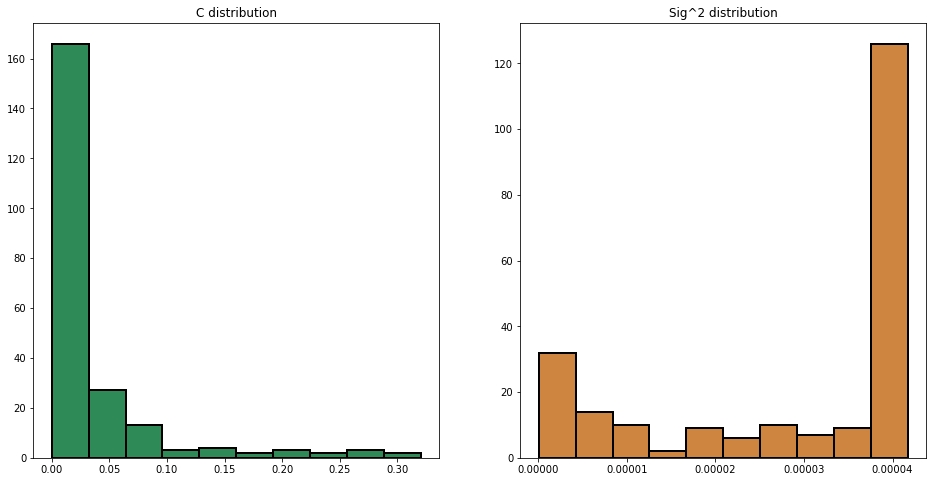

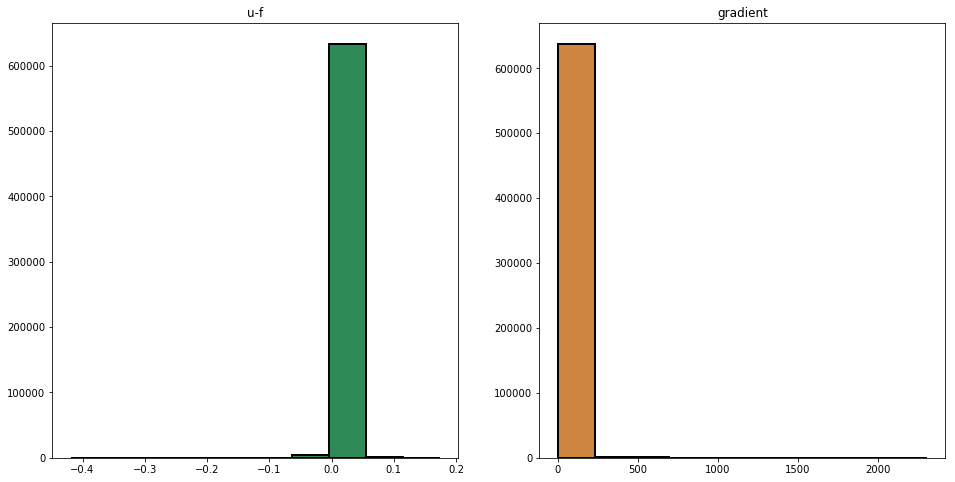

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.03494264102854109
Residual Variance: 0.001216919166860981
Flux Lost: 0.10302802647149953
Flux Addition: 0.08324361896763256
psi1(u-f): 4.180596304300423
Exceeded Pixels: 6538
Sharpness: 141.16001343086376
psi2(grad u): 0.6888141072521654
Total elapsed time: 211.33120393753052 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19219847878539717
Mean min distance between collocation and center po

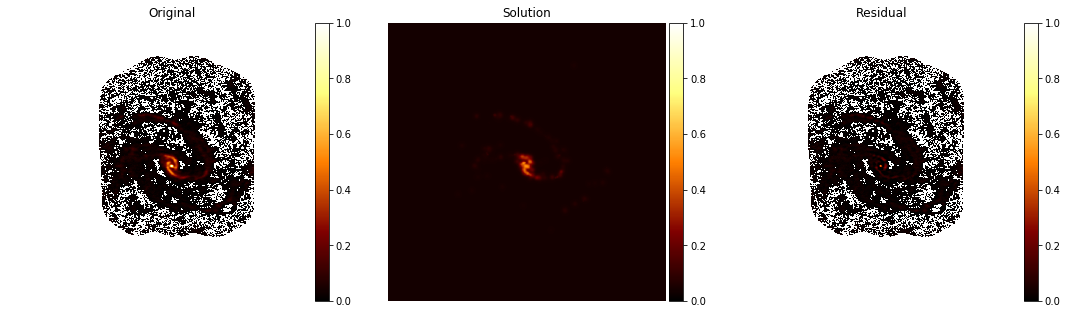

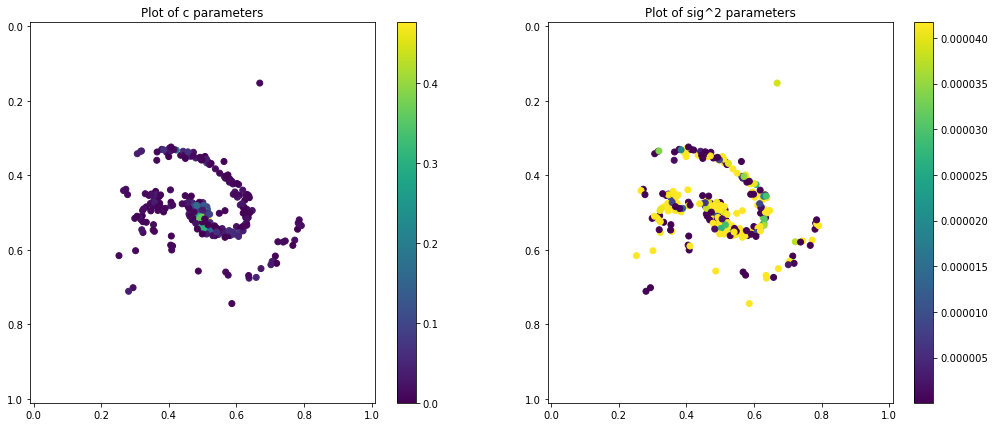

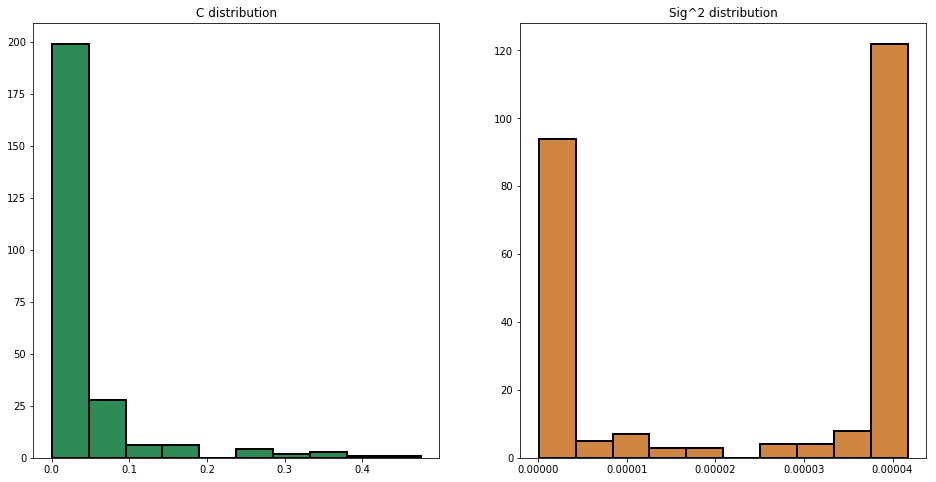

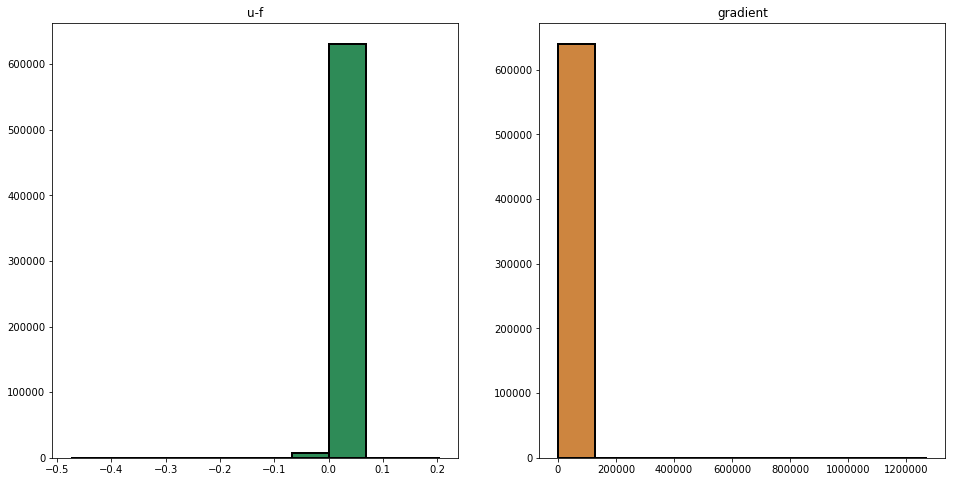

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110107

Residual stats:
Residual RMS: 0.027306916106325213
Residual Variance: 0.0007444285128712222
Flux Lost: 0.083550209229548
Flux Addition: 0.07263223244854186
psi1(u-f): 2.8192959939776006
Exceeded Pixels: 6598
Sharpness: 151.12145549278873
psi2(grad u): 1.467859263370759
Total elapsed time: 283.30573654174805 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1139720382641676
Mean min distance between collocation and center poi

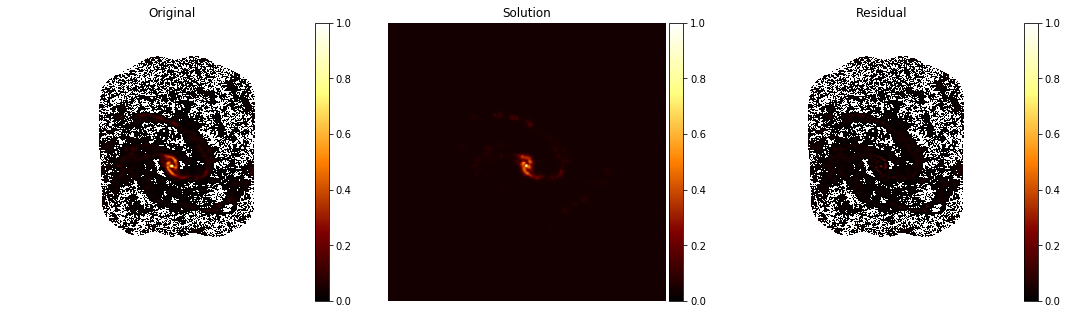

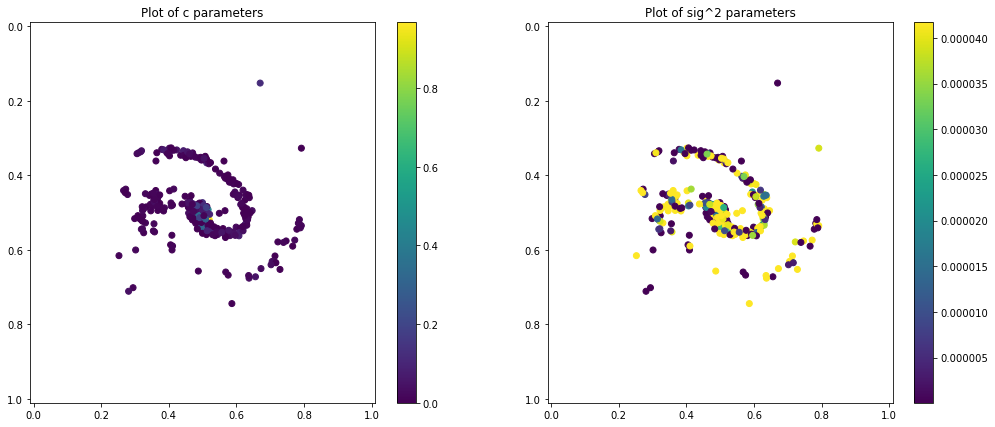

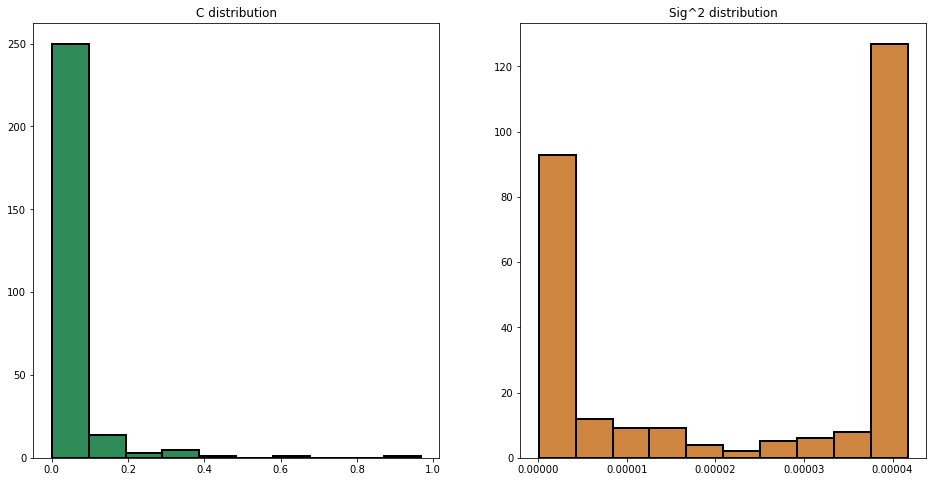

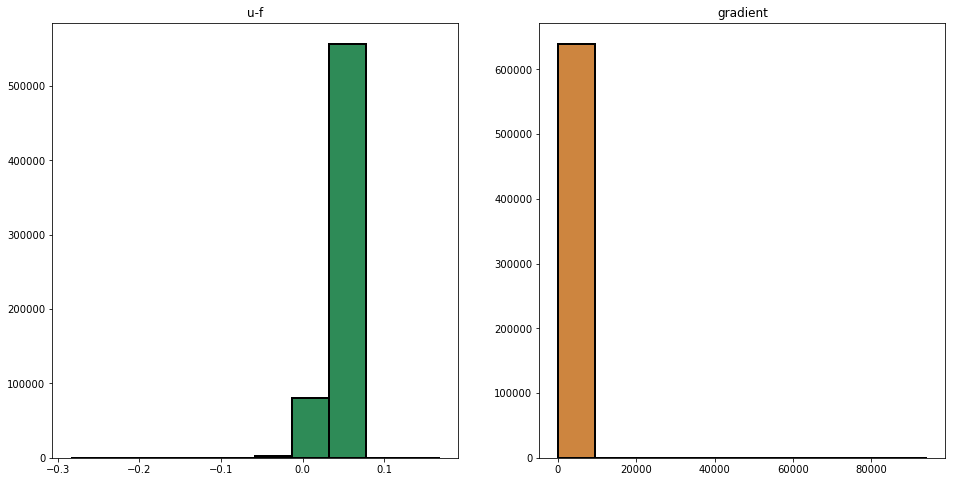

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120109

Residual stats:
Residual RMS: 0.023204315969331795
Residual Variance: 0.0005383263194846603
Flux Lost: 0.0684222543321516
Flux Addition: 0.06511127927276313
psi1(u-f): 1.8162191739907434
Exceeded Pixels: 6900
Sharpness: 161.74964840906756
psi2(grad u): 1.6961429017463925
Total elapsed time: 370.21781611442566 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06523742068766644
Mean min distance between collocation and center 

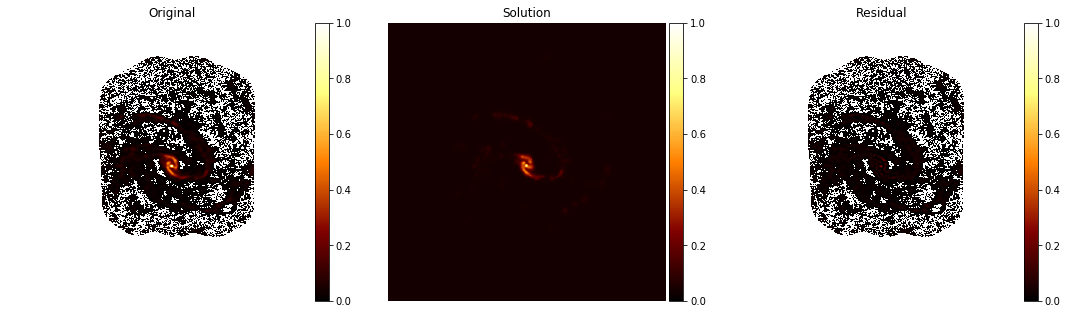

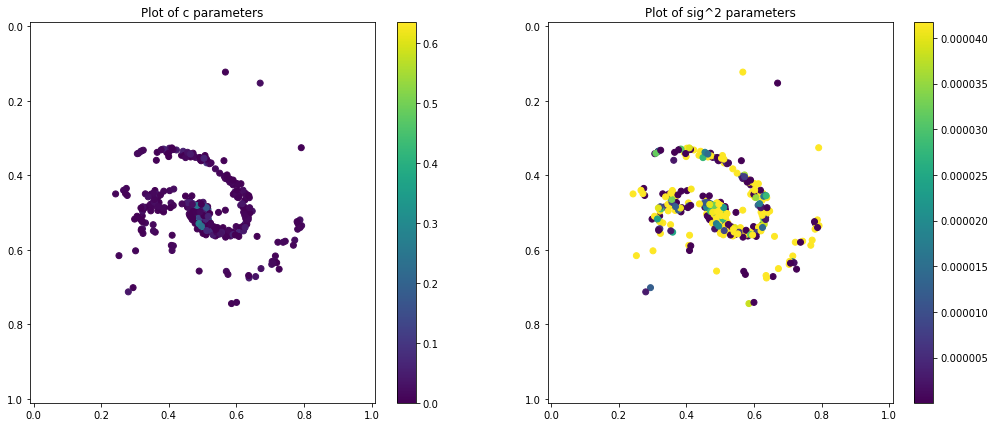

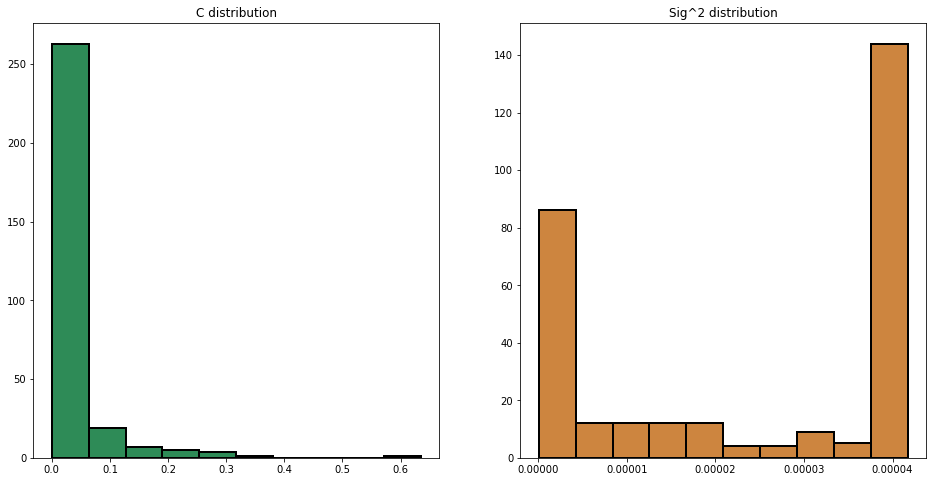

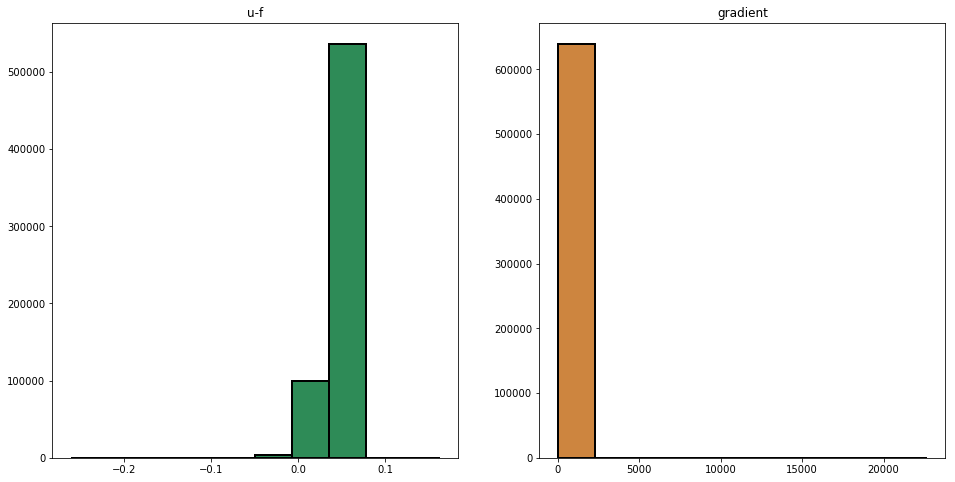

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130110

Residual stats:
Residual RMS: 0.022052203521582166
Residual Variance: 0.0004861696464507957
Flux Lost: 0.06451844697610805
Flux Addition: 0.06098167198079043
psi1(u-f): 1.6415833125641601
Exceeded Pixels: 6905
Sharpness: 165.07022191942946
psi2(grad u): 1.799819063792651
Total elapsed time: 465.13174080848694 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06401885433261169
Mean min distance between collocation and center 

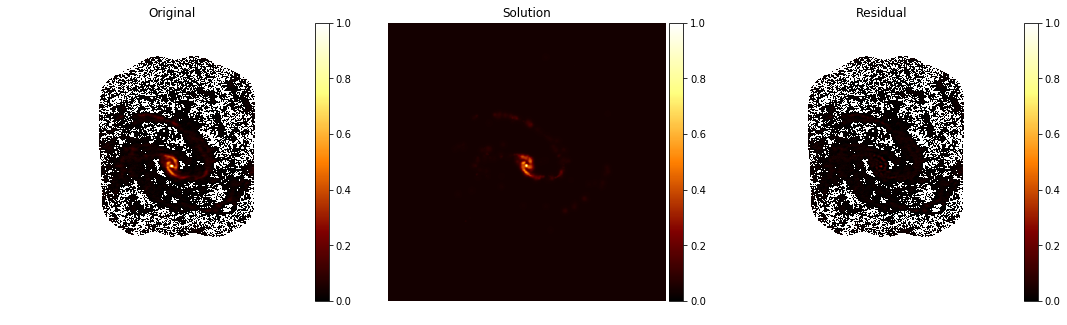

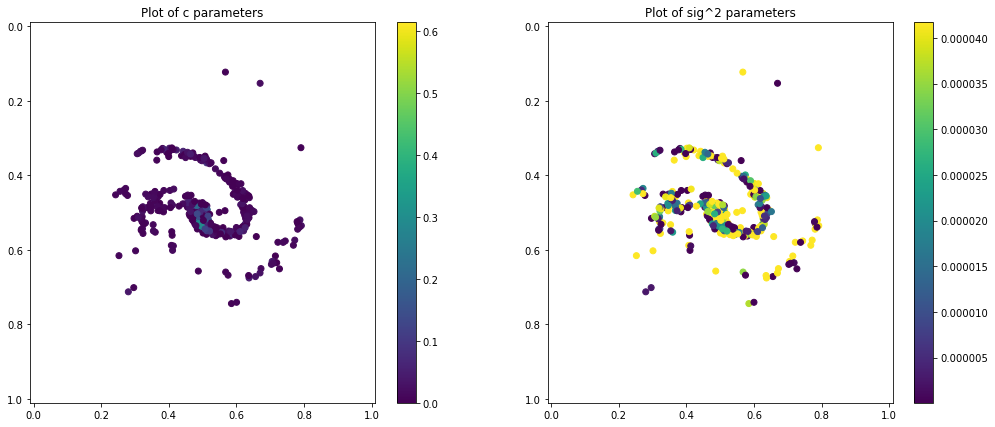

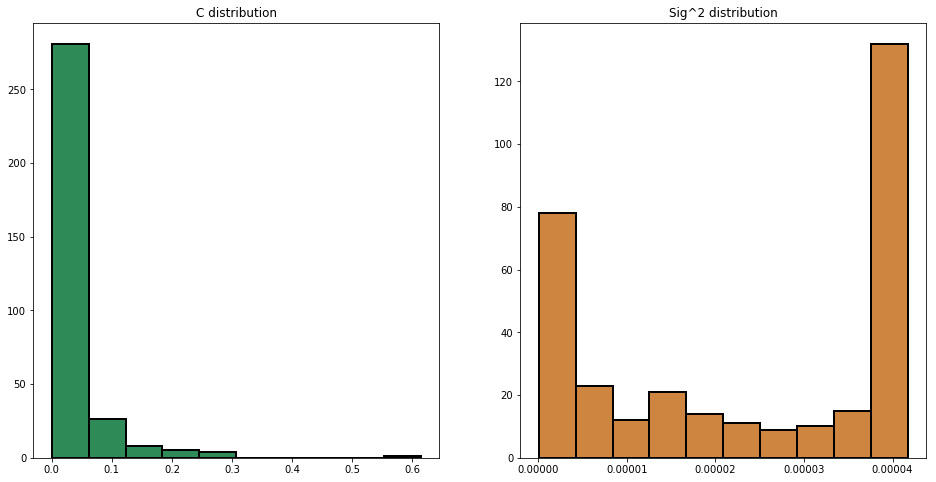

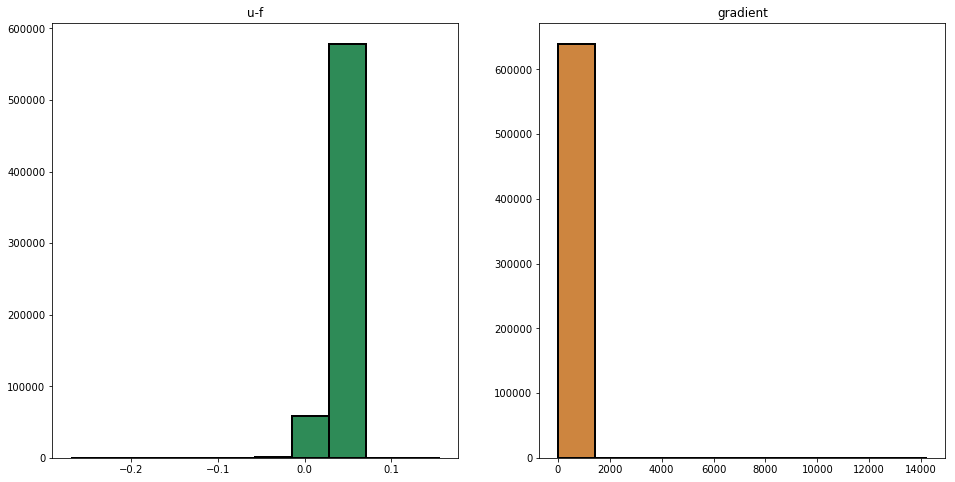

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140110

Residual stats:
Residual RMS: 0.0190068263074128
Residual Variance: 0.0003612505295924718
Flux Lost: 0.056353455483875894
Flux Addition: 0.05727960528603277
psi1(u-f): 1.230509947929484
Exceeded Pixels: 7067
Sharpness: 170.92300697035114
psi2(grad u): 1.979457999204793
Total elapsed time: 577.7983162403107 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06740099010144825
Mean min distance between collocation and center poi

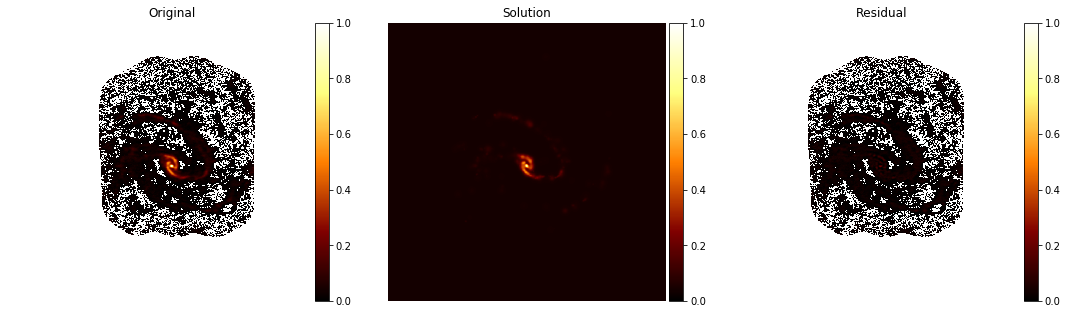

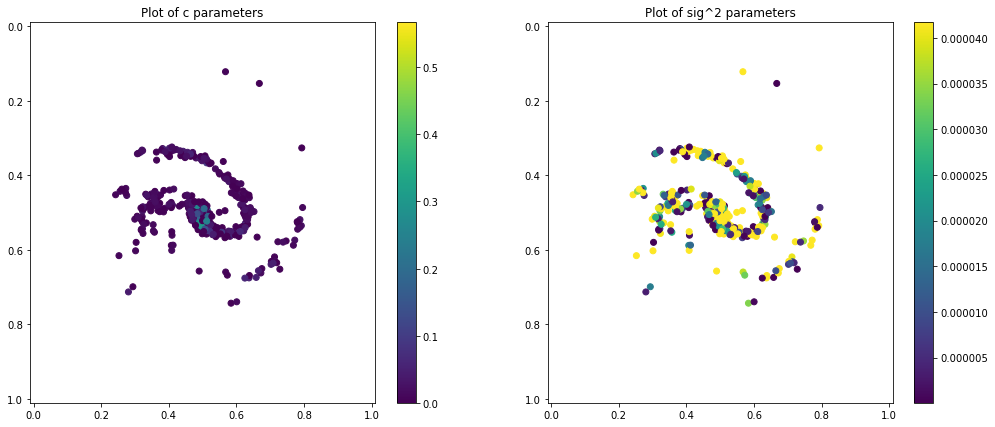

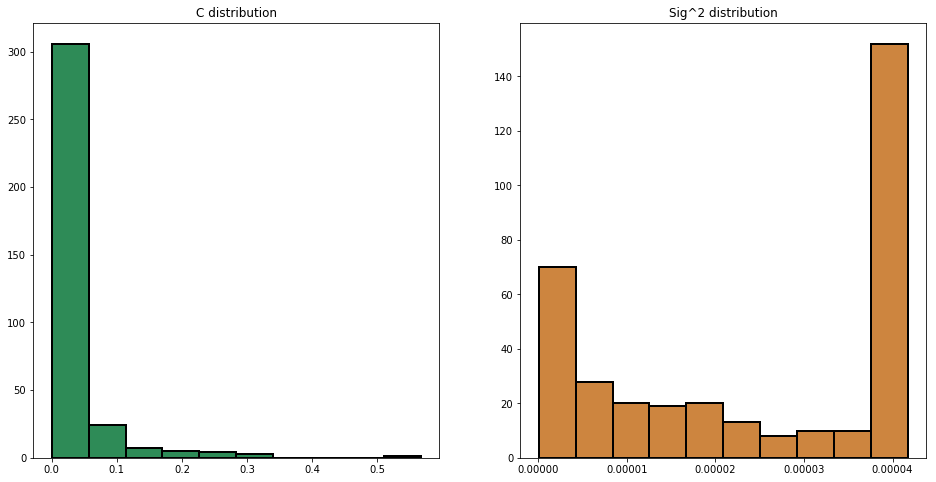

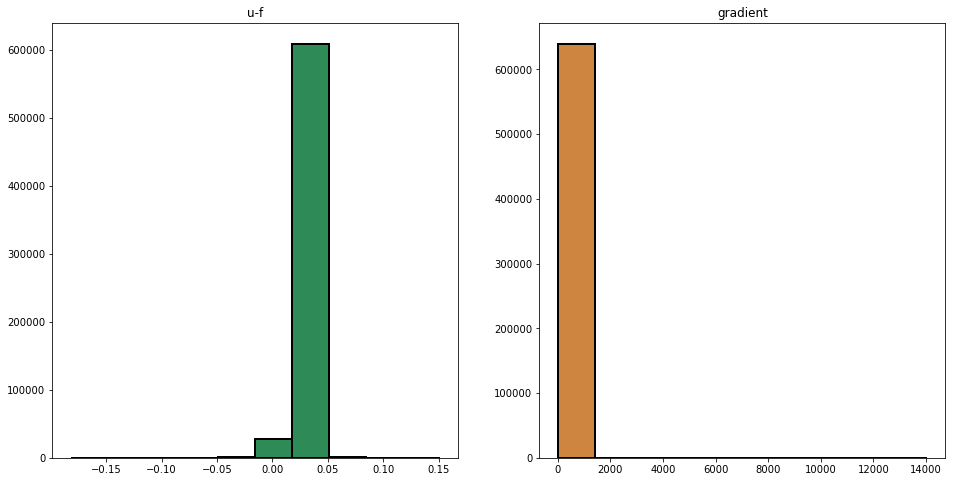

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150107

Residual stats:
Residual RMS: 0.015612433464675914
Residual Variance: 0.00024371171055815675
Flux Lost: 0.04999947785825665
Flux Addition: 0.04812905435717235
psi1(u-f): 0.592643713978896
Exceeded Pixels: 6995
Sharpness: 177.38814041446747
psi2(grad u): 2.6582011335970974
Total elapsed time: 684.5335028171539 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06738129065320073
Mean min distance between collocation and center 

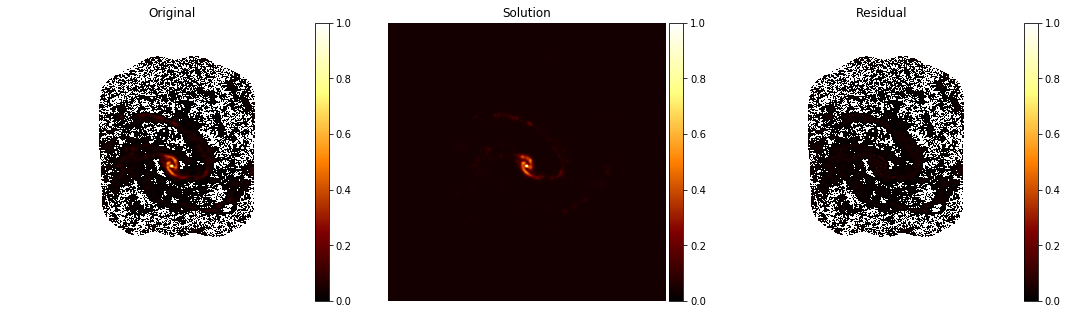

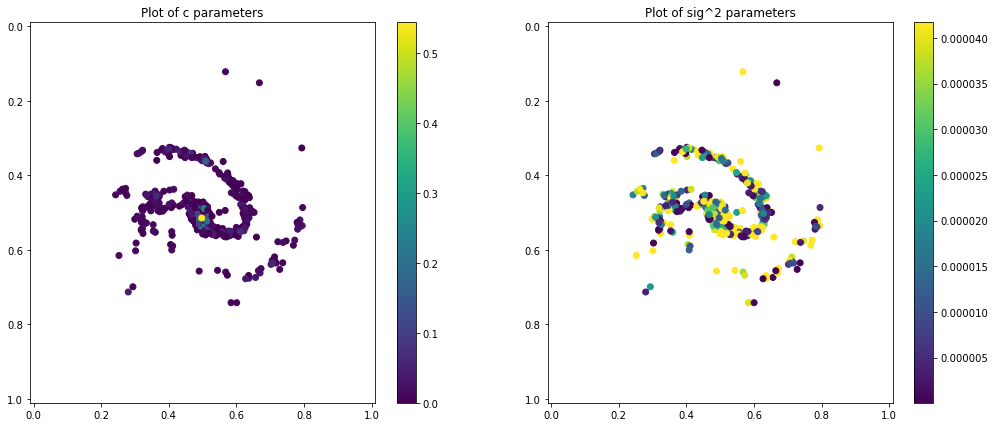

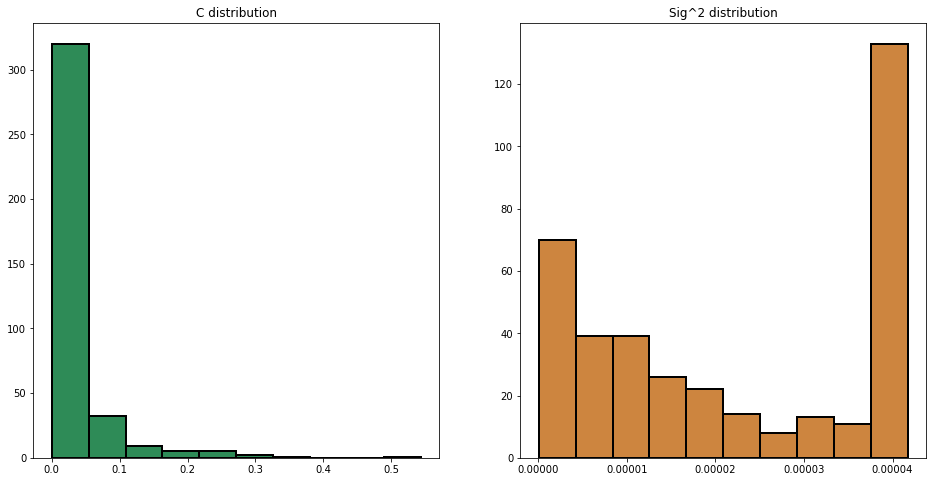

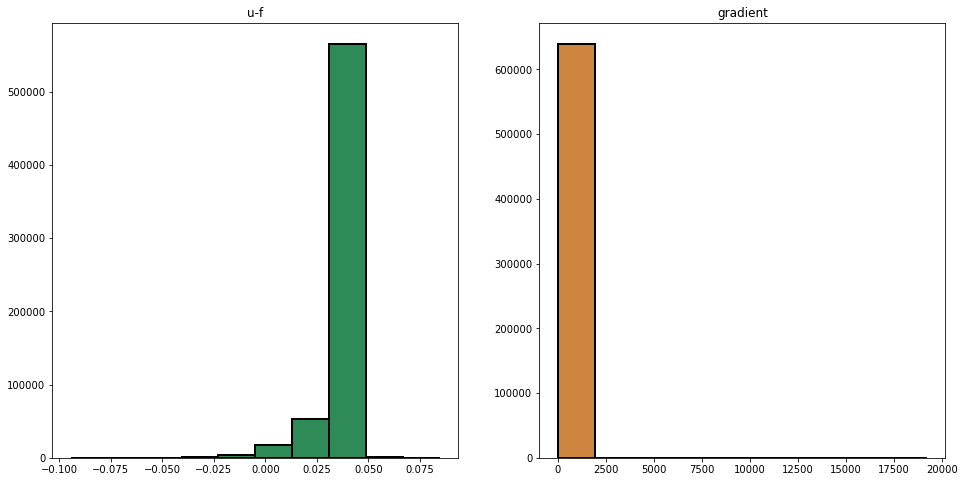

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160109

Residual stats:
Residual RMS: 0.014234519404717207
Residual Variance: 0.0002023644676996059
Flux Lost: 0.046260441797104514
Flux Addition: 0.04128754588614322
psi1(u-f): 0.39802680461561135
Exceeded Pixels: 6877
Sharpness: 179.85031718461988
psi2(grad u): 2.7230475904390934
Total elapsed time: 817.9032576084137 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06739921289424439
Mean min distance between collocation and cente

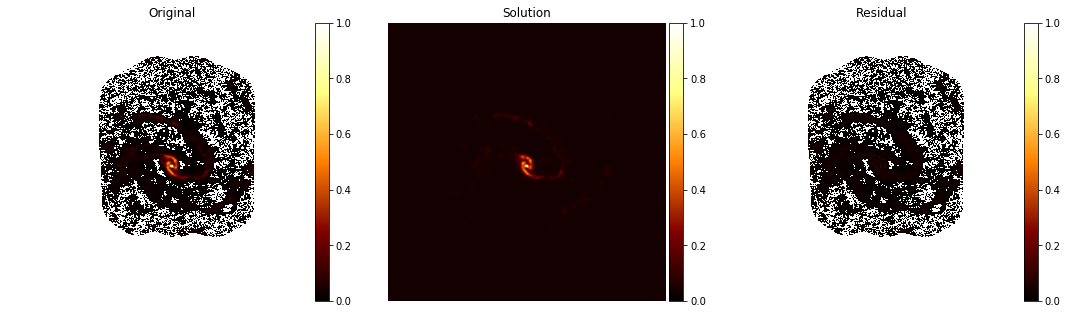

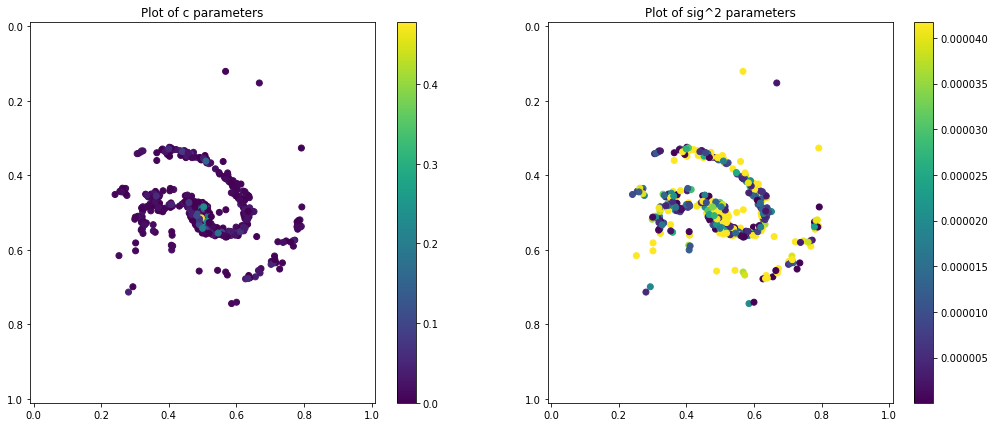

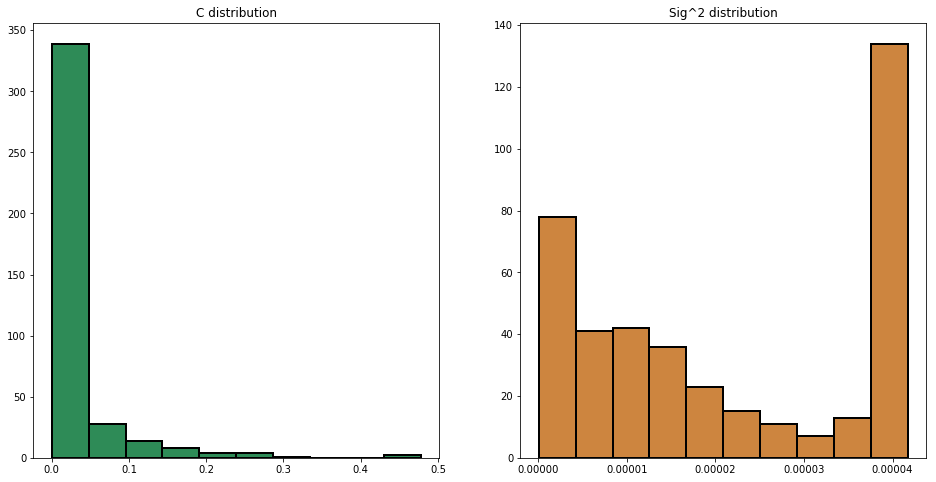

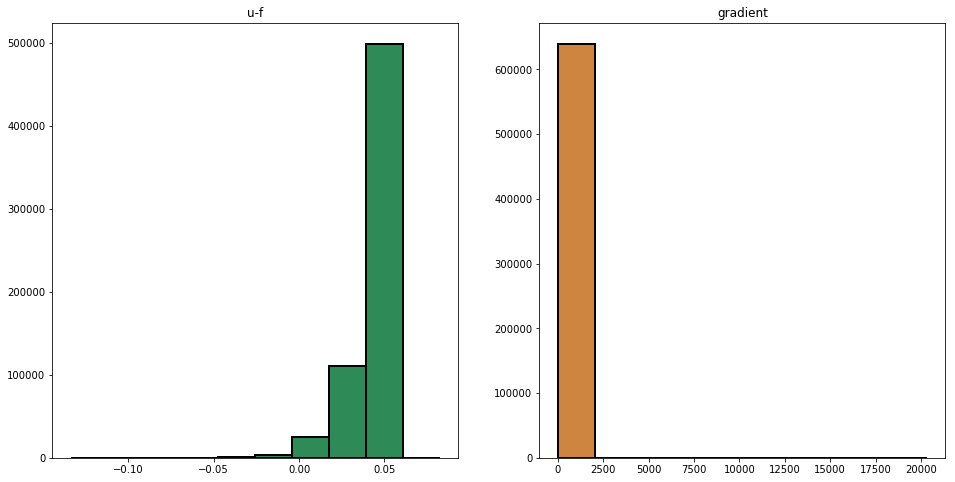

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170108

Residual stats:
Residual RMS: 0.013598976120686602
Residual Variance: 0.00018460137840049903
Flux Lost: 0.04523119888882132
Flux Addition: 0.03959034861499295
psi1(u-f): 0.36386211058062734
Exceeded Pixels: 6836
Sharpness: 179.63377811795667
psi2(grad u): 2.7663952554616884
Total elapsed time: 971.6544024944305 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06740034724282778
Mean min distance between collocation and cente

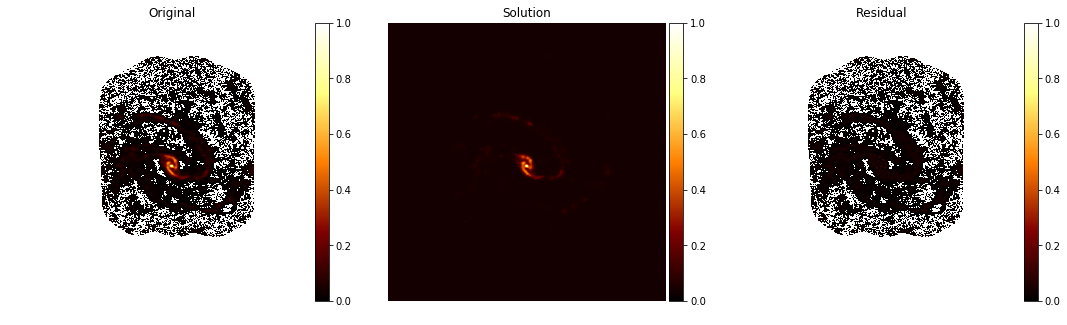

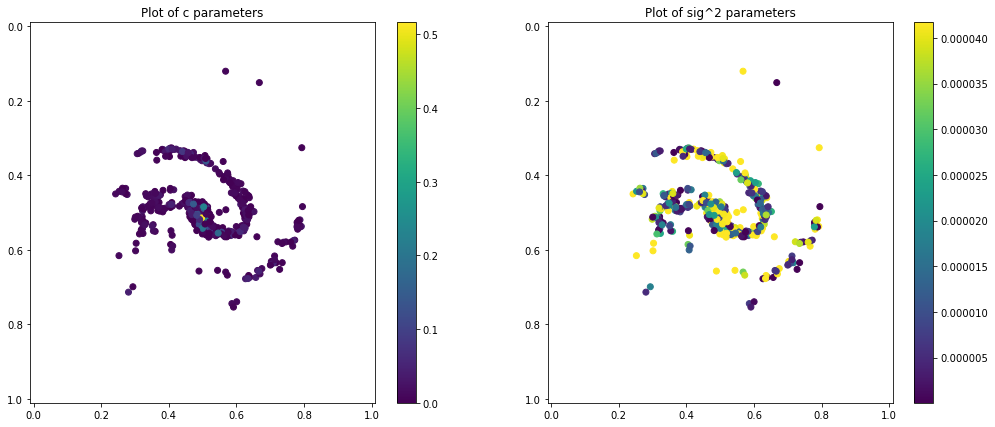

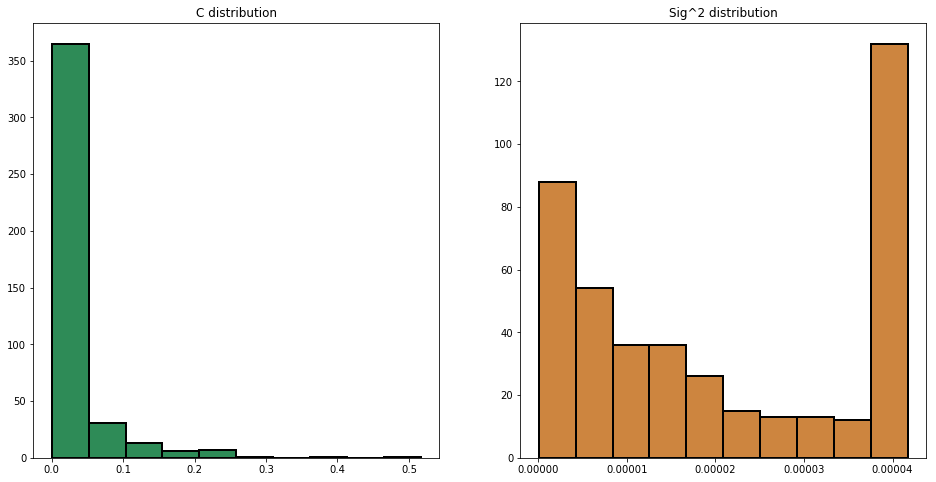

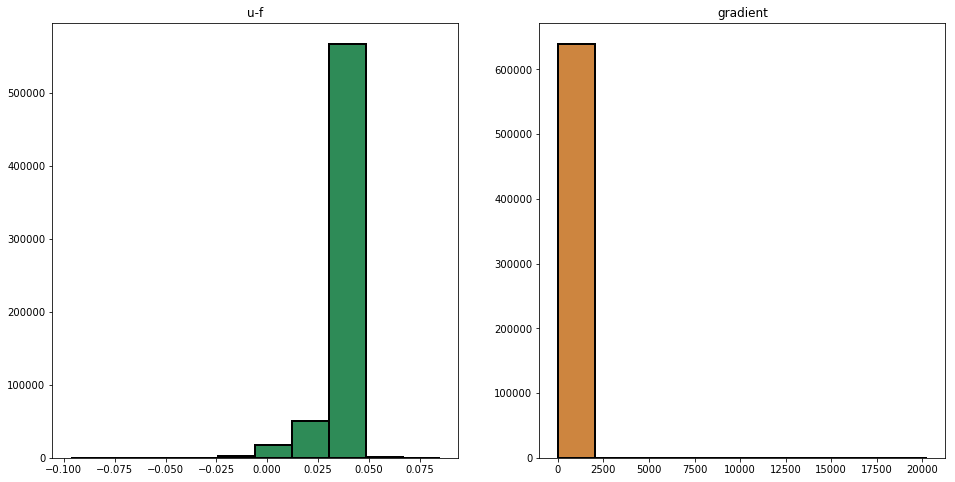

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180108

Residual stats:
Residual RMS: 0.012665916309171488
Residual Variance: 0.0001601975242835296
Flux Lost: 0.041721500256626236
Flux Addition: 0.03703916248056171
psi1(u-f): 0.3226115561964201
Exceeded Pixels: 6810
Sharpness: 181.60322045365768
psi2(grad u): 2.8114254410598316
Total elapsed time: 1192.0074355602264 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.07540114284597042
Mean min distance between collocation and cente

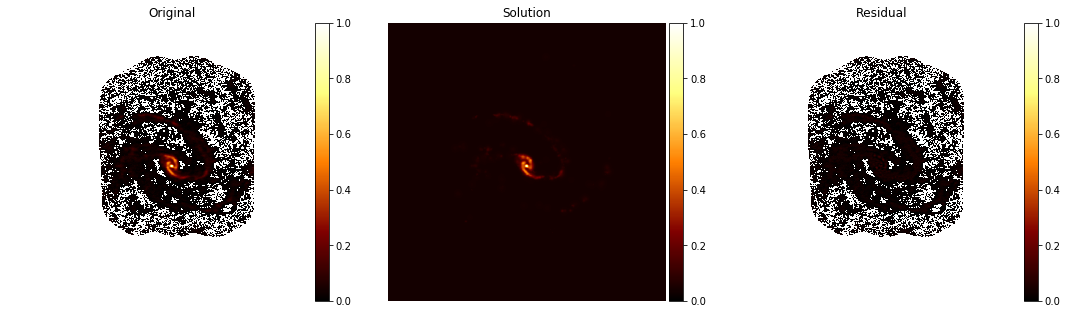

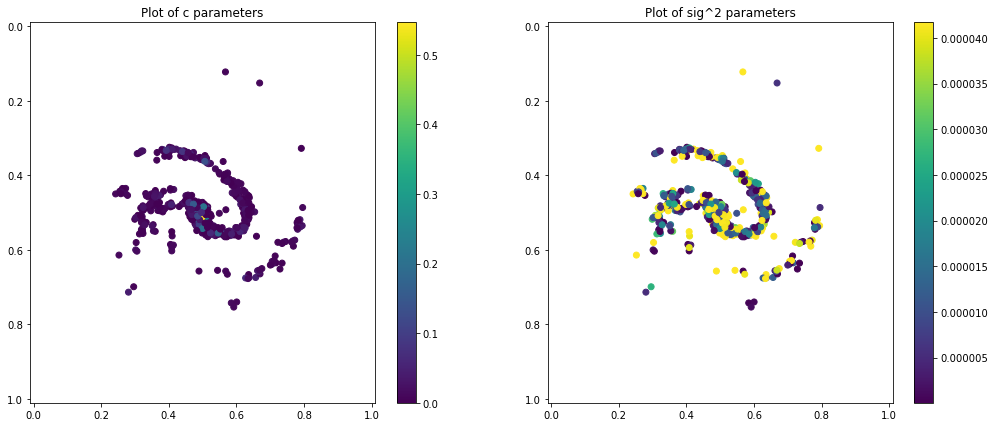

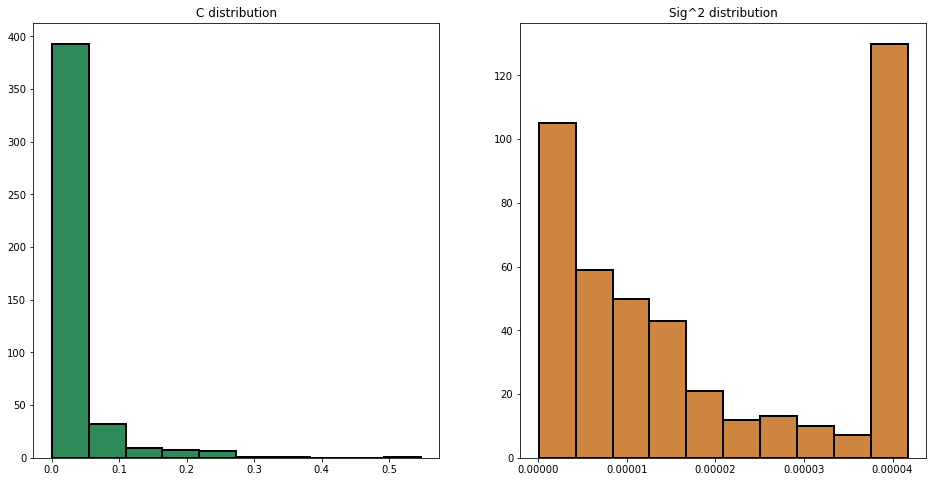

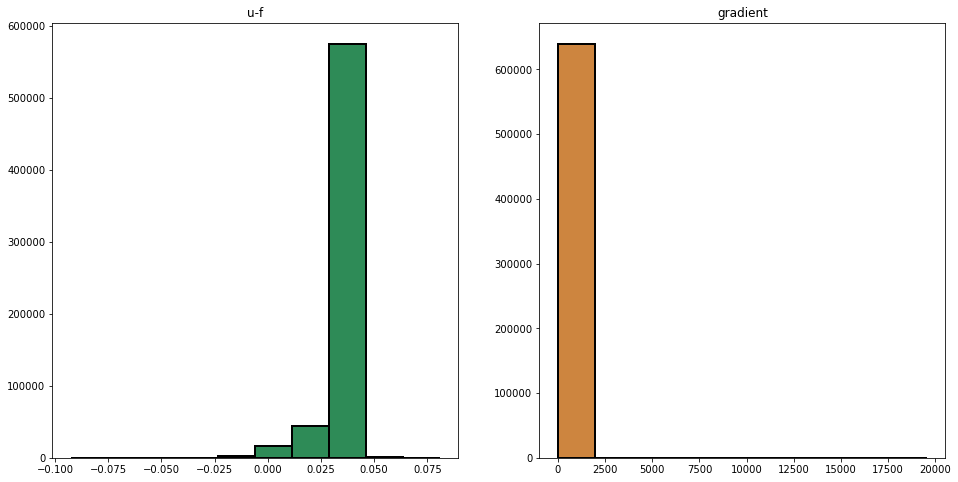

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190106

Residual stats:
Residual RMS: 0.011286592792704091
Residual Variance: 0.00012695761542530278
Flux Lost: 0.03967962838956428
Flux Addition: 0.033251388034724334
psi1(u-f): 0.19451159764956516
Exceeded Pixels: 6765
Sharpness: 182.71624423133346
psi2(grad u): 2.931523459907168
Total elapsed time: 1383.662544965744 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.07564750737012892
Mean min distance between collocation and cente

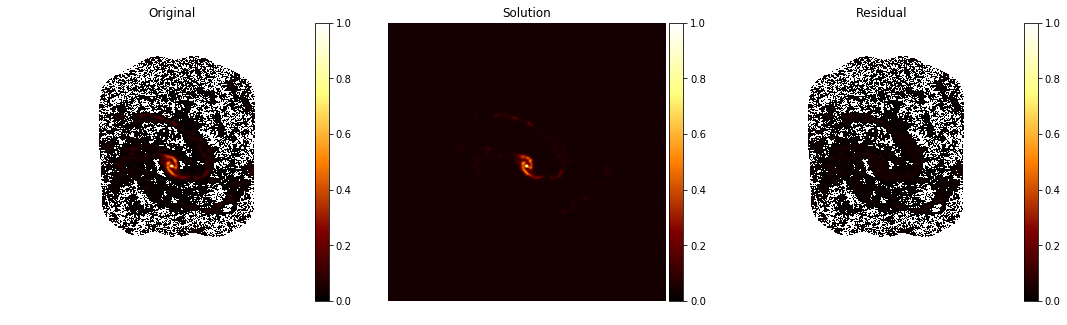

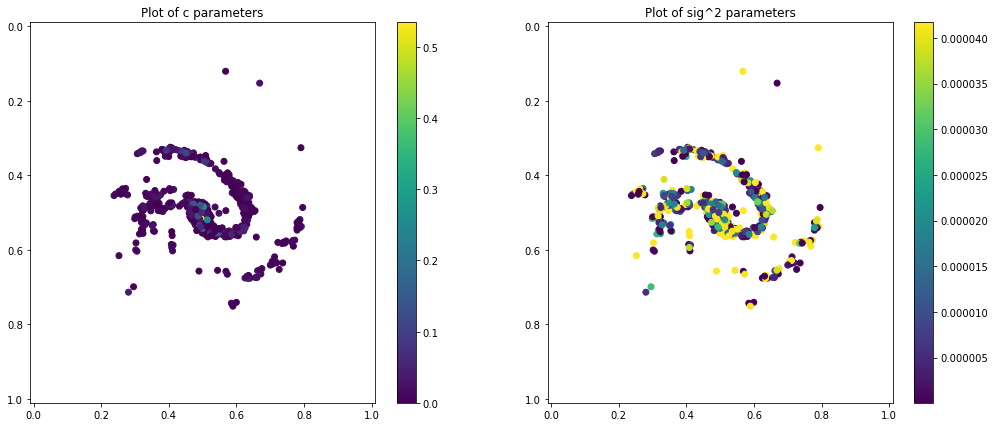

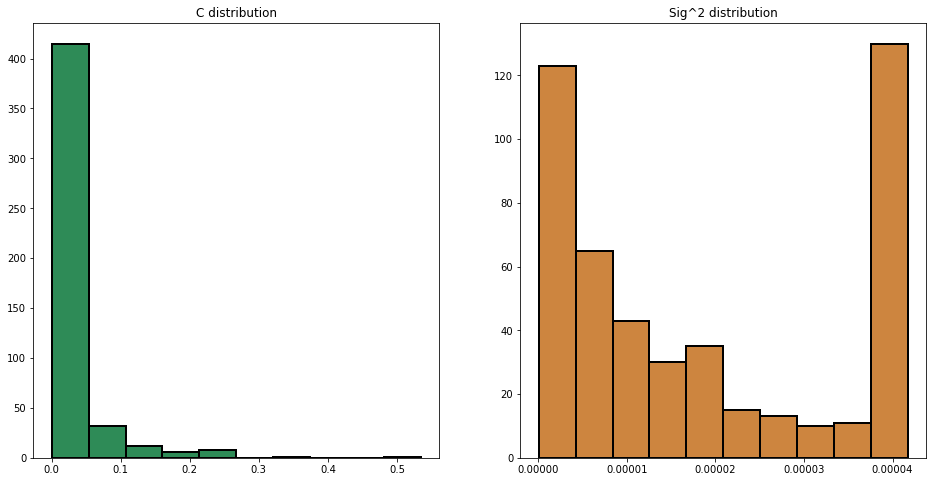

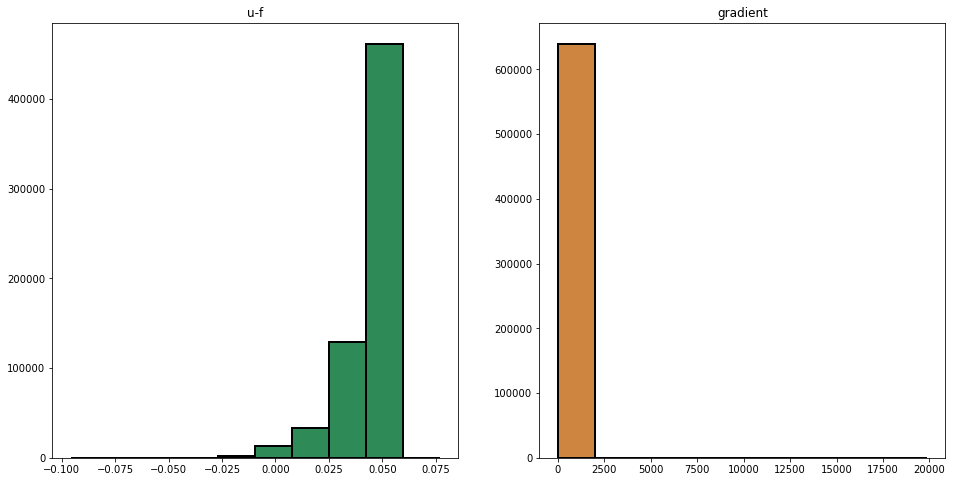

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 4
message: The cosine of the angle between func(x) and any column of the
  Jacobian is at most 0.000000 in absolute value
nfev: 2001

Residual stats:
Residual RMS: 0.08948714795582263
Residual Variance: 0.0067608728483986805
Flux Lost: 0.3796014912814518
Flux Addition: 0.03324282339686047
psi1(u-f): 0.13081620688842155
Exceeded Pixels: 5346
Sharpness: 105.23560698736725
psi2(grad u): 0.24879687772424794
Total elapsed time: 19.91880226135254 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1550595534750393

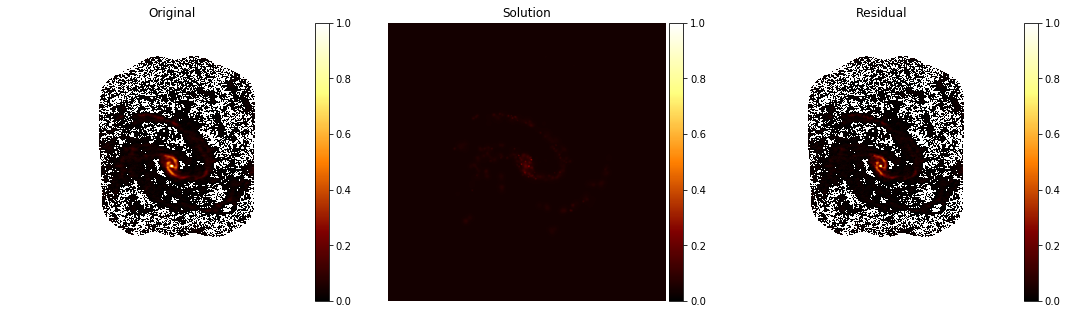

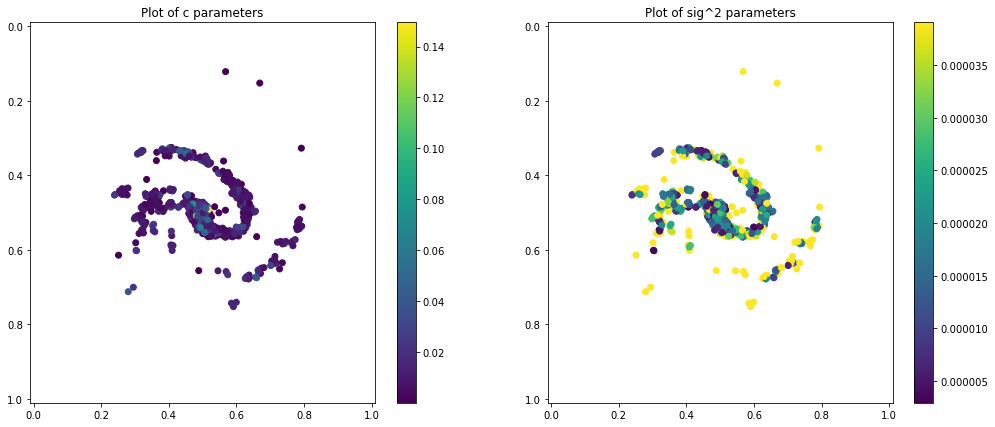

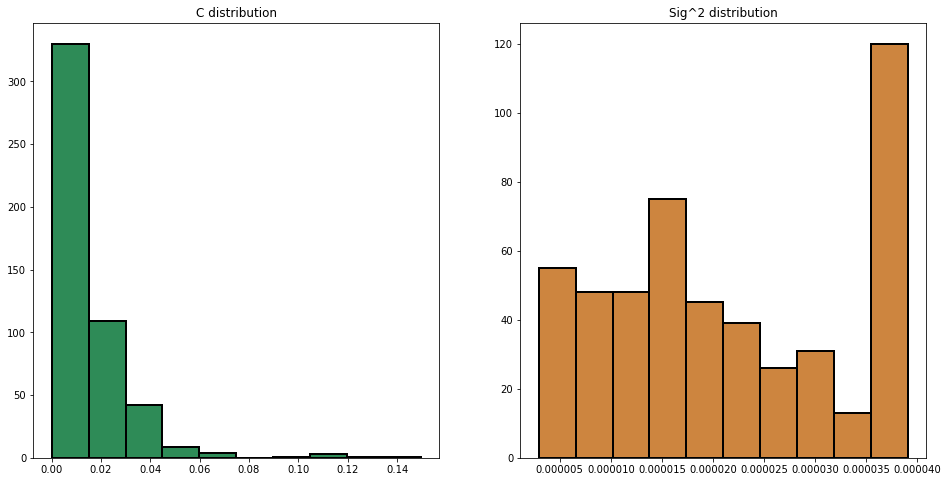

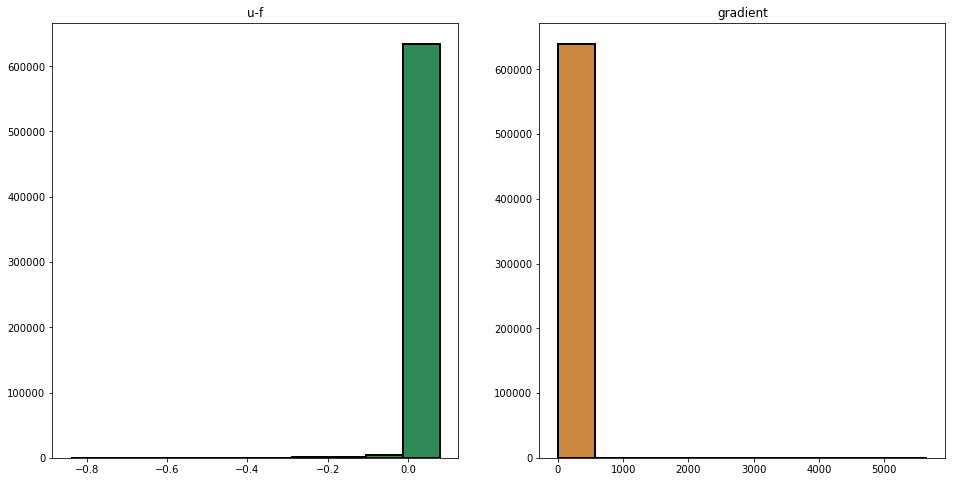

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    #del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("../results/exp01_m{0}_m100.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `M100`

In [8]:
elm_list = pickle.load( open('../results/exp01_m1_m100.pkl', 'rb') )

In [9]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

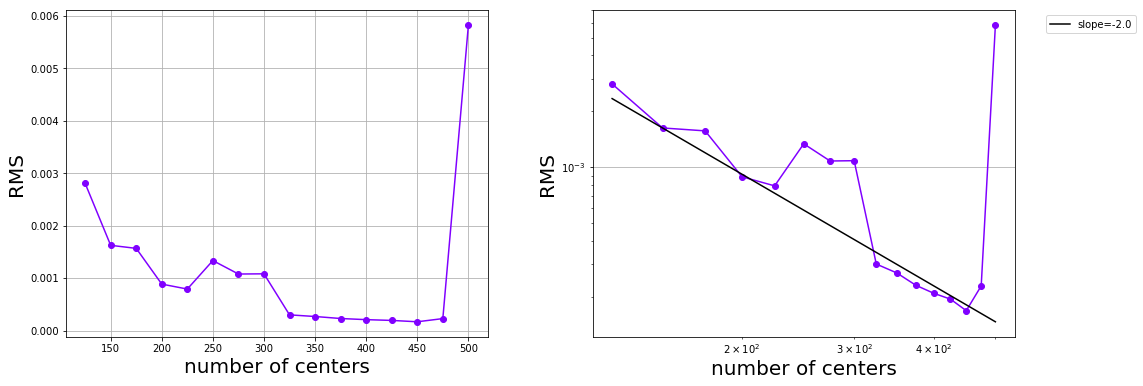

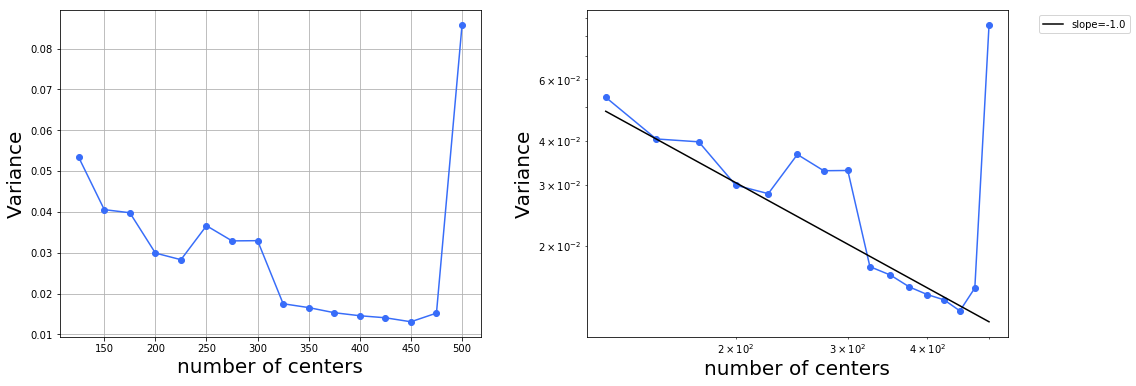

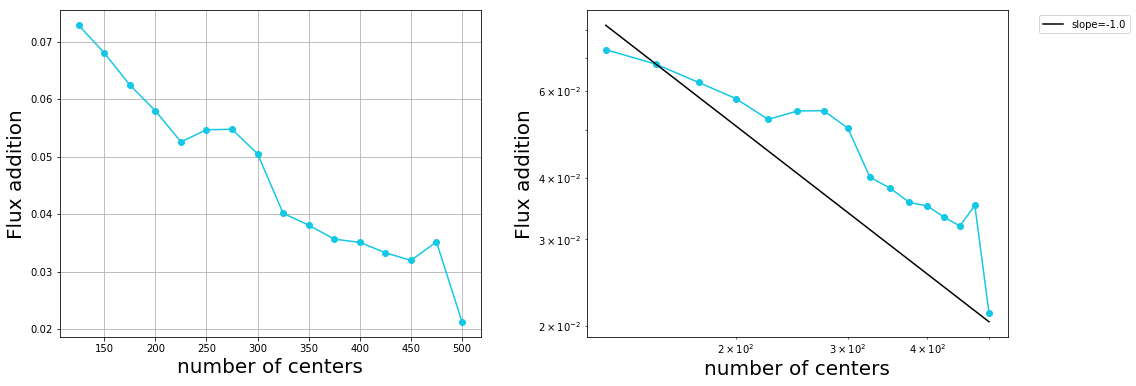

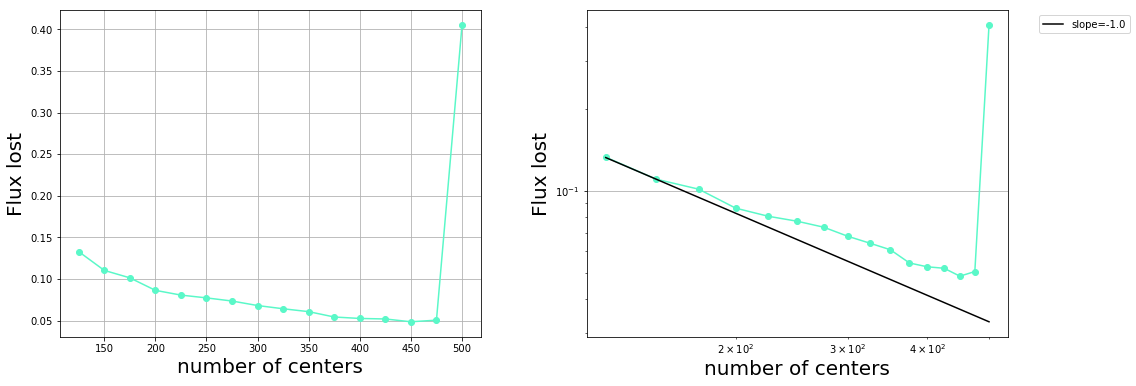

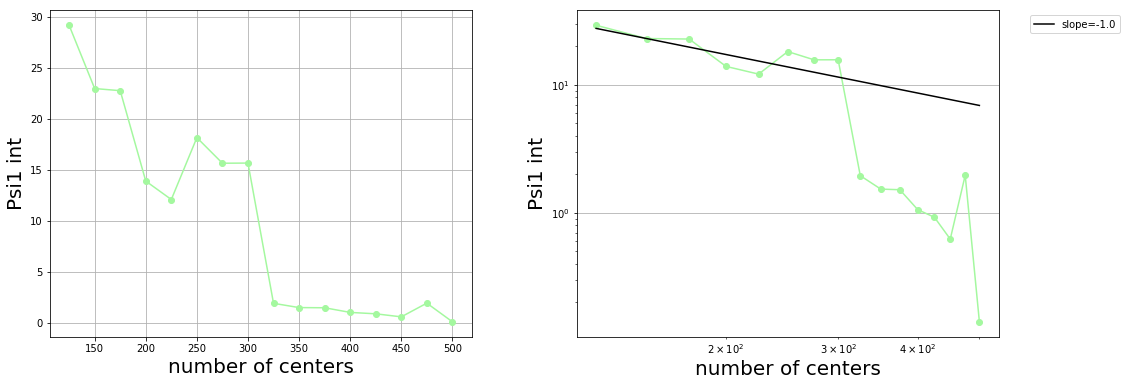

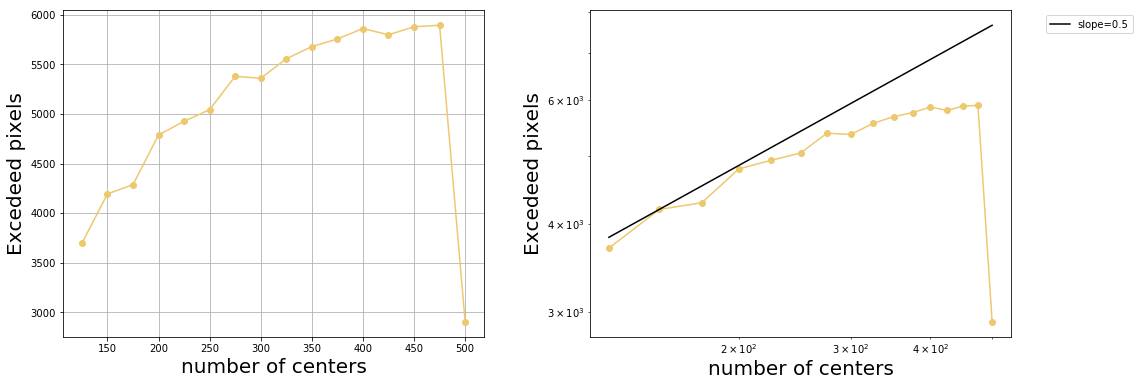

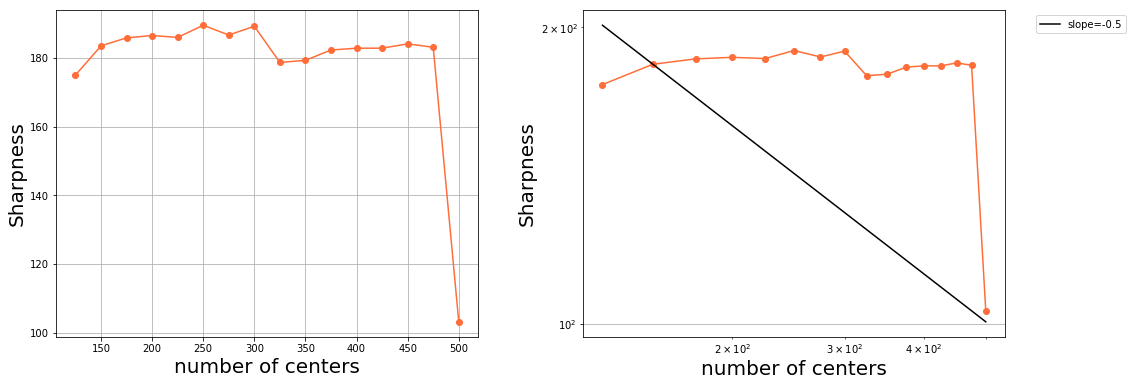

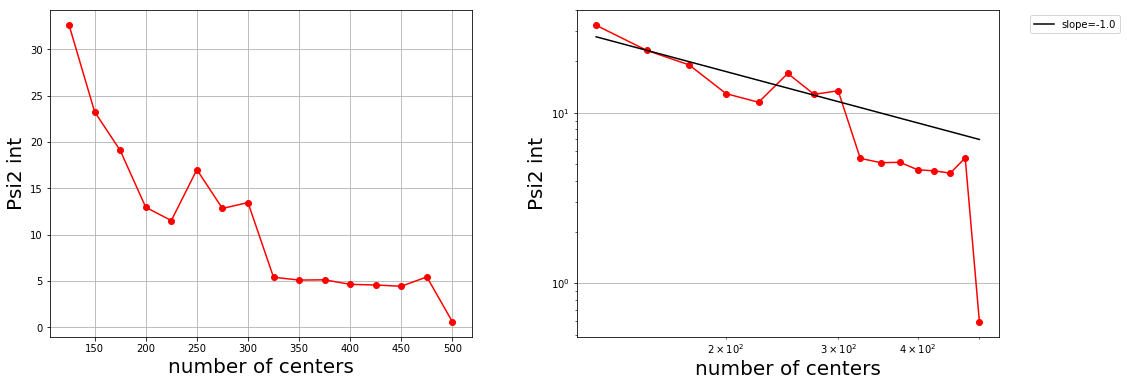

In [10]:
stats_plot(n_center[3:], r_stats[3:], x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-1.,0.5,-0.5,-1.])

In [11]:
elm_list = pickle.load( open('../results/exp01_m2_m100.pkl', 'rb') )

In [12]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

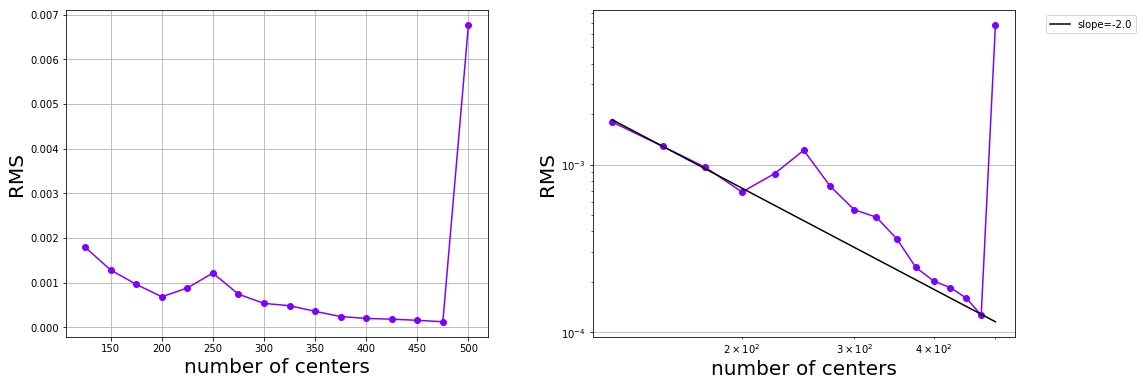

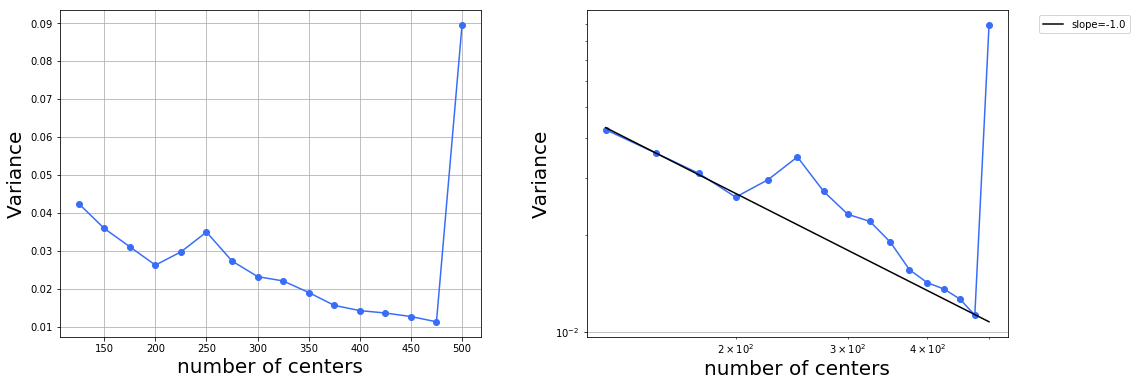

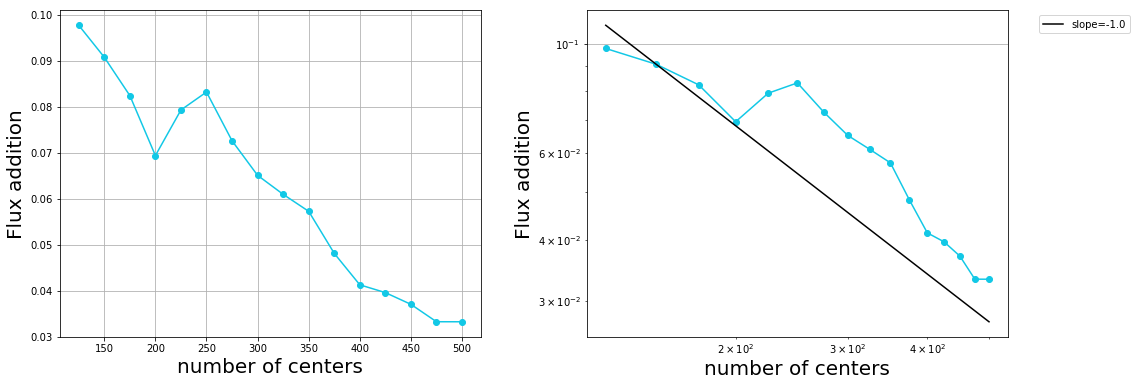

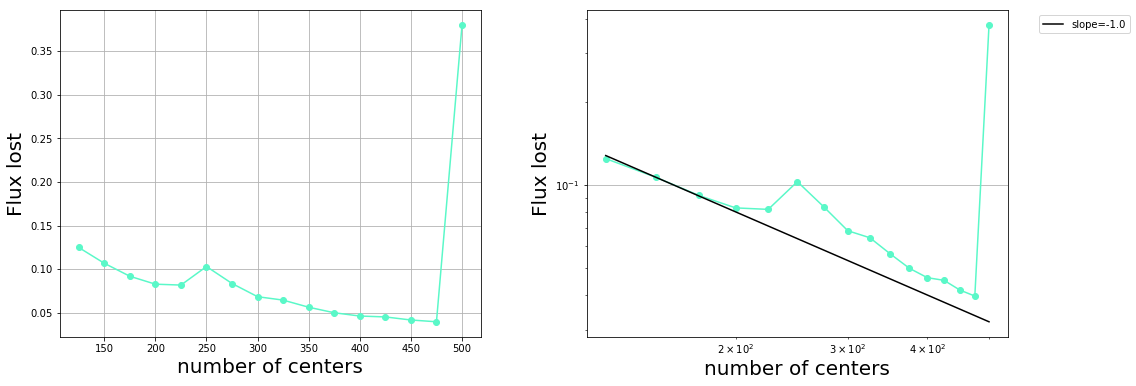

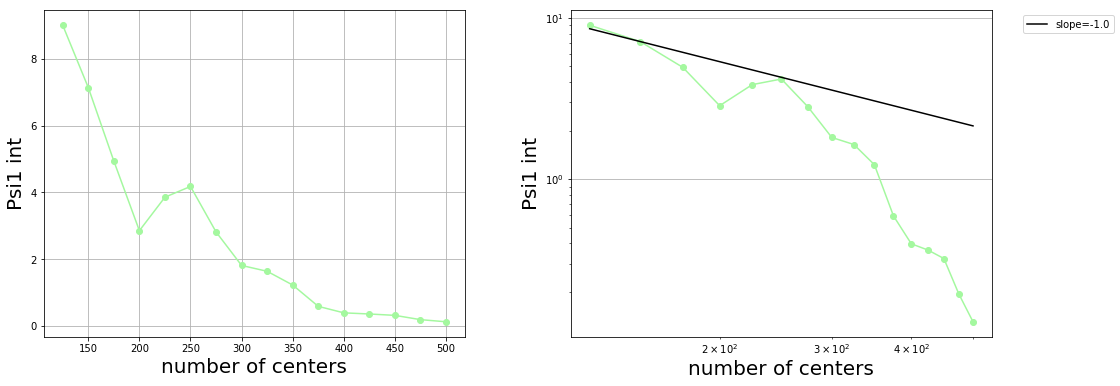

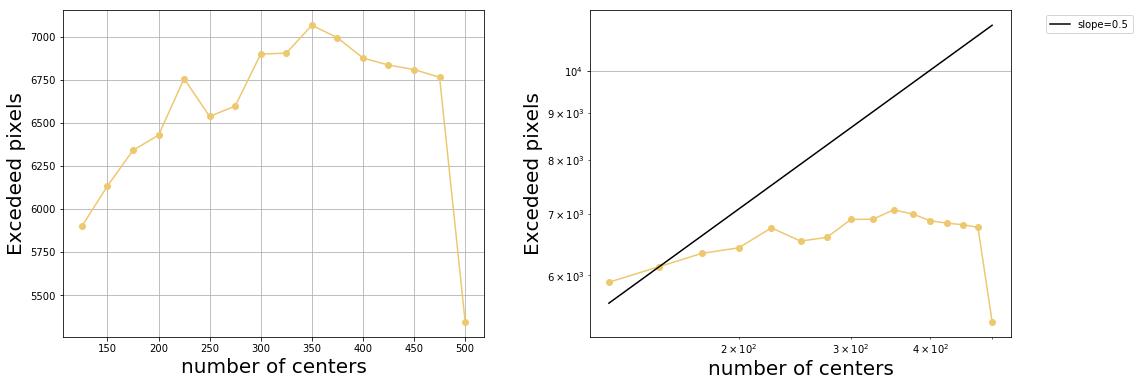

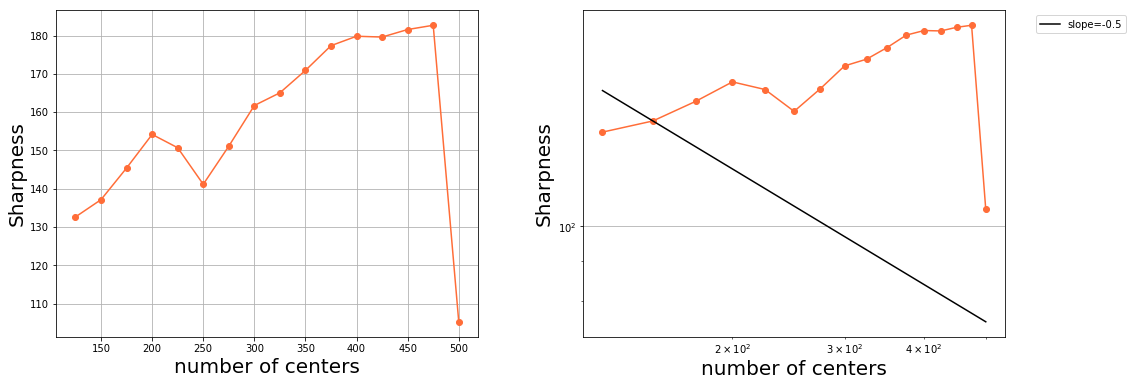

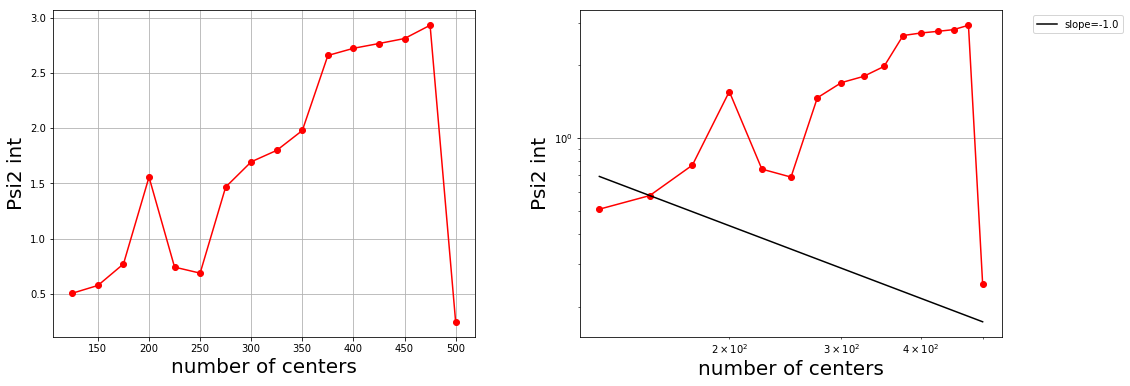

In [13]:
stats_plot(n_center[3:], r_stats[3:], x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-1.,0.5,-0.5,-1.])